In [449]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
!pip install wordcloud matplotlib nltk
from wordcloud import WordCloud

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

repeat_customers = customers_orders_orderItems.groupby('customer_unique_id').size()

repeat_customers_count = (repeat_customers > 1).sum()

print(f"Number of customers with repeat purchases: {repeat_customers_count}")


# Chapters

- Importing the dataset
- Understanding the dataset
- Merging datasets
  - Merging customers and orders
  - Merging customers_orders with order_items
    - Checking the null values in customers_orders_orderItems and making of displaying_null_values function
- Analysing number of repeat customers
  - Cohort Analysis
  - Understanding the customers
    - Location of where most of the repeating customers stay
    - Analysing the reviews made by repeating customers
    - Analysing the price of the items bought by repeating customers and how much they spent per order
      - Finding the most bought product category
      - Finding the least bought product category
      - Finding the most and least expensive product category
      - Finding the top and bottom revenue per product category of repeat customers
    - Analysing delivery times of repeating customers
    - Analysing Payment Methods of Repeat Customers
  - Analysing Single Purchase Customers
    - Analysing the reviews made by single purchase customers
    - Analysing the price of the items bought by single purchase customers and how much they spent per order
      - Finding the most bought product category
      - Finding the least bought product category
      - Finding the most and least expensive product category
      - Finding the top and bottom revenue per product category of single purchase customers
    - Analysing delivery times of single purchase customers
- Merging customers_orders_orderItem and order_payments
  - Obtaining the day of the week
  - Finding the distribution of sales across the days of the week
  - Plotting revenue over time
- Finding the inactive customers (inactive for more than 6 months)
- Finding why the customers became inactive
  - Plotting inactive customers over time
  - Analysing their reviews
    - Review sentiment analysis
  - Analysing the delivery time
  - Finding the location of where the inactive customers are and what type of products they purchase
  - Analysing the distribution of payment types for inactive customers
- Market Analysis
  - Finding the most sold product category
  - Finding the revenue earned by product category
    - Finding the revenue per product category for the past year
  - Location of where most of the customers stay
  - Finding the revenue earned by location
  - Finding the revenue earned by location over the last year
  - Analysing the payment types
  - Analysing delivery times
  - Analysing reviews
    - Top and bottom product categories by review score

# Importing the Dataset

In [450]:
# Dictionary to store DataFrames
dataframes = {}

for file in os.listdir('.'):
    if file.endswith('.csv'):
        var_name = os.path.splitext(file)[0]
        var_name = var_name.replace('olist_', '').replace('_dataset', '')
        dataframes[var_name] = pd.read_csv(file)
        print(f"Loaded {file} into DataFrame: {var_name}")

# Access DataFrames
customers = dataframes['customers']

Loaded olist_customers_dataset.csv into DataFrame: customers
Loaded olist_geolocation_dataset.csv into DataFrame: geolocation
Loaded olist_orders_dataset.csv into DataFrame: orders
Loaded olist_order_items_dataset.csv into DataFrame: order_items
Loaded olist_order_payments_dataset.csv into DataFrame: order_payments
Loaded olist_order_reviews_dataset.csv into DataFrame: order_reviews
Loaded olist_products_dataset.csv into DataFrame: products
Loaded olist_sellers_dataset.csv into DataFrame: sellers
Loaded product_category_name_translation.csv into DataFrame: product_category_name_translation


In [451]:
# Importing each dataset manually so that vs code will not give an error when using the variable name
customers= pd.read_csv('olist_customers_dataset.csv')
geolocation= pd.read_csv('olist_geolocation_dataset.csv')
order_items= pd.read_csv('olist_order_items_dataset.csv')
order_payments= pd.read_csv('olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('olist_order_reviews_dataset.csv')
orders= pd.read_csv('olist_orders_dataset.csv')
products= pd.read_csv('olist_products_dataset.csv')
sellers= pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation= pd.read_csv('product_category_name_translation.csv')

# Understanding the Datasets

In [452]:
for key in dataframes:
    print("\n Data Frame:", key)
    dataframes[key].info()


 Data Frame: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 Data Frame: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3

In [453]:
for key in dataframes:
    print("Data:",key)
    display(dataframes[key].head())

Data: customers


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

Data: geolocation


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

Data: orders


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

Data: order_items


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

Data: order_payments


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

Data: order_reviews


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

Data: products


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

Data: sellers


seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

Data: product_category_name_translation


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

# Merging datasets

In [454]:
products_translated= products.merge(product_category_name_translation, how='inner', on='product_category_name')
products_translated

product_id      product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 perfumaria   
1      6a2fb4dd53d2cdb88e0432f1284a004c                 perfumaria   
2      0d009643171aee696f4733340bc2fdd0                 perfumaria   
3      b1eae565a61935e0011ee7682fef9dc9                 perfumaria   
4      8da90b37f0fb171b4877c124f965b1f6                 perfumaria   
...                                 ...                        ...   
32323  13b25797ad1e6d6c7cd3cbeb35f8ee7a  moveis_colchao_e_estofado   
32324  dc36a7859b743d8610a2bbbaea26ece9  moveis_colchao_e_estofado   
32325  107fde0930956120d1e13dd1062fbb46  moveis_colchao_e_estofado   
32326  726b4e18f00255e2e63491bcba3f60b8  moveis_colchao_e_estofado   
32327  1dceebcc5f23c02ea23e16d5bedca000          cds_dvds_musicais   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     39.0                       346.0                 2.0   
2                     52.0                       150.0                 1.0   
3                     49.0                       460.0                 2.0   
4                     56.0                       733.0                 3.0   
...                    ...                         ...                 ...   
32323                 44.0                       348.0                 1.0   
32324                 29.0                      2073.0                 2.0   
32325                 51.0                       418.0                 1.0   
32326                 41.0                       866.0                 1.0   
32327                 47.0                       117.0                 2.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                 400.0               27.0                5.0   
2                 422.0               21.0               16.0   
3                 267.0               17.0               13.0   
4                 377.0               18.0               13.0   
...                 ...                ...                ...   
32323           18250.0               25.0               25.0   
32324            2500.0               41.0               21.0   
32325           30000.0               60.0               73.0   
32326            1700.0               70.0               10.0   
32327             550.0               35.0               15.0   

       product_width_cm      product_category_name_english  
0                  14.0                          perfumery  
1                  20.0                          perfumery  
2                  18.0                          perfumery  
3                  17.0                          perfumery  
4                  15.0                          perfumery  
...                 ...                                ...  
32323              25.0  furniture_mattress_and_upholstery  
32324              21.0  furniture_mattress_and_upholstery  
32325              60.0  furniture_mattress_and_upholstery  
32326             100.0  furniture_mattress_and_upholstery  
32327              25.0                  cds_dvds_musicals  

[32328 rows x 10 columns]

## Merging customers and orders

In [455]:
customers_orders = pd.merge(customers, orders, on='customer_id', how='inner')
customers_orders

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  \
0                         14409                 franca             SP   
1                          9790  sao bernardo do campo             SP   
2                          1151              sao paulo             SP   
3                          8775        mogi das cruzes             SP   
4                         13056               campinas             SP   
...                         ...                    ...            ...   
99436                      3937              sao paulo             SP   
99437                      6764        taboao da serra             SP   
99438                     60115              fortaleza             CE   
99439                     92120                 canoas             RS   
99440                      6703                  cotia             SP   

                               order_id order_status order_purchase_timestamp  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1      29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2      b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3      951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4      6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   
...                                 ...          ...                      ...   
99436  6760e20addcf0121e9d58f2f1ff14298    delivered      2018-04-07 15:48:17   
99437  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered      2018-04-04 08:20:22   
99438  fed4434add09a6f332ea398efd656a5c    delivered      2018-04-08 20:11:50   
99439  e31ec91cea1ecf97797787471f98a8c2    delivered      2017-11-03 21:08:33   
99440  28db69209a75e59f20ccbb5c36a20b90    delivered      2017-12-19 14:27:23   

         order_approved_at order_delivered_carrier_date  \
0      2017-05-16 15:22:12          2017-05-23 10:47:57   
1      2018-01-12 20:58:32          2018-01-15 17:14:59   
2      2018-05-20 16:19:10          2018-06-11 14:31:00   
3      2018-03-13 17:29:19          2018-03-27 23:22:42   
4      2018-07-29 10:10:09          2018-07-30 15:16:00   
...                    ...                          ...   
99436  2018-04-07 16:08:45          2018-04-11 02:08:36   
99437  2018-04-04 08:35:12          2018-04-05 18:42:35   
99438  2018-04-08 20:30:03          2018-04-09 17:52:17   
99439  2017-11-03 21:31:20          2017-11-06 18:24:41   
99440  2017-12-19 18:50:39          2017-12-21 19:17:21   

      order_delivered_customer_date order_estimated_delivery_date  
0               2017-05-25 10:35:35           2017-06-05 00:00:00  
1               2018-01-29 12:41:19           2018-02-06 00:00:00  
2               2018-06-14 17:58:51           2018-06-13 00:00:00  
3               2018-03-28 16:04:25           2018-04-10 00:00:00  
4               2018-08-09 20:55:48           2018-08-15 00:00:00  
...                             ...                           ...  
99436           2018-04-13 20:06:37           2018-04-25 00:00:00  


## Merging customers_orders with order_items

In [456]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [457]:
customers_orders_orderItems = pd.merge(customers_orders, order_items, on='order_id', how='inner')
customers_orders_orderItems

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2       4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3       b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4       4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                  ...                               ...   
112645  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
112646  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
112647  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
112648  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
112649  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

        customer_zip_code_prefix          customer_city customer_state  \
0                          14409                 franca             SP   
1                           9790  sao bernardo do campo             SP   
2                           1151              sao paulo             SP   
3                           8775        mogi das cruzes             SP   
4                          13056               campinas             SP   
...                          ...                    ...            ...   
112645                      3937              sao paulo             SP   
112646                      6764        taboao da serra             SP   
112647                     60115              fortaleza             CE   
112648                     92120                 canoas             RS   
112649                      6703                  cotia             SP   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       29150127e6685892b6eab3eec79f59c7    delivered   
2       b2059ed67ce144a36e2aa97d2c9e9ad2    delivered   
3       951670f92359f4fe4a63112aa7306eba    delivered   
4       6b7d50bd145f6fc7f33cebabd7e49d0f    delivered   
...                                  ...          ...   
112645  6760e20addcf0121e9d58f2f1ff14298    delivered   
112646  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered   
112647  fed4434add09a6f332ea398efd656a5c    delivered   
112648  e31ec91cea1ecf97797787471f98a8c2    delivered   
112649  28db69209a75e59f20ccbb5c36a20b90    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2018-01-12 20:48:24  2018-01-12 20:58:32   
2           2018-05-19 16:07:45  2018-05-20 16:19:10   
3           2018-03-13 16:06:38  2018-03-13 17:29:19   
4           2018-07-29 09:51:30  2018-07-29 10:10:09   
...                         ...                  ...   
112645      2018-04-07 15:48:17  2018-04-07 16:08:45   
112646      2018-04-04 08:20:22  2018-04-04 08:35:12   
112647      2018-04-08 20:11:50  2018-04-08 20:30:03   
112648      2017-11-03 21:08:33  2017-11-03 21:31:20   
112649      2017-12-19 14:27:23  2017-12-19 18:50:39   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2018-01-15 17:14:59           2018-01-29 12:41:19   
2               2018-06-11 14:31:00           2018-06-14 17:58:51   
3               2018-03-27 23:22:42           2018-03-28 16:04:25   
4               2018-07-30 15:16:00           2018-08-09 20:55:48   
...                             ...                           ...   
112645          2018-04-11 02:08:36           2018-04-13 20:06:37   
112646          2018-04-05 18:42:35           2018-04-11 18:54:45   
112647          2018-04-09 17:52:17           2018-05-09 19:03:15   
112648          2017-11-06 18:24:41           2017-11-16 19:58:39   
112649          2017-12-21 19:17:21           2017-12-26 18:42:36   

       order_est

### Checking the null values in customers_orders_orderItems and making of displaying_null_values function

In [458]:
def displaying_null_values(df):
    total_col = df.shape[1] # Total number of columns
    total_rows = len(df)  # Total number of rows
    null_counts = df.isnull().sum()  # Number of null values per column
    null_percentage = (null_counts / total_rows) * 100  # Percentage of null values
    
    # Print the results in a tabular format
    print(f"Total Rows: {total_rows}, Total Columns: {total_col}")
    report = pd.DataFrame({
        'Null Count': null_counts,
        'Null Percentage (%)': null_percentage
    })
    print(report)

In [459]:
displaying_null_values(customers_orders_orderItems)

Total Rows: 112650, Total Columns: 18
                               Null Count  Null Percentage (%)
customer_id                             0             0.000000
customer_unique_id                      0             0.000000
customer_zip_code_prefix                0             0.000000
customer_city                           0             0.000000
customer_state                          0             0.000000
order_id                                0             0.000000
order_status                            0             0.000000
order_purchase_timestamp                0             0.000000
order_approved_at                      15             0.013316
order_delivered_carrier_date         1194             1.059920
order_delivered_customer_date        2454             2.178429
order_estimated_delivery_date           0             0.000000
order_item_id                           0             0.000000
product_id                              0             0.000000
seller_id        

I will leave the null columns as it is for now and amend it when I need to use it later

# Analyzing number of repeat customers

In [460]:
# Joining customers and orders but using left join instead of inner. This is to ensure all records of customers are kept. Purpose is to plot a pie chart showing the distribution of the types of customers
full_customers_orders = customers.merge(orders,  how='left', on='customer_id')

print("Number of duplicated rows:", full_customers_orders.duplicated(subset=['order_id', 'customer_unique_id']).sum())
null_counts = full_customers_orders.isnull().sum()
print(null_counts)

Number of duplicated rows: 0
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [461]:
# Group by customer unique id to count the number of orders for each customer
number_customer_orders = full_customers_orders.groupby('customer_unique_id')['order_id'].count().reset_index()
display(number_customer_orders)
# Rename the column for clarity
number_customer_orders.rename(columns={'order_id': 'order_count'}, inplace=True)
number_customer_orders

customer_unique_id  order_id
0      0000366f3b9a7992bf8c76cfdf3221e2         1
1      0000b849f77a49e4a4ce2b2a4ca5be3f         1
2      0000f46a3911fa3c0805444483337064         1
3      0000f6ccb0745a6a4b88665a16c9f078         1
4      0004aac84e0df4da2b147fca70cf8255         1
...                                 ...       ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684         1
96092  fffea47cd6d3cc0a88bd621562a9d061         1
96093  ffff371b4d645b6ecea244b27531430a         1
96094  ffff5962728ec6157033ef9805bacc48         1
96095  ffffd2657e2aad2907e67c3e9daecbeb         1

[96096 rows x 2 columns]

customer_unique_id  order_count
0      0000366f3b9a7992bf8c76cfdf3221e2            1
1      0000b849f77a49e4a4ce2b2a4ca5be3f            1
2      0000f46a3911fa3c0805444483337064            1
3      0000f6ccb0745a6a4b88665a16c9f078            1
4      0004aac84e0df4da2b147fca70cf8255            1
...                                 ...          ...
96091  fffcf5a5ff07b0908bd4e2dbc735a684            1
96092  fffea47cd6d3cc0a88bd621562a9d061            1
96093  ffff371b4d645b6ecea244b27531430a            1
96094  ffff5962728ec6157033ef9805bacc48            1
96095  ffffd2657e2aad2907e67c3e9daecbeb            1

[96096 rows x 2 columns]

There are no null and duplicated values. This means all customers in the customer table has purchased something before and that this table is actually the same as customers_orders table

In [462]:
# Defining customer categories
def classify_customer(order_count):
    if order_count == 0:
        return 'Did Not Buy'
    elif order_count == 1:
        return 'Bought Once'
    else:
        return 'Repeat Customer'

# Apply the function
number_customer_orders['customer_category'] = number_customer_orders['order_count'].apply(classify_customer)

# Count the number of customers in each category
customer_distribution = number_customer_orders['customer_category'].value_counts()
customer_distribution

customer_category
Bought Once        93099
Repeat Customer     2997
Name: count, dtype: int64

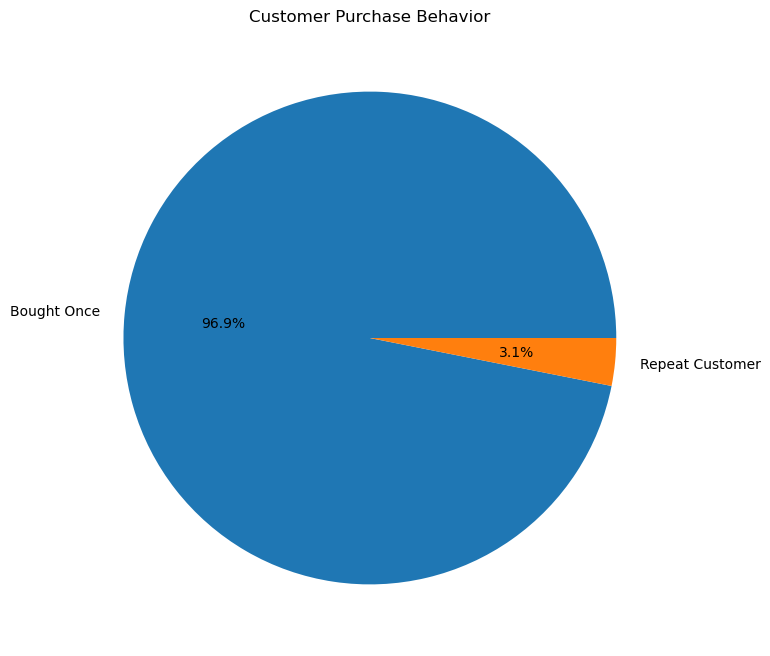

In [463]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(customer_distribution, labels=customer_distribution.index, autopct='%1.1f%%')
plt.title('Customer Purchase Behavior')
plt.show()

## Plotting a Cohort Analysis

In [464]:
displaying_null_values(customers_orders)

Total Rows: 99441, Total Columns: 12
                               Null Count  Null Percentage (%)
customer_id                             0             0.000000
customer_unique_id                      0             0.000000
customer_zip_code_prefix                0             0.000000
customer_city                           0             0.000000
customer_state                          0             0.000000
order_id                                0             0.000000
order_status                            0             0.000000
order_purchase_timestamp                0             0.000000
order_approved_at                     160             0.160899
order_delivered_carrier_date         1783             1.793023
order_delivered_customer_date        2965             2.981668
order_estimated_delivery_date           0             0.000000


The website did not mention what each column mean. However, I would assume that the null values in the order_approved_at column means the customers cancelled their orders before their orders can be shipped. The null values in the order_delivered columns could mean the customers have received their orders but did not confirm that they received it, and it could include those customers who cancelled their orders before it was shipped.

## Cohort Analysis

In [465]:
# Removing the null rows in the order approved at column
customers_orders_cleaned = customers_orders.dropna(subset=['order_approved_at'])

In [466]:
# Ensure datetime columns are in datetime format
customers_orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(customers_orders_cleaned['order_purchase_timestamp'])

# Create a cohort month for each customer based on their first purchase
customers_orders_cleaned['cohort_month'] = customers_orders_cleaned.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

# Create order_month to track each order's purchase month
customers_orders_cleaned['order_month'] = customers_orders_cleaned['order_purchase_timestamp'].dt.to_period('M')

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\1809414071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_cleaned['order_purchase_timestamp'] = pd.to_datetime(customers_orders_cleaned['order_purchase_timestamp'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\1809414071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_cleaned['cohort_month'] = customers_orders_cleaned.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
C:\

In [467]:
# Calculate the difference in months between the order and the cohort
customers_orders_cleaned['cohort_index'] = (customers_orders_cleaned['order_month'] - customers_orders_cleaned['cohort_month']).apply(lambda x: x.n)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\2623374462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_cleaned['cohort_index'] = (customers_orders_cleaned['order_month'] - customers_orders_cleaned['cohort_month']).apply(lambda x: x.n)


In [468]:
# Group data by cohort month and cohort index
cohort_data = customers_orders_cleaned.groupby(['cohort_month', 'cohort_index']).agg(
    unique_customers=('customer_unique_id', 'nunique')
).reset_index()

# Pivot the data for heatmap
cohort_pivot = cohort_data.pivot(index='cohort_month', columns='cohort_index', values='unique_customers')

In [469]:
# Divide each row by the first month's unique customers
cohort_size = cohort_pivot.iloc[:, 0]
retention_rates = cohort_pivot.divide(cohort_size, axis=0)

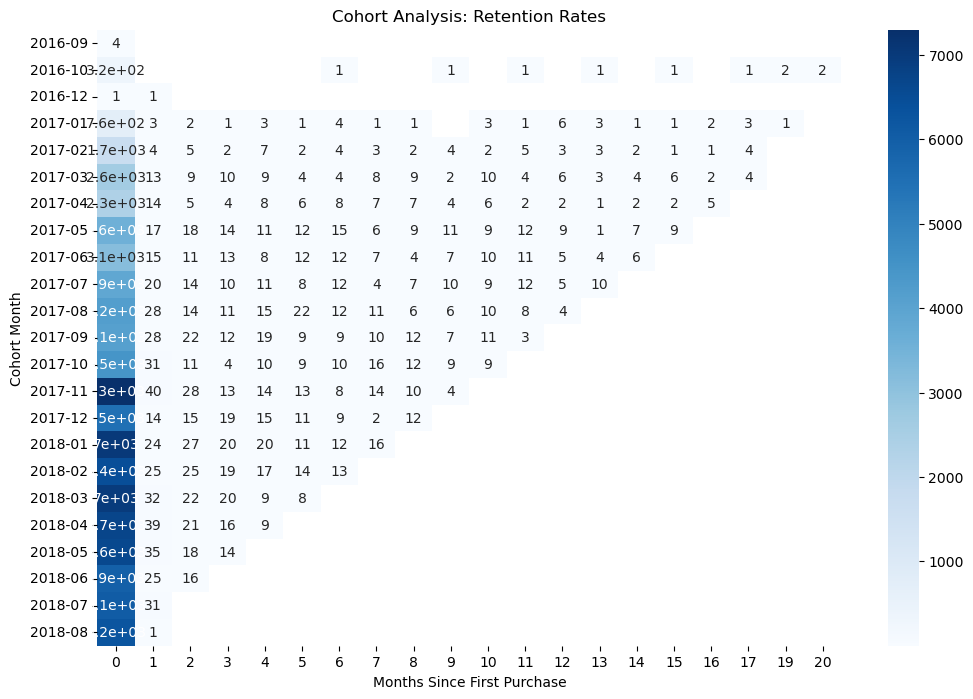

In [470]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_pivot, annot=True, cmap="Blues")
plt.title('Cohort Analysis: Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

## Understanding the customers

### Location of where most of the repeating customers stay

In [471]:
# Identify Repeat and Single Purchase Customers
customer_purchase_counts = customers_orders.groupby('customer_unique_id').size()
repeat_customers_ids = customer_purchase_counts[customer_purchase_counts > 1].index
single_purchase_ids = customer_purchase_counts[customer_purchase_counts == 1].index

# Split the Data
repeat_customers = customers_orders[customers_orders['customer_unique_id'].isin(repeat_customers_ids)]
repeat_unique_customers = repeat_customers.drop_duplicates(subset='customer_unique_id') # Getting the unique customers ID because they are duplicated
single_purchase_customers = customers_orders[customers_orders['customer_unique_id'].isin(single_purchase_ids)]

# Aggregate Data
# City
repeat_city_counts = repeat_unique_customers['customer_city'].value_counts().head(10)
single_city_counts = single_purchase_customers['customer_city'].value_counts().head(10)

# State
repeat_state_counts = repeat_unique_customers['customer_state'].value_counts()
single_state_counts = single_purchase_customers['customer_state'].value_counts()

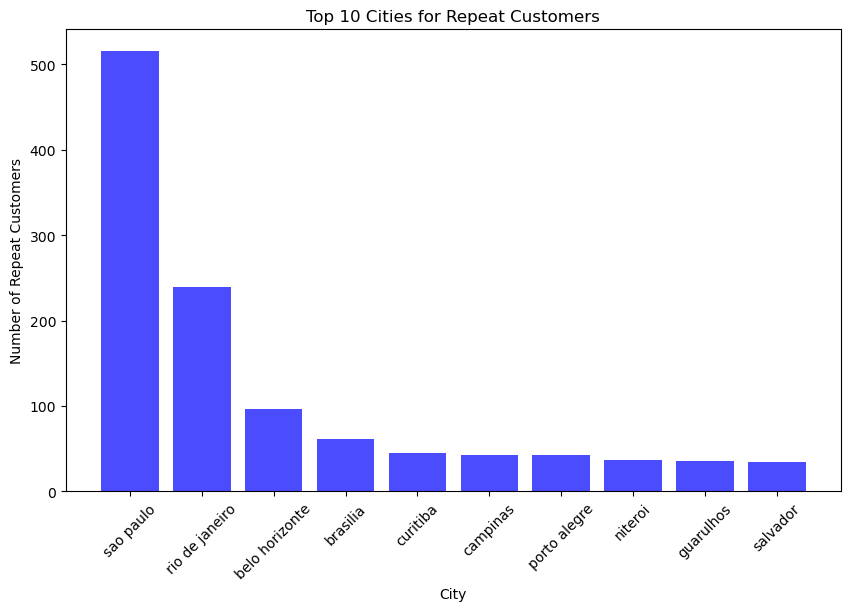

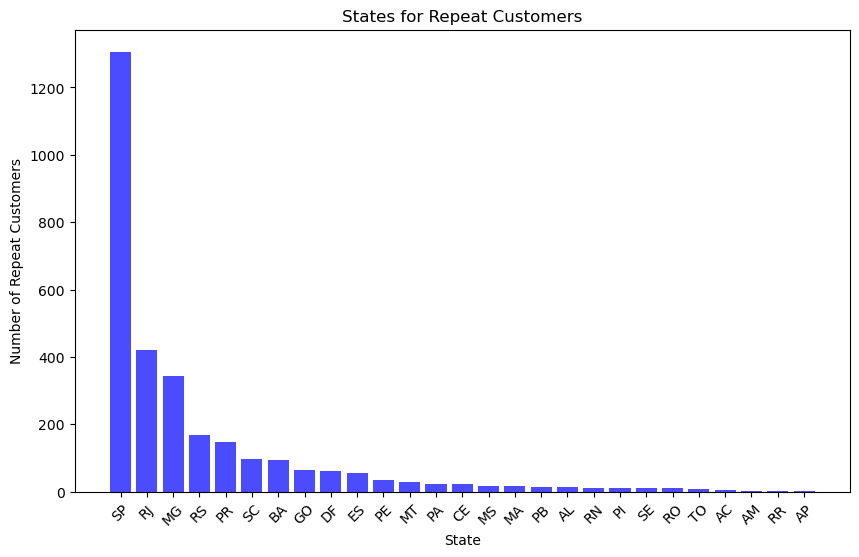

In [472]:
# Repeat Customers Cities
plt.figure(figsize=(10, 6))
plt.bar(repeat_city_counts.index, repeat_city_counts.values, color='blue', alpha=0.7)
plt.title('Top 10 Cities for Repeat Customers')
plt.xlabel('City')
plt.ylabel('Number of Repeat Customers')
plt.xticks(rotation=45)
plt.show()

# Repeat Customers State
plt.figure(figsize=(10, 6))
plt.bar(repeat_state_counts.index, repeat_state_counts.values, color='blue', alpha=0.7)
plt.title('States for Repeat Customers')
plt.xlabel('State')
plt.ylabel('Number of Repeat Customers')
plt.xticks(rotation=45)
plt.show()

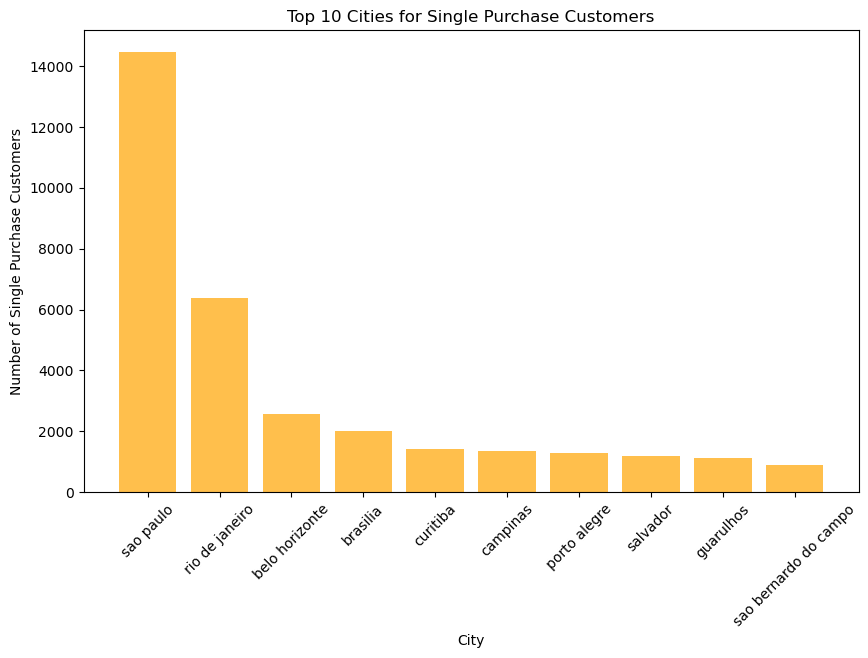

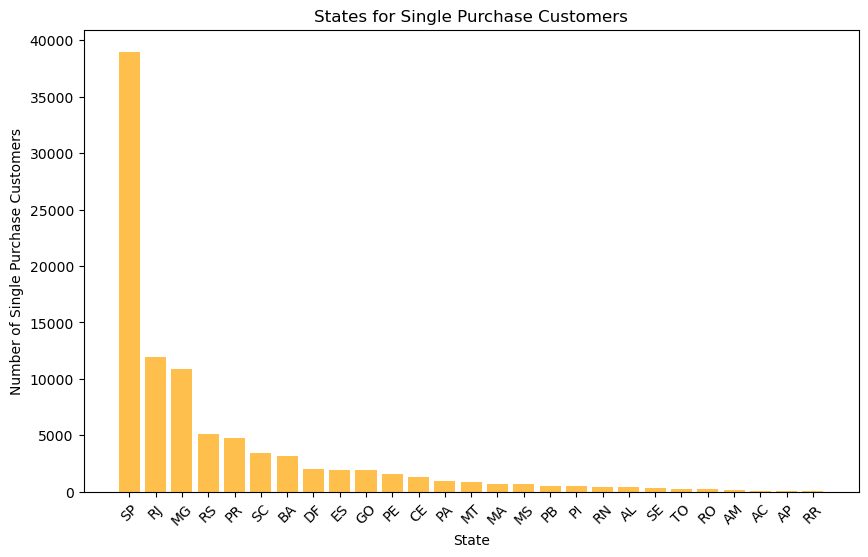

In [473]:
# Single Purchase Customers Cities
plt.figure(figsize=(10, 6))
plt.bar(single_city_counts.index, single_city_counts.values, color='orange', alpha=0.7)
plt.title('Top 10 Cities for Single Purchase Customers')
plt.xlabel('City')
plt.ylabel('Number of Single Purchase Customers')
plt.xticks(rotation=45)
plt.show()

# Single Purchase Customers State
plt.figure(figsize=(10, 6))
plt.bar(single_state_counts.index, single_state_counts.values, color='orange', alpha=0.7)
plt.title('States for Single Purchase Customers')
plt.xlabel('State')
plt.ylabel('Number of Single Purchase Customers')
plt.xticks(rotation=45)
plt.show()

Most customers are located in the sao paulo, rio de janeiro and belo horizonte cities. Thus, if more marketing campaigns are conducted there, the company could expect greater ROI.

### Analysing the reviews made by repeating customers and the product that they purchased

In [474]:
repeat_customers

customer_id                customer_unique_id  \
5      879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
8      5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
13     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
32     2d5831cb2dff7cdefba62e950ae3dc7b  e9dd12dca17352644a959d9dea133935   
33     b2bed119388167a954382cca36c4777f  e079b18794454de9d2be5c12b4392294   
...                                 ...                               ...   
99324  5b46a0d983eec8c97363bea78d4a69dd  8bab3162259edfaadd1ea2e1fe7f58dc   
99327  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
99336  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
99353  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   
99406  d9110683c7a282144e9fc97660026a28  5cbfdb85ec130898108b32c50d619c39   

       customer_zip_code_prefix         customer_city customer_state  \
5                         89254        jaragua do sul             SC   
8                         81560              curitiba             PR   
13                         5704             sao paulo             SP   
32                        42800              camacari             BA   
33                        27525               resende             RJ   
...                         ...                   ...            ...   
99324                     31565        belo horizonte             MG   
99327                     38050               uberaba             MG   
99336                      9530    sao caetano do sul             SP   
99353                     29134                 viana             ES   
99406                     74980  aparecida de goiania             GO   

                               order_id order_status order_purchase_timestamp  \
5      5741ea1f91b5fbab2bd2dc653a5b5099    delivered      2017-09-14 18:14:31   
8      1ebeea841c590e86a14a0d7a48e7d062    delivered      2018-01-18 12:35:44   
13     852d2f4d37773bcbc21c8e09a05a4ea5    delivered      2018-03-07 15:57:14   
32     19c0c76962278b152cc44fc63ffd5e48    delivered      2018-04-18 09:42:53   
33     77b062be7c5bd21712905feb8e1cfeed    delivered      2017-06-14 18:31:54   
...                                 ...          ...                      ...   
99324  3aefaf9d41208dba8b2c336def99b00f    delivered      2017-10-29 11:59:50   
99327  46984ee8227e1926e055327b55ad576c    delivered      2017-12-13 17:35:26   
99336  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   
99353  0e48ca107de4291a6f7536b4f5cf512e    delivered      2018-05-15 10:39:41   
99406  e65fa5f31ce4436d38bcf5e109fd43e4    delivered      2018-01-24 17:53:44   

         order_approved_at order_delivered_carrier_date  \
5      2017-09-14 18:25:11          2017-09-18 21:27:40   
8      2018-01-18 12:56:32          2018-01-18 23:25:35   
13     2018-03-07 16:15:30          2018-03-12 23:02:49   
32     2018-04-18 09:55:17          2018-04-20 18:52:39   
33     2017-06-15 18:43:04          2017-06-22 08:11:38   
...                    ...                          ...   
99324  2017-10-30 10:12:39          2017-10-31 18:42:00   
99327  2017-12-15 02:17:39          2017-12-19 20:33:02   
99336  2018-06-20 14:38:41          2018-06-20 15:02:00   
99353  2018-05-15 14:30:29          2018-05-15 15:55:00   
99406  2018-01-24 18:12:41          2018-01-30 15:13:39   

      order_delivered_customer_date order_estimated_delivery_date  
5               2017-09-28 17:32:43           2017-10-04 00:00:00  
8               2018-01-26 15:17:57           2018-02-20 00:00:00  
13              2018-03-15 00:46:30           2018-03-19 00:00:00  
32              2018-05-17 20:19:49           2018-05-18 00:00:00  
33              2017-07-07 20:32:47           2017-07-07 00:00:00  
...                             ...                           ...  
99324           2017-11-06 21:18:53           2017-11-24 00:00:00  
99327       

In [475]:
repeat_customers_reviews= repeat_customers.merge(order_reviews,  how='inner', on='order_id')
repeat_customers_reviews

customer_id                customer_unique_id  \
0     879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
1     5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
2     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
3     2d5831cb2dff7cdefba62e950ae3dc7b  e9dd12dca17352644a959d9dea133935   
4     b2bed119388167a954382cca36c4777f  e079b18794454de9d2be5c12b4392294   
...                                ...                               ...   
6743  5b46a0d983eec8c97363bea78d4a69dd  8bab3162259edfaadd1ea2e1fe7f58dc   
6744  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
6745  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
6746  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   
6747  d9110683c7a282144e9fc97660026a28  5cbfdb85ec130898108b32c50d619c39   

      customer_zip_code_prefix         customer_city customer_state  \
0                        89254        jaragua do sul             SC   
1                        81560              curitiba             PR   
2                         5704             sao paulo             SP   
3                        42800              camacari             BA   
4                        27525               resende             RJ   
...                        ...                   ...            ...   
6743                     31565        belo horizonte             MG   
6744                     38050               uberaba             MG   
6745                      9530    sao caetano do sul             SP   
6746                     29134                 viana             ES   
6747                     74980  aparecida de goiania             GO   

                              order_id order_status order_purchase_timestamp  \
0     5741ea1f91b5fbab2bd2dc653a5b5099    delivered      2017-09-14 18:14:31   
1     1ebeea841c590e86a14a0d7a48e7d062    delivered      2018-01-18 12:35:44   
2     852d2f4d37773bcbc21c8e09a05a4ea5    delivered      2018-03-07 15:57:14   
3     19c0c76962278b152cc44fc63ffd5e48    delivered      2018-04-18 09:42:53   
4     77b062be7c5bd21712905feb8e1cfeed    delivered      2017-06-14 18:31:54   
...                                ...          ...                      ...   
6743  3aefaf9d41208dba8b2c336def99b00f    delivered      2017-10-29 11:59:50   
6744  46984ee8227e1926e055327b55ad576c    delivered      2017-12-13 17:35:26   
6745  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   
6746  0e48ca107de4291a6f7536b4f5cf512e    delivered      2018-05-15 10:39:41   
6747  e65fa5f31ce4436d38bcf5e109fd43e4    delivered      2018-01-24 17:53:44   

        order_approved_at order_delivered_carrier_date  \
0     2017-09-14 18:25:11          2017-09-18 21:27:40   
1     2018-01-18 12:56:32          2018-01-18 23:25:35   
2     2018-03-07 16:15:30          2018-03-12 23:02:49   
3     2018-04-18 09:55:17          2018-04-20 18:52:39   
4     2017-06-15 18:43:04          2017-06-22 08:11:38   
...                   ...                          ...   
6743  2017-10-30 10:12:39          2017-10-31 18:42:00   
6744  2017-12-15 02:17:39          2017-12-19 20:33:02   
6745  2018-06-20 14:38:41          2018-06-20 15:02:00   
6746  2018-05-15 14:30:29          2018-05-15 15:55:00   
6747  2018-01-24 18:12:41          2018-01-30 15:13:39   

     order_delivered_customer_date order_estimated_delivery_date  \
0              2017-09-28 17:32:43           2017-10-04 00:00:00   
1              2018-01-26 15:17:57           2018-02-20 00:00:00   
2              2018-03-15 00:46:30           2018-03-19 00:00:00   
3              2018-05-17 20:19:49           2018-05-18 00:00:00   
4              2017-07-07 20:32:47           2017-07-07 00:00:00   
...                            ...                           ...   
6743           2017-11-06 21:18:53           2017-11-24 00:00:00   
6744           2018-01-05 22:24:41           2018-01-22 00:

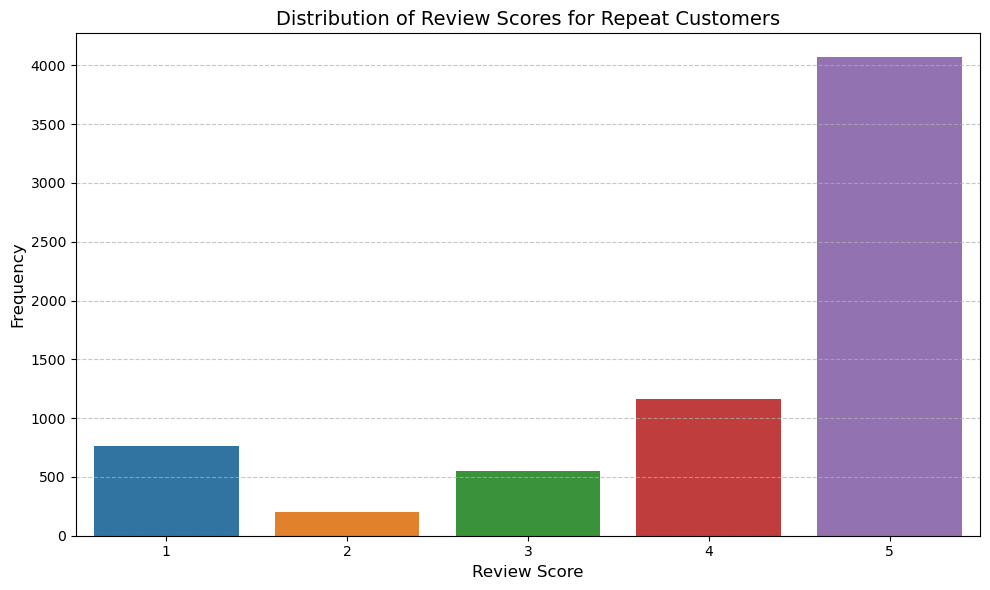

In [476]:
# Plot the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(data=repeat_customers_reviews, x='review_score', order=sorted(repeat_customers_reviews['review_score'].unique()))
plt.title('Distribution of Review Scores for Repeat Customers', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [477]:
repeat_customers_reviews_orderItems = repeat_customers_reviews.merge(order_items,  how='inner', on='order_id')
repeat_customers_reviews_orderItems_products= repeat_customers_reviews_orderItems.merge(products_translated,  how='inner', on='product_id')
repeat_customers_reviews_orderItems_products

customer_id                customer_unique_id  \
0     879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
1     56a4d10644e5aa0b23861f9e90f37a8d  7d0983269f825d3112e5a64364b1258a   
2     5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
3     d3d14e3778714a38a67735307ac56a73  f4f2d85371955b0e254ce594fcf09a0d   
4     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
...                                ...                               ...   
7942  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
7943  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
7944  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
7945  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
7946  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   

      customer_zip_code_prefix       customer_city customer_state  \
0                        89254      jaragua do sul             SC   
1                        69303           boa vista             RR   
2                        81560            curitiba             PR   
3                        37200              lavras             MG   
4                         5704           sao paulo             SP   
...                        ...                 ...            ...   
7942                     38050             uberaba             MG   
7943                      9530  sao caetano do sul             SP   
7944                      9530  sao caetano do sul             SP   
7945                      9530  sao caetano do sul             SP   
7946                     29134               viana             ES   

                              order_id order_status order_purchase_timestamp  \
0     5741ea1f91b5fbab2bd2dc653a5b5099    delivered      2017-09-14 18:14:31   
1     fe157fed1771944584f95dce138eefad    delivered      2018-06-05 18:54:48   
2     1ebeea841c590e86a14a0d7a48e7d062    delivered      2018-01-18 12:35:44   
3     2c76b4566b3bab2c0f23f992ed70ea07    delivered      2018-01-30 11:12:55   
4     852d2f4d37773bcbc21c8e09a05a4ea5    delivered      2018-03-07 15:57:14   
...                                ...          ...                      ...   
7942  46984ee8227e1926e055327b55ad576c    delivered      2017-12-13 17:35:26   
7943  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   
7944  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   
7945  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   
7946  0e48ca107de4291a6f7536b4f5cf512e    delivered      2018-05-15 10:39:41   

        order_approved_at order_delivered_carrier_date  \
0     2017-09-14 18:25:11          2017-09-18 21:27:40   
1     2018-06-07 03:12:31          2018-06-11 10:40:00   
2     2018-01-18 12:56:32          2018-01-18 23:25:35   
3     2018-01-30 11:50:01          2018-01-30 21:46:32   
4     2018-03-07 16:15:30          2018-03-12 23:02:49   
...                   ...                          ...   
7942  2017-12-15 02:17:39          2017-12-19 20:33:02   
7943  2018-06-20 14:38:41          2018-06-20 15:02:00   
7944  2018-06-20 14:38:41          2018-06-20 15:02:00   
7945  2018-06-20 14:38:41          2018-06-20 15:02:00   
7946  2018-05-15 14:30:29          2018-05-15 15:55:00   

     order_delivered_customer_date order_estimated_delivery_date  \
0              2017-09-28 17:32:43           2017-10-04 00:00:00   
1              2018-06-26 19:28:24           2018-08-06 00:00:00   
2              2018-01-26 15:17:57           2018-02-20 00:00:00   
3              2018-02-15 11:37:15           2018-03-02 00:00:00   
4              2018-03-15 00:46:30           2018-03-19 00:00:00   
...                            ...                           ...   
7942           2018-01-05 22:24:41           2018-01-22 00:00:00   
7943           2018-06-27 13:18:47           2018-07-18 00:00:00   
7944           

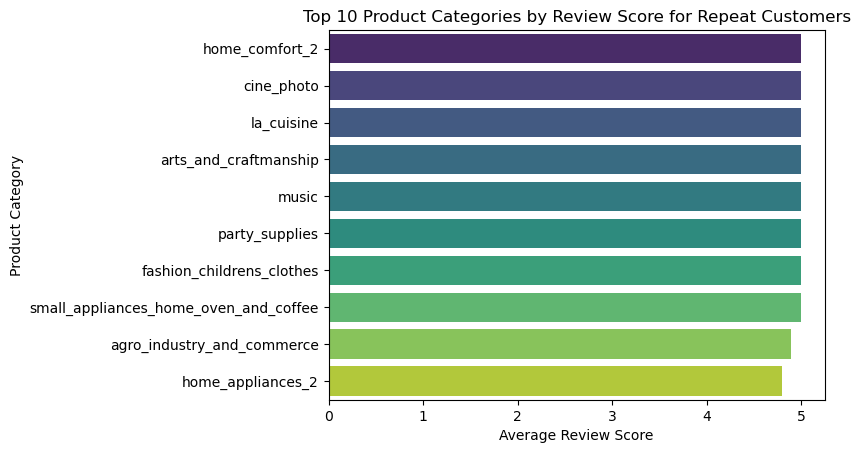

In [478]:
# Finding the product category with the highest review score
# Group by product category name and calculate the average review score for each product category
average_reviews_per_category_repeat_customers_top = (
    repeat_customers_reviews_orderItems_products.groupby('product_category_name_english')['review_score']
    .mean()
    .sort_values(ascending=False)
)

# Storing the results in a dataframe
average_reviews_per_category_df_repeat_customers_top = average_reviews_per_category_repeat_customers_top.reset_index()
average_reviews_per_category_df_repeat_customers_top.columns = ['product_category_name_english', 'average_review_score']

# Getting the top categories with the highest reviews
top_categories_by_reviews_repeat_customers = average_reviews_per_category_df_repeat_customers_top.head(10)

# Plot
sns.barplot(x='average_review_score', y='product_category_name_english', data=top_categories_by_reviews_repeat_customers, palette='viridis')
plt.title('Top 10 Product Categories by Review Score for Repeat Customers')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

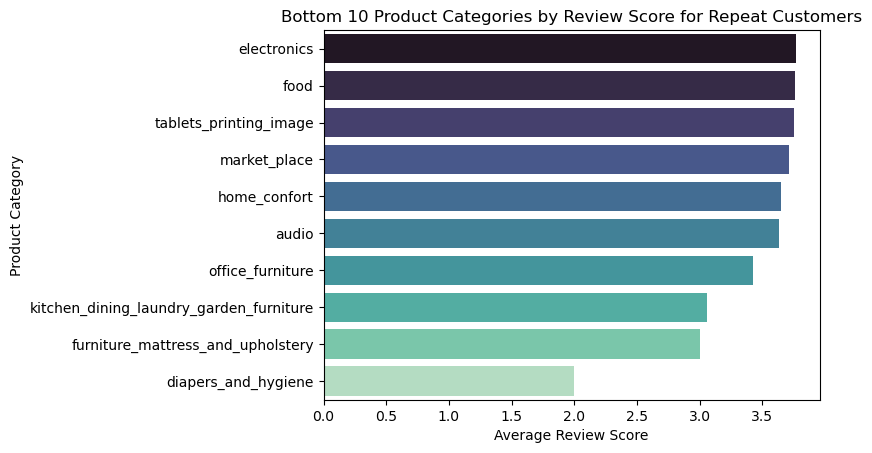

In [479]:
# Getting the bottom categories
bottom_categories_by_reviews_repeat_customers = average_reviews_per_category_df_repeat_customers_top.tail(10)

# Plot
sns.barplot(
    x='average_review_score',
    y='product_category_name_english',
    data=bottom_categories_by_reviews_repeat_customers,
    palette='mako'
)
plt.title('Bottom 10 Product Categories by Review Score for Repeat Customers')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

In [480]:
# Removing null values in the message column
repeat_customers_reviews_no_missing_review_content = repeat_customers_reviews.dropna(subset=['review_comment_message'])

In [481]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment["compound"], sentiment["pos"], sentiment["neu"], sentiment["neg"]

# Apply the function and store results
repeat_customers_reviews_no_missing_review_content[["sentiment_score", "positive", "neutral", "negative"]] = repeat_customers_reviews_no_missing_review_content["review_comment_message"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# Classify sentiment based on sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

repeat_customers_reviews_no_missing_review_content["sentiment_category"] = repeat_customers_reviews_no_missing_review_content["sentiment_score"].apply(classify_sentiment)
repeat_customers_reviews_no_missing_review_content

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\2811536982.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_reviews_no_missing_review_content[["sentiment_score", "positive", "neutral", "negative"]] = repeat_customers_reviews_no_missing_review_content["review_comment_message"].apply(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\2811536982.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

customer_id                customer_unique_id  \
0     879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
1     5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
2     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
5     a3b0fda37bae14cf754877bed475e80c  c9158d089637ab443c78984d20da7fc0   
7     8891eb5ca0e28df961b2b5b8f3c0eb23  13ac6da47fef1b17b16f511e03b57918   
...                                ...                               ...   
6740  f1497d68a89361282297041502917ad9  4c116f8ddec984371284ab7bc860001a   
6741  4740044a9390cc45b2c213e8714129e7  08f7cf00ed9ff3e0a08fc136ec272974   
6742  4740044a9390cc45b2c213e8714129e7  08f7cf00ed9ff3e0a08fc136ec272974   
6744  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
6745  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   

      customer_zip_code_prefix       customer_city customer_state  \
0                        89254      jaragua do sul             SC   
1                        81560            curitiba             PR   
2                         5704           sao paulo             SP   
5                         5727           sao paulo             SP   
7                         2632           sao paulo             SP   
...                        ...                 ...            ...   
6740                     79500           paranaiba             MS   
6741                     71900            brasilia             DF   
6742                     71900            brasilia             DF   
6744                     38050             uberaba             MG   
6745                      9530  sao caetano do sul             SP   

                              order_id order_status order_purchase_timestamp  \
0     5741ea1f91b5fbab2bd2dc653a5b5099    delivered      2017-09-14 18:14:31   
1     1ebeea841c590e86a14a0d7a48e7d062    delivered      2018-01-18 12:35:44   
2     852d2f4d37773bcbc21c8e09a05a4ea5    delivered      2018-03-07 15:57:14   
5     2dd604f5ec1bd2f58c14e9908c7df826    delivered      2018-01-31 16:43:23   
7     ff536d93ae4214b4d51c2894ccfc569f      shipped      2017-12-21 09:01:00   
...                                ...          ...                      ...   
6740  14325b030357956fe06c611e432d7e04    delivered      2017-06-28 17:19:52   
6741  f9c78e6e58306dc81efbbada1ac11f24    delivered      2017-09-01 22:26:18   
6742  f9c78e6e58306dc81efbbada1ac11f24    delivered      2017-09-01 22:26:18   
6744  46984ee8227e1926e055327b55ad576c    delivered      2017-12-13 17:35:26   
6745  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   

        order_approved_at order_delivered_carrier_date  \
0     2017-09-14 18:25:11          2017-09-18 21:27:40   
1     2018-01-18 12:56:32          2018-01-18 23:25:35   
2     2018-03-07 16:15:30          2018-03-12 23:02:49   
5     2018-02-01 11:35:44          2018-02-06 15:35:16   
7     2017-12-22 12:33:26          2018-01-03 18:22:09   
...                   ...                          ...   
6740  2017-06-29 02:50:17          2017-07-03 08:43:41   
6741  2017-09-02 22:23:53          2017-09-05 12:08:46   
6742  2017-09-02 22:23:53          2017-09-05 12:08:46   
6744  2017-12-15 02:17:39          2017-12-19 20:33:02   
6745  2018-06-20 14:38:41          2018-06-20 15:02:00   

     order_delivered_customer_date order_estimated_delivery_date  \
0              2017-09-28 17:32:43           2017-10-04 00:00:00   
1              2018-01-26 15:17:57           2018-02-20 00:00:00   
2              2018-03-15 00:46:30           2018-03-19 00:00:00   
5              2018-02-10 16:12:22           2018-02-22 00:00:00   
7                              NaN           2018-01-10 00:00:00   
...                            ...                           ...   
6740           2017-07-10 14:33:42           2017-07-27 00:00:00   
6741           2017-09-13 19:07:33           2017-09-21 00:00:00   
6742           

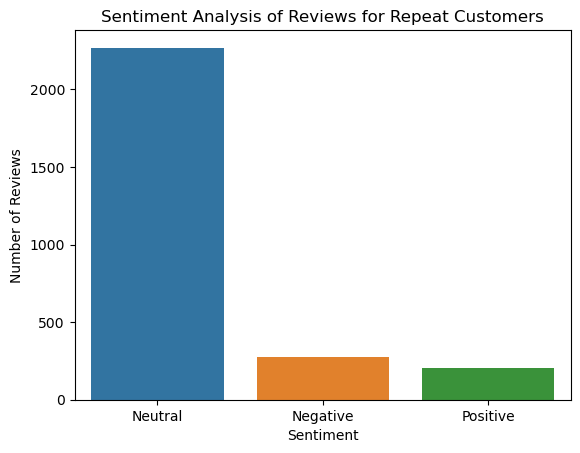

In [482]:
# Number of each sentiment category
sentiment_counts_repeat_customers = repeat_customers_reviews_no_missing_review_content["sentiment_category"].value_counts()

# Plot
sns.barplot(x=sentiment_counts_repeat_customers.index, y=sentiment_counts_repeat_customers.values)
plt.title("Sentiment Analysis of Reviews for Repeat Customers")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


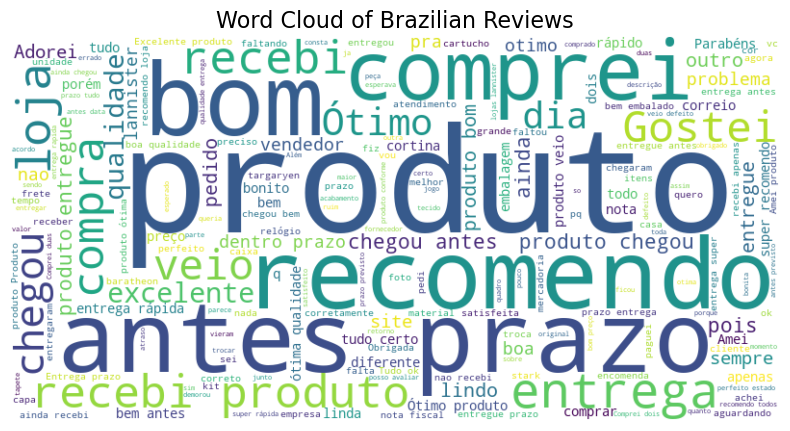

In [483]:
# Download Portuguese stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("portuguese"))

# Combining all the reviews together
all_reviews = " ".join(repeat_customers_reviews_no_missing_review_content["review_comment_message"])

# Removing stopwords
filtered_words = " ".join([word for word in all_reviews.split() if word.lower() not in stop_words])

# Word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    colormap="viridis", 
    stopwords=stop_words
).generate(filtered_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Brazilian Reviews", fontsize=16)
plt.show()

## Analysing the price of the items bought by repeating customers and how much they spent per order

### Finding the most bought product category

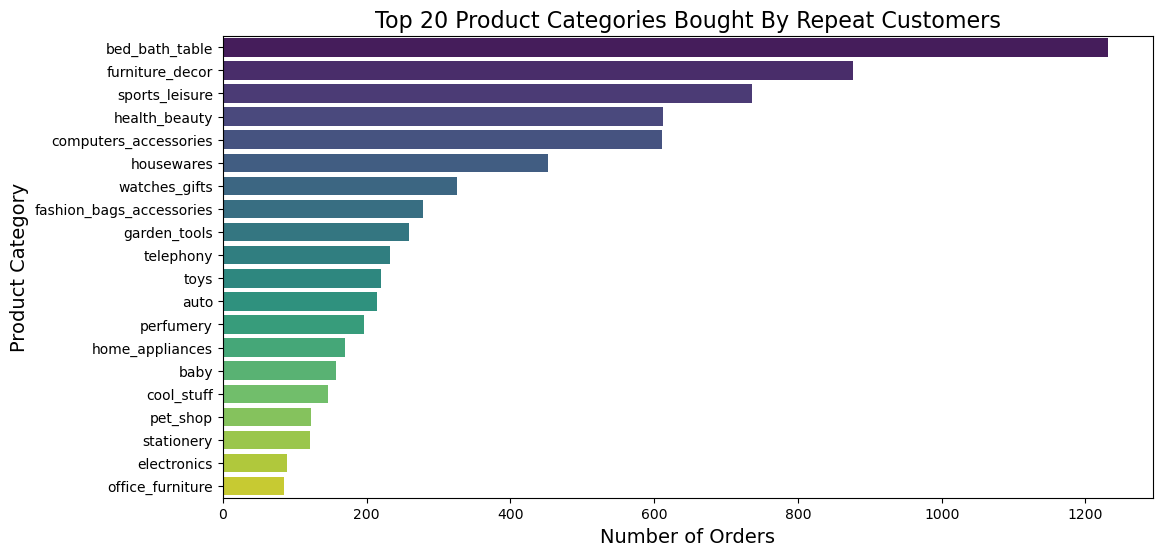

In [484]:
# Distribution of product categories
plt.figure(figsize=(12, 6))
product_category_counts_repeat_customers_top = repeat_customers_reviews_orderItems_products['product_category_name_english'].value_counts().head(20) # Top 20 product categories 
sns.barplot(x=product_category_counts_repeat_customers_top.values, y=product_category_counts_repeat_customers_top.index, palette="viridis")
plt.title('Top 20 Product Categories Bought By Repeat Customers', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

### Finding the least bought product category

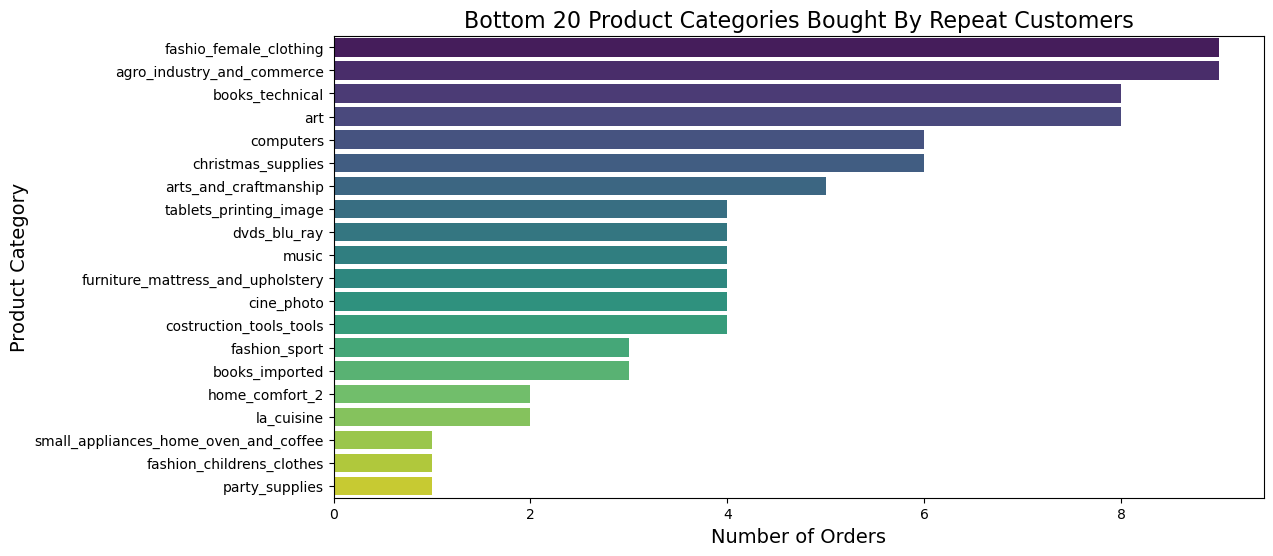

In [485]:
# Distribution of product categories
plt.figure(figsize=(12, 6))
product_category_counts_repeat_customers_bottom = repeat_customers_reviews_orderItems_products['product_category_name_english'].value_counts().tail(20) # Bottom 20 product categories 
sns.barplot(x=product_category_counts_repeat_customers_bottom.values, y=product_category_counts_repeat_customers_bottom.index, palette="viridis")
plt.title('Bottom 20 Product Categories Bought By Repeat Customers', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

### Finding the most and least expensive product category

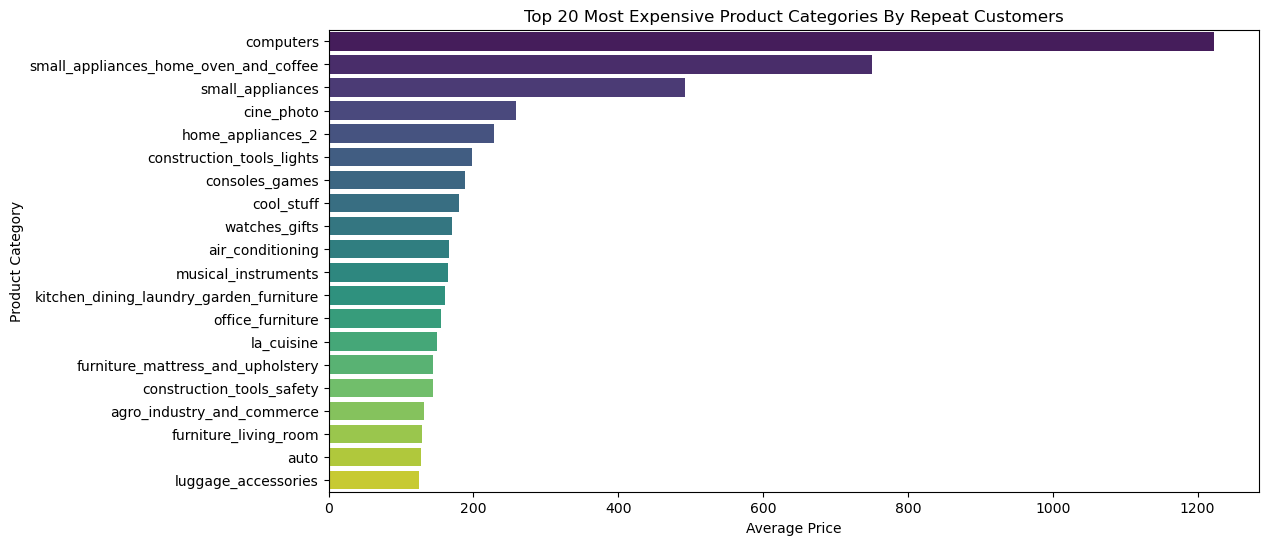

In [486]:
# Calculate the average price per category
avg_price_per_category_repeat_customers = (
    repeat_customers_reviews_orderItems_products.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

# Plotting the top 20 most expensive categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_per_category_repeat_customers.values,
    y=avg_price_per_category_repeat_customers.index,
    palette="viridis",
)
plt.title("Top 20 Most Expensive Product Categories By Repeat Customers")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()

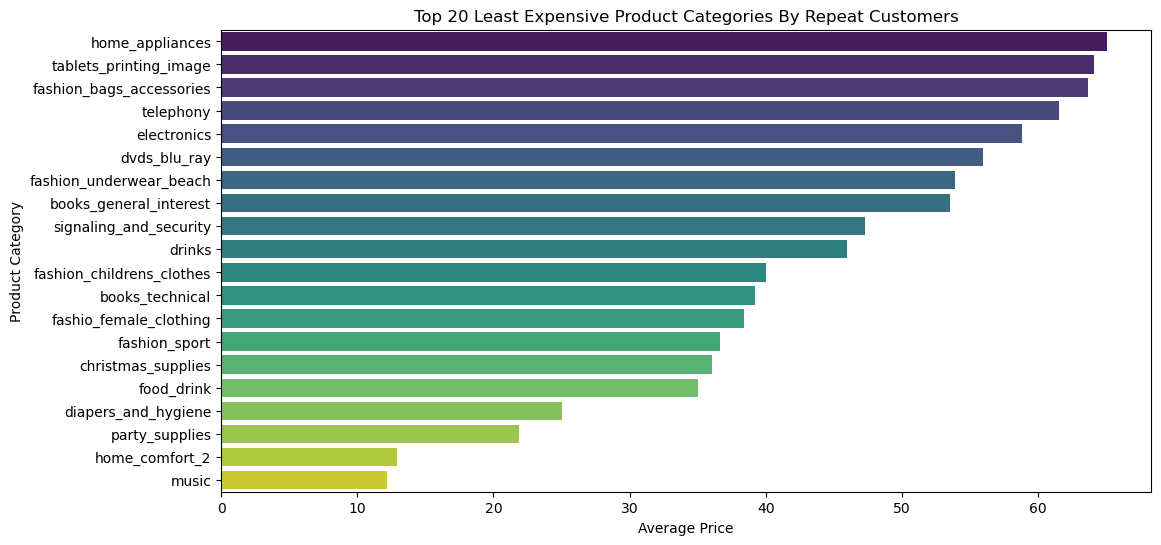

In [487]:
# Calculate the average price per category
avg_price_per_category_repeat_customers_bottom = (
    repeat_customers_reviews_orderItems_products.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .tail(20)
)

# Plotting the bottom 20 most expensive categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_per_category_repeat_customers_bottom.values,
    y=avg_price_per_category_repeat_customers_bottom.index,
    palette="viridis",
)
plt.title("Top 20 Least Expensive Product Categories By Repeat Customers")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()

### Finding the top and bottom revenue per product category of repeat customers

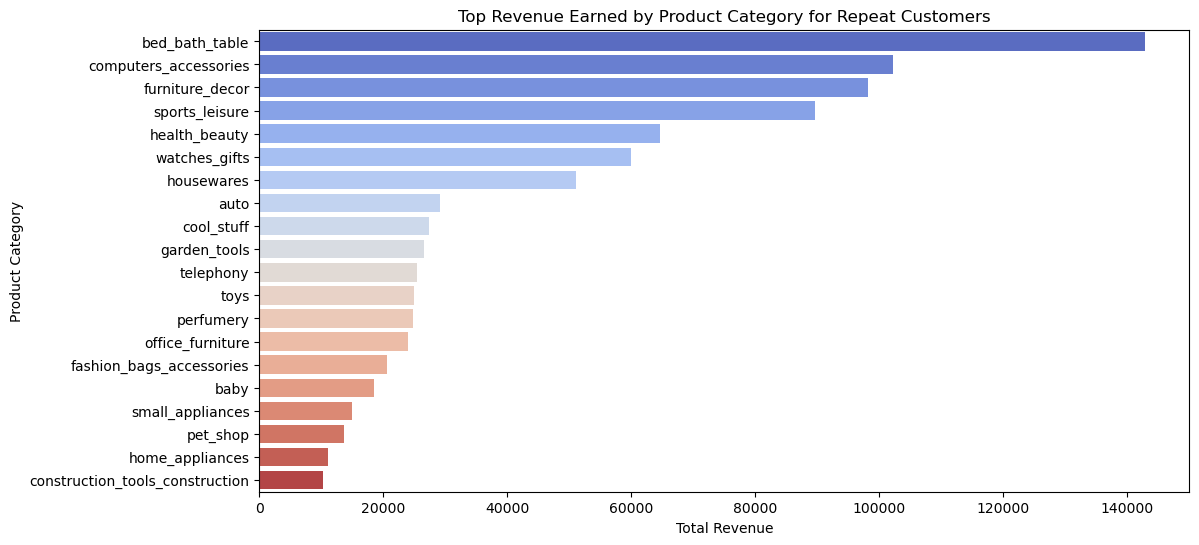

In [488]:
# Creating a revenue column
repeat_customers_reviews_orderItems_products['revenue'] = repeat_customers_reviews_orderItems_products['order_item_id'] * repeat_customers_reviews_orderItems_products['price']
# Find the total revenue per category (top)
revenue_per_category_repeat_customers_top = repeat_customers_reviews_orderItems_products.groupby("product_category_name_english")["revenue"].sum().sort_values(ascending=False).head(20)

# Plotting the top revenue earned by each category
plt.figure(figsize=(12, 6))
sns.barplot(
    x=revenue_per_category_repeat_customers_top.values,
    y=revenue_per_category_repeat_customers_top.index,
    palette="coolwarm",
)
plt.title("Top Revenue Earned by Product Category for Repeat Customers")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

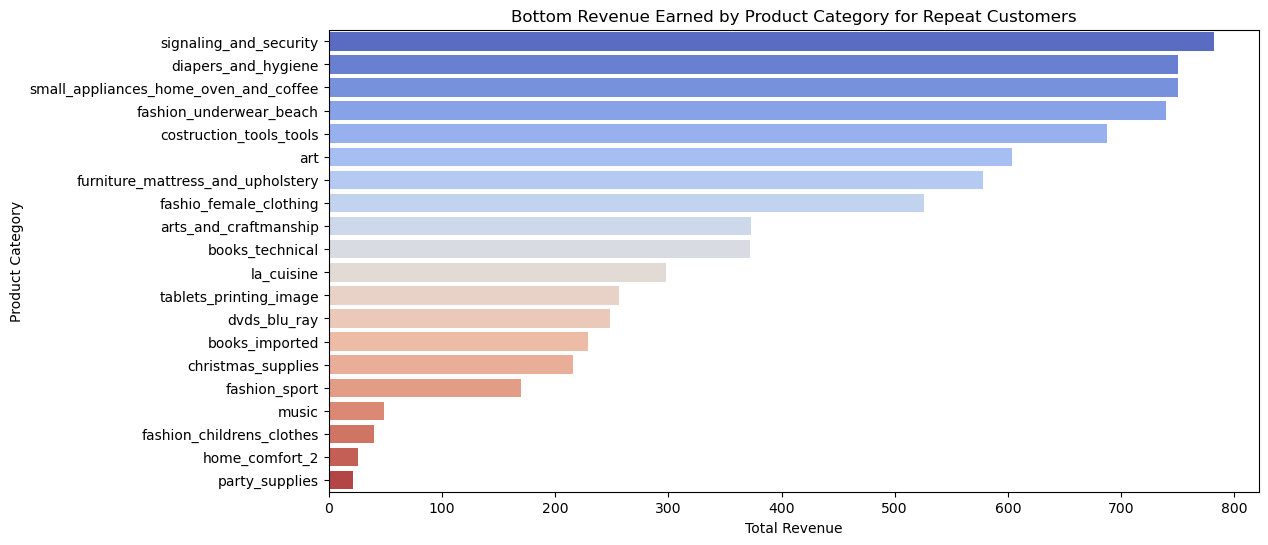

In [489]:
# Find the total revenue per category (bottom)
revenue_per_category_repeat_customers_bottom = repeat_customers_reviews_orderItems_products.groupby("product_category_name_english")["revenue"].sum().sort_values(ascending=False).tail(20)

# Plotting the bottom revenue earned by each category
plt.figure(figsize=(12, 6))
sns.barplot(
    x=revenue_per_category_repeat_customers_bottom.values,
    y=revenue_per_category_repeat_customers_bottom.index,
    palette="coolwarm",
)
plt.title("Bottom Revenue Earned by Product Category for Repeat Customers")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

###  Analysing delivery times of repeating customers

In [490]:
# We see that some courier dates are missing. I will be using courier dates to calculate delivery times as sometimes the customers may not report that they have received the item.
# Removing rows where courier dates are null
repeat_customers_reviews_no_missing_carrier_dates = repeat_customers_reviews.dropna(subset=['order_delivered_carrier_date'])
# Converting order delivered date and time placed to datetime format
repeat_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
    repeat_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date']
)
repeat_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp'] = pd.to_datetime(
    repeat_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp']
)

# Calculating the delivery time
repeat_customers_reviews_no_missing_carrier_dates['delivery_time'] = (
    repeat_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] -
    repeat_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp']
).abs()

# Convert the result to days
repeat_customers_reviews_no_missing_carrier_dates['delivery_time'] = (
    repeat_customers_reviews_no_missing_carrier_dates['delivery_time'].dt.total_seconds() / 86400
) # 60 * 60 * 24

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\335408936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\335408936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\335408936.py:13: SettingWithCopyWarning: 
A v

count    6579.000000
mean        3.363028
std         3.479098
min         0.000984
25%         1.210596
50%         2.363079
75%         4.287633
max        55.946528
Name: delivery_time, dtype: float64


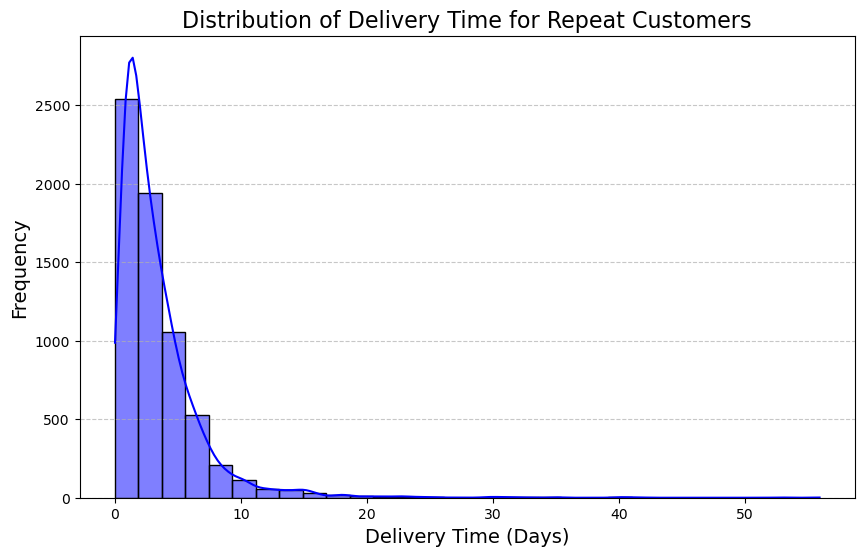

In [491]:
# Calculating the statistics of delivery_time
print(repeat_customers_reviews_no_missing_carrier_dates['delivery_time'].describe())

# Plot a histogram for delivery_time
plt.figure(figsize=(10, 6))
sns.histplot(repeat_customers_reviews_no_missing_carrier_dates['delivery_time'], 
             bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time for Repeat Customers', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

For some reason there is a delivery duration of 55 days. I will remove the outliers and try again

count    6237.000000
mean        2.777880
std         1.973935
min         0.000984
25%         1.172488
50%         2.219618
75%         3.982106
max         8.895058
Name: delivery_time, dtype: float64


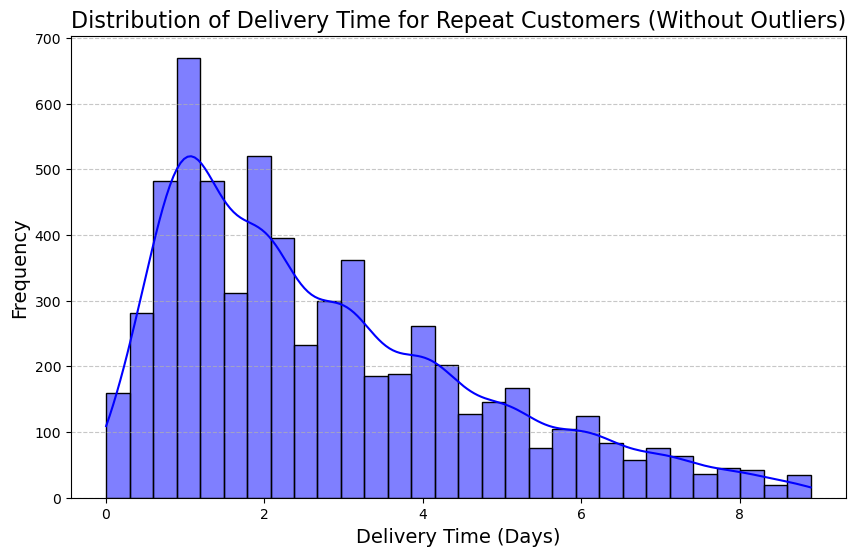

In [492]:
# Find Q1 and Q3
Q1_repeat_customers = repeat_customers_reviews_no_missing_carrier_dates['delivery_time'].quantile(0.25)
Q3_repeat_customers = repeat_customers_reviews_no_missing_carrier_dates['delivery_time'].quantile(0.75)

# Find the Interquartile Range
IQR_repeat_customers = Q3_repeat_customers - Q1_repeat_customers

# Define bounds for outliers
lower_bound_repeat_customers = Q1_repeat_customers - 1.5 * IQR_repeat_customers
upper_bound_repeat_customers = Q3_repeat_customers + 1.5 * IQR_repeat_customers

# Filter the data to remove outliers
filtered_df_repeat_customers = repeat_customers_reviews_no_missing_carrier_dates[
    (repeat_customers_reviews_no_missing_carrier_dates['delivery_time'] >= lower_bound_repeat_customers) &
    (repeat_customers_reviews_no_missing_carrier_dates['delivery_time'] <= upper_bound_repeat_customers)
]
# Calculating the statistics of delivery_time
print(filtered_df_repeat_customers['delivery_time'].describe())

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_repeat_customers['delivery_time'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time for Repeat Customers (Without Outliers)', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The delivery time is quite good, with most orders delivered within 4 days. Perhaps this is why customers are willing to buy again

### Analysing the price of the items bought by repeat customers

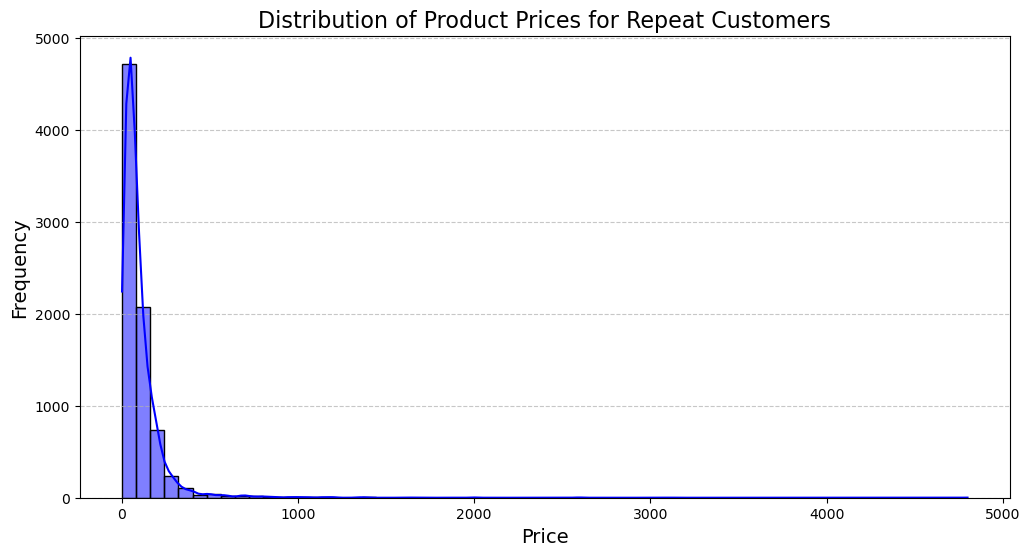

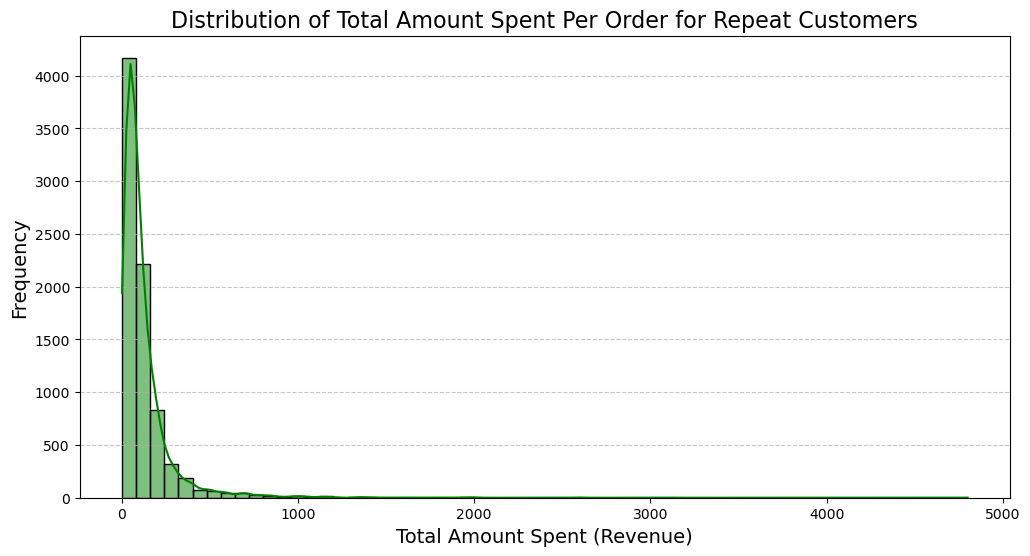

In [493]:
# Calculate the revenue for each order
repeat_customers_reviews_orderItems['revenue'] = repeat_customers_reviews_orderItems['price'] * repeat_customers_reviews_orderItems['order_item_id']

# Plotting the distribution of the price of products bought by repeating customers
plt.figure(figsize=(12, 6))
sns.histplot(repeat_customers_reviews_orderItems['price'], kde=True, bins=60, color='blue')
plt.title('Distribution of Product Prices for Repeat Customers', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the distribution of the total amount spent per order
plt.figure(figsize=(12, 6))
sns.histplot(repeat_customers_reviews_orderItems['revenue'], kde=True, bins=60, color='green')
plt.title('Distribution of Total Amount Spent Per Order for Repeat Customers', fontsize=16)
plt.xlabel('Total Amount Spent (Revenue)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

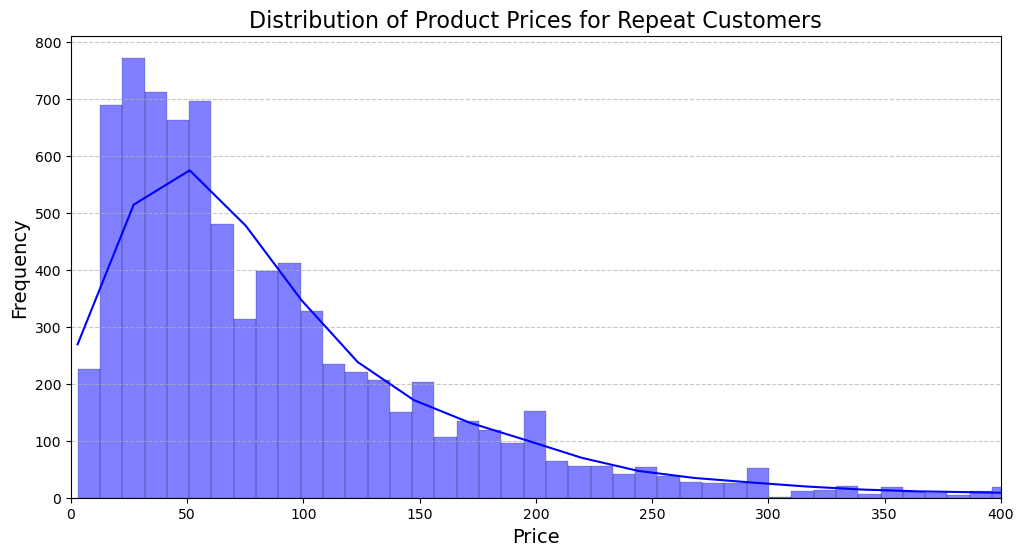

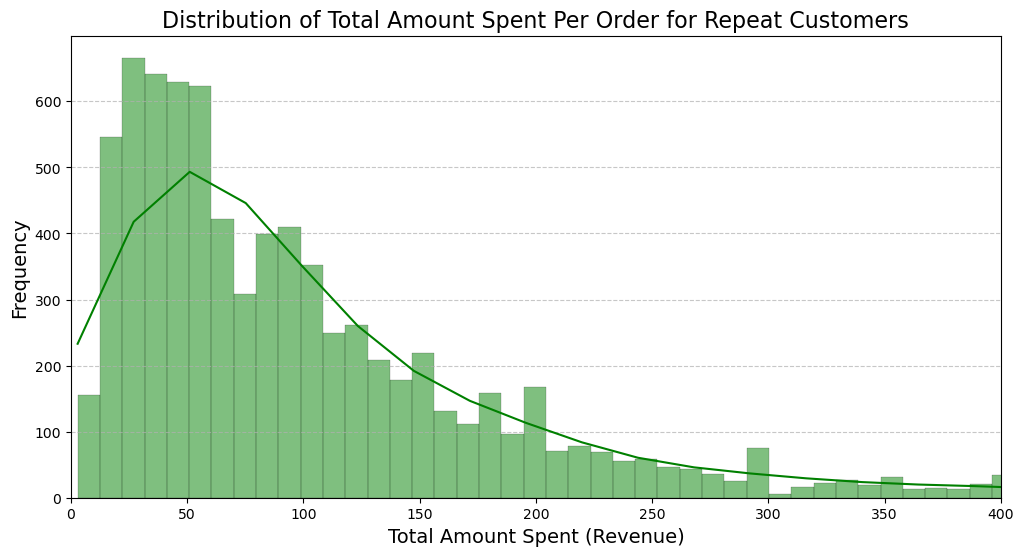

In [494]:
# Limiting the x axis to 400
# Plotting the distribution of the price of products bought by repeating customers
plt.figure(figsize=(12, 6))
sns.histplot(repeat_customers_reviews_orderItems['price'], kde=True, bins=500, color='blue')
plt.title('Distribution of Product Prices for Repeat Customers', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

# Plotting the distribution of the total amount spent per order
plt.figure(figsize=(12, 6))
sns.histplot(repeat_customers_reviews_orderItems['revenue'], kde=True, bins=500, color='green')
plt.title('Distribution of Total Amount Spent Per Order for Repeat Customers', fontsize=16)
plt.xlabel('Total Amount Spent (Revenue)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

### Analysing Payment Methods of Repeat Customers

In [495]:
repeat_customers_payments= repeat_customers.merge(order_payments,  how='inner', on='order_id')
# Checking null values
print(repeat_customers_payments.isna().sum())

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 72
order_delivered_carrier_date     174
order_delivered_customer_date    259
order_estimated_delivery_date      0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
dtype: int64


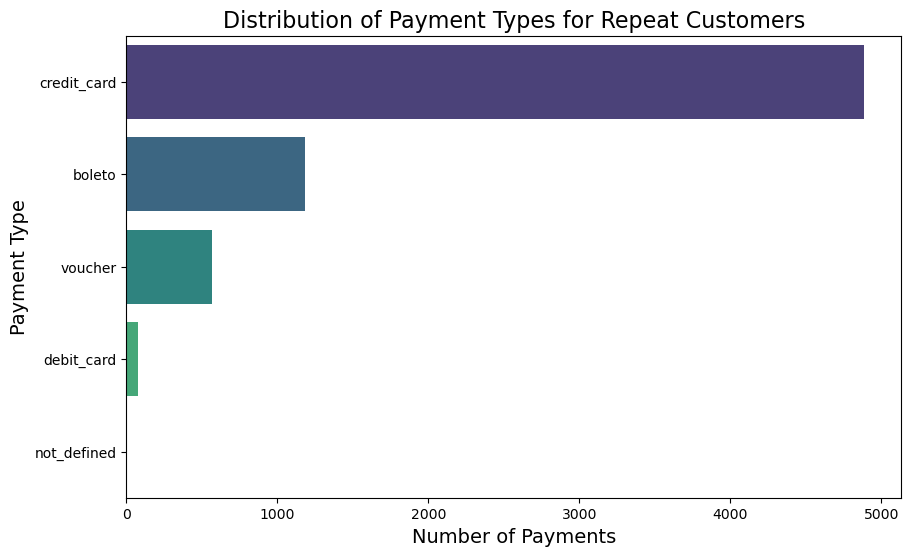

In [496]:
# Count the number of times each payment type appears
payment_type_counts_repeat_customers = repeat_customers_payments["payment_type"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts_repeat_customers.values, y=payment_type_counts_repeat_customers.index, palette="viridis")
plt.title('Distribution of Payment Types for Repeat Customers', fontsize=16)
plt.xlabel('Number of Payments', fontsize=14)
plt.ylabel('Payment Type', fontsize=14)
plt.show()

## Analysing Single Purchase Customers

In [497]:
single_purchase_customers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  \
0                         14409                 franca             SP   
1                          9790  sao bernardo do campo             SP   
2                          1151              sao paulo             SP   
3                          8775        mogi das cruzes             SP   
4                         13056               campinas             SP   
...                         ...                    ...            ...   
99436                      3937              sao paulo             SP   
99437                      6764        taboao da serra             SP   
99438                     60115              fortaleza             CE   
99439                     92120                 canoas             RS   
99440                      6703                  cotia             SP   

                               order_id order_status order_purchase_timestamp  \
0      00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1      29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2      b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3      951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4      6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   
...                                 ...          ...                      ...   
99436  6760e20addcf0121e9d58f2f1ff14298    delivered      2018-04-07 15:48:17   
99437  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered      2018-04-04 08:20:22   
99438  fed4434add09a6f332ea398efd656a5c    delivered      2018-04-08 20:11:50   
99439  e31ec91cea1ecf97797787471f98a8c2    delivered      2017-11-03 21:08:33   
99440  28db69209a75e59f20ccbb5c36a20b90    delivered      2017-12-19 14:27:23   

         order_approved_at order_delivered_carrier_date  \
0      2017-05-16 15:22:12          2017-05-23 10:47:57   
1      2018-01-12 20:58:32          2018-01-15 17:14:59   
2      2018-05-20 16:19:10          2018-06-11 14:31:00   
3      2018-03-13 17:29:19          2018-03-27 23:22:42   
4      2018-07-29 10:10:09          2018-07-30 15:16:00   
...                    ...                          ...   
99436  2018-04-07 16:08:45          2018-04-11 02:08:36   
99437  2018-04-04 08:35:12          2018-04-05 18:42:35   
99438  2018-04-08 20:30:03          2018-04-09 17:52:17   
99439  2017-11-03 21:31:20          2017-11-06 18:24:41   
99440  2017-12-19 18:50:39          2017-12-21 19:17:21   

      order_delivered_customer_date order_estimated_delivery_date  
0               2017-05-25 10:35:35           2017-06-05 00:00:00  
1               2018-01-29 12:41:19           2018-02-06 00:00:00  
2               2018-06-14 17:58:51           2018-06-13 00:00:00  
3               2018-03-28 16:04:25           2018-04-10 00:00:00  
4               2018-08-09 20:55:48           2018-08-15 00:00:00  
...                             ...                           ...  
99436           2018-04-13 20:06:37           2018-04-25 00:00:00  


### Analysing the reviews made by single purchase customers

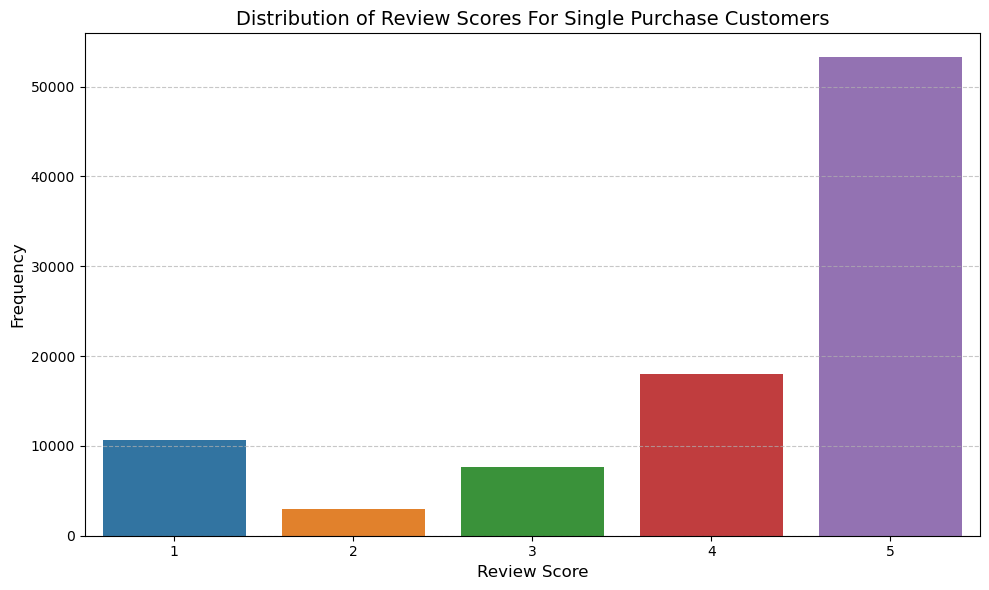

In [498]:
single_purchase_customers_reviews= single_purchase_customers.merge(order_reviews, how='inner', on='order_id')
# Plot the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(data=single_purchase_customers_reviews, x='review_score', order=sorted(single_purchase_customers_reviews['review_score'].unique()))
plt.title('Distribution of Review Scores For Single Purchase Customers', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [499]:
single_purchase_customers_reviews_orderItems = single_purchase_customers_reviews.merge(order_items,  how='inner', on='order_id')
single_purchase_customers_reviews_orderItems_products= single_purchase_customers_reviews_orderItems.merge(products_translated,  how='inner', on='product_id')
single_purchase_customers_reviews_orderItems_products

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
102798  f6c6d3e1e20969a5eed982163f959719  fb354969e06f2093c0083cbfbb91864e   
102799  da37711b17efd5f2539e8196ab215f04  5f2971f9805e3ccb030226e30c8e8390   
102800  184e0c2cfc746789643521df0e9ff904  c64ede6d0ae8901b1b6fb03528c1b7e6   
102801  821a7275a08f32975caceff2e08ea262  046470763123d3d6364f89095b4e47ab   
102802  1ed0c832c2dd99570a59260e71768bdf  82d46759af0369aad49084bacf85a6c3   

        customer_zip_code_prefix        customer_city customer_state  \
0                          14409               franca             SP   
1                          68030             santarem             PA   
2                          68030             santarem             PA   
3                          92480      nova santa rita             RS   
4                          25931                 mage             RJ   
...                          ...                  ...            ...   
102798                      1521            sao paulo             SP   
102799                      4313            sao paulo             SP   
102800                     68660  sao miguel do guama             PA   
102801                      5734            sao paulo             SP   
102802                     37610          bom repouso             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
102798  b2f58affcc178fea2daaf834f1acff5e    delivered   
102799  c8203bb57639618630affac9e8e923dd    delivered   
102800  45b3000bcd10464ac178f32cd783fc83    delivered   
102801  49645a8902c1ba980836b7bff991d69f    delivered   
102802  51c6d2f460589fa7b65f2da51e860206    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2017-11-09 00:50:13  2017-11-10 00:47:48   
2           2017-11-09 00:50:13  2017-11-10 00:47:48   
3           2017-05-07 20:11:26  2017-05-08 22:22:56   
4           2018-02-03 19:45:40  2018-02-04 22:29:19   
...                         ...                  ...   
102798      2018-07-14 14:08:11  2018-07-17 04:31:33   
102799      2017-03-27 23:04:18  2017-03-27 23:23:38   
102800      2017-12-07 23:55:46  2017-12-09 23:50:32   
102801      2018-04-04 17:50:52  2018-04-04 18:08:41   
102802      2017-11-14 12:04:09  2017-11-14 12:15:25   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2017-11-22 01:43:37           2017-11-28 00:09:50   
2               2017-11-22 01:43:37           2017-11-28 00:09:50   
3               2017-05-19 20:16:31           2017-05-26 09:54:04   
4               2018-02-19 18:21:47           2018-02-28 21:09:00   
...                             ...                           ...   
102798          2018-07-25 11:18:00           2018-07-26 19:18:32   
102799          2017-03-28 14:18:59           2017-03-30 17:06:19   
102800          2017-12-11 20:29:02           2018-01-05 17:59:38   
102801          2018-04-05 16:36:49           2018-04-06 23:32:21   
102802          2017-11-27 20:44:47           2017-12-19 19:37:33   

       order_estimated_delivery_date    

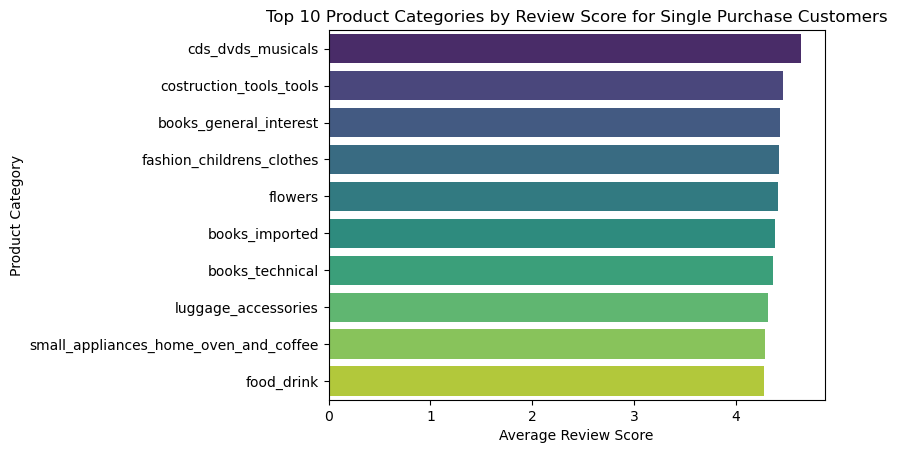

In [500]:
# Finding the product category with the highest review score
# Group by product category name and calculate the average review score for each product category
average_reviews_per_category_single_customers = (
    single_purchase_customers_reviews_orderItems_products.groupby('product_category_name_english')['review_score']
    .mean()
    .sort_values(ascending=False)
)

# Storing the results in a dataframe
average_reviews_per_category_df_single_customers = average_reviews_per_category_single_customers.reset_index()
average_reviews_per_category_df_single_customers.columns = ['product_category_name_english', 'average_review_score']

# Getting the top categories with the highest reviews
top_categories_by_reviews_single_customers = average_reviews_per_category_df_single_customers.head(10)

# Plot
sns.barplot(x='average_review_score', y='product_category_name_english', data=top_categories_by_reviews_single_customers, palette='viridis')
plt.title('Top 10 Product Categories by Review Score for Single Purchase Customers')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

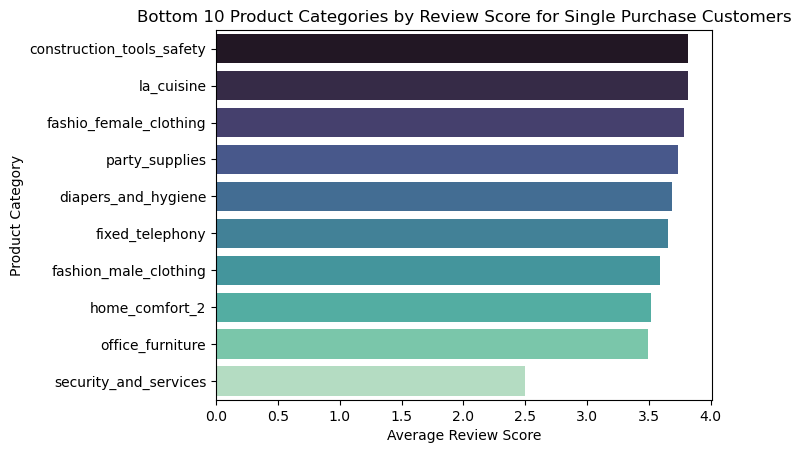

In [501]:
# Getting the bottom categories
bottom_categories_by_reviews_single_customers = average_reviews_per_category_df_single_customers.tail(10)

# Plot
sns.barplot(
    x='average_review_score',
    y='product_category_name_english',
    data=bottom_categories_by_reviews_single_customers,
    palette='mako'
)
plt.title('Bottom 10 Product Categories by Review Score for Single Purchase Customers')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

### Analysing the price of the items bought by single purchase customers and how much they spent per order

### Finding the top and bottom product categories bought by single purchase customers

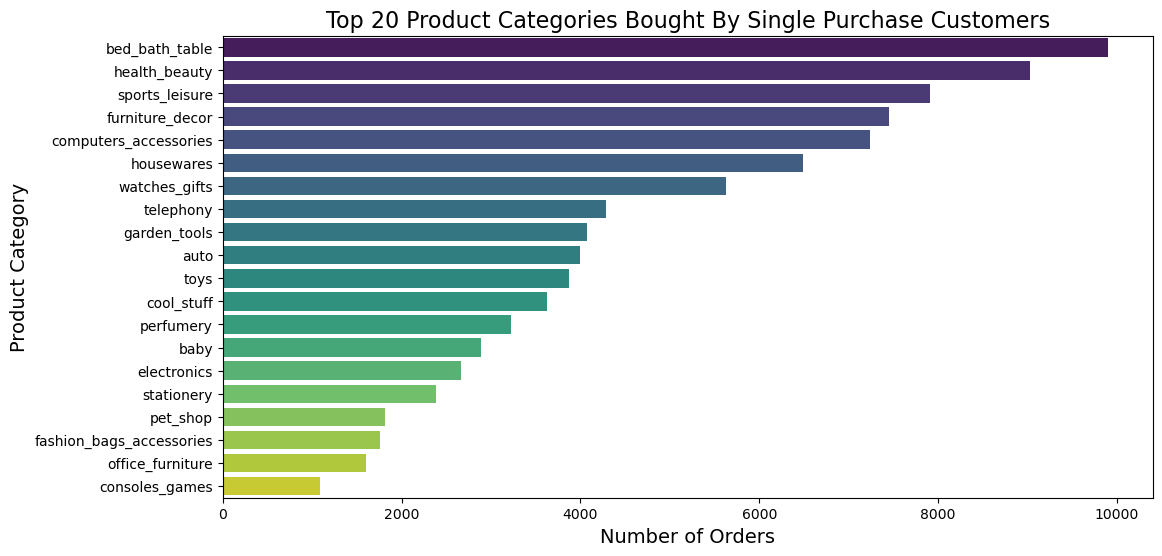

In [502]:
# Distribution of the top product categories
plt.figure(figsize=(12, 6))
product_category_counts_single_customers_top = single_purchase_customers_reviews_orderItems_products['product_category_name_english'].value_counts().head(20) # Top 20 product categories 
sns.barplot(x=product_category_counts_single_customers_top.values, y=product_category_counts_single_customers_top.index, palette="viridis")
plt.title('Top 20 Product Categories Bought By Single Purchase Customers', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

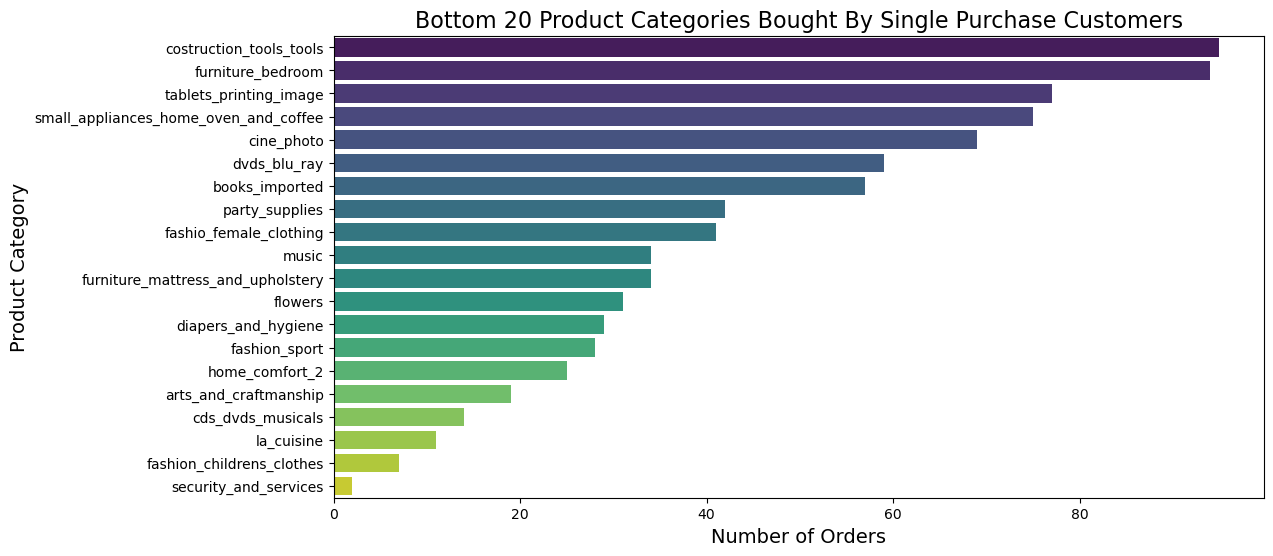

In [503]:
# Distribution of the bottom product categories
plt.figure(figsize=(12, 6))
product_category_counts_single_customers_bottom = single_purchase_customers_reviews_orderItems_products['product_category_name_english'].value_counts().tail(20) # Bottom 20 product categories 
sns.barplot(x=product_category_counts_single_customers_bottom.values, y=product_category_counts_single_customers_bottom.index, palette="viridis")
plt.title('Bottom 20 Product Categories Bought By Single Purchase Customers', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

### Finding the most and least expensive product categories by single purchase customers

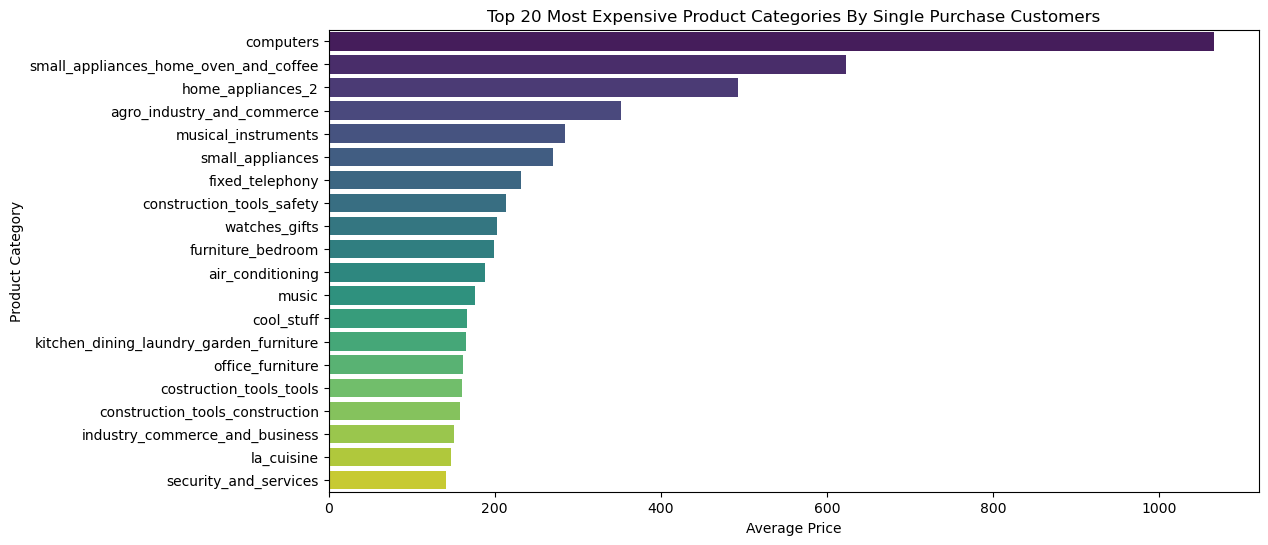

In [504]:
# Calculate the average price per category
avg_price_per_category_single_customers_top = (
    single_purchase_customers_reviews_orderItems_products.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

# Plotting the top 20 most expensive categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_per_category_single_customers_top.values,
    y=avg_price_per_category_single_customers_top.index,
    palette="viridis",
)
plt.title("Top 20 Most Expensive Product Categories By Single Purchase Customers")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()

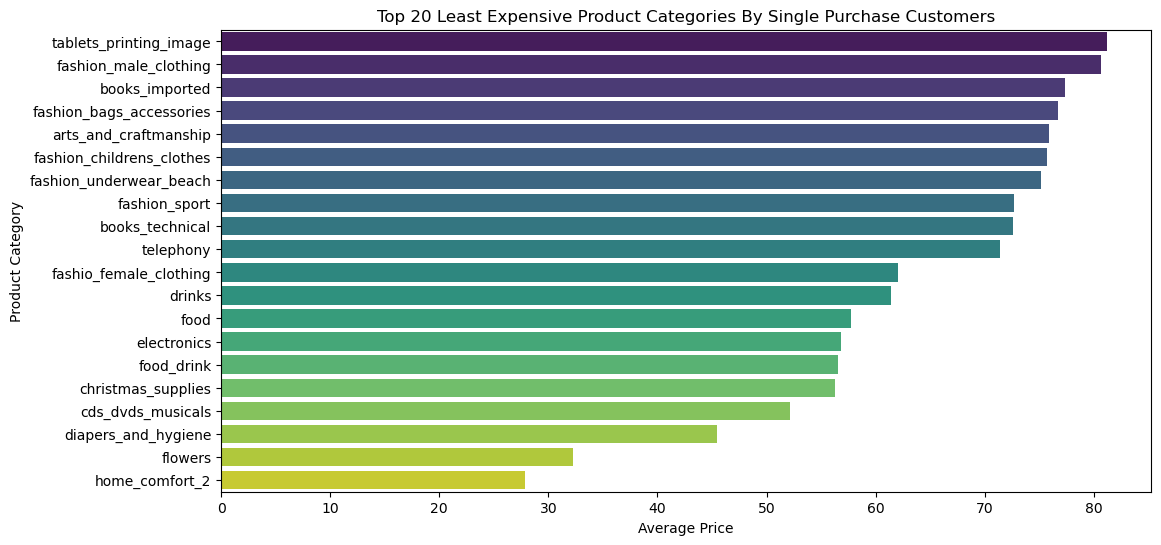

In [505]:
# Calculate the average price per category
avg_price_per_category_single_customers_bottom = (
    single_purchase_customers_reviews_orderItems_products.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .tail(20)
)

# Plotting the top 20 least expensive categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_per_category_single_customers_bottom.values,
    y=avg_price_per_category_single_customers_bottom.index,
    palette="viridis",
)
plt.title("Top 20 Least Expensive Product Categories By Single Purchase Customers")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()

### Finding the top and bottom revenue per product category of single purchase customers

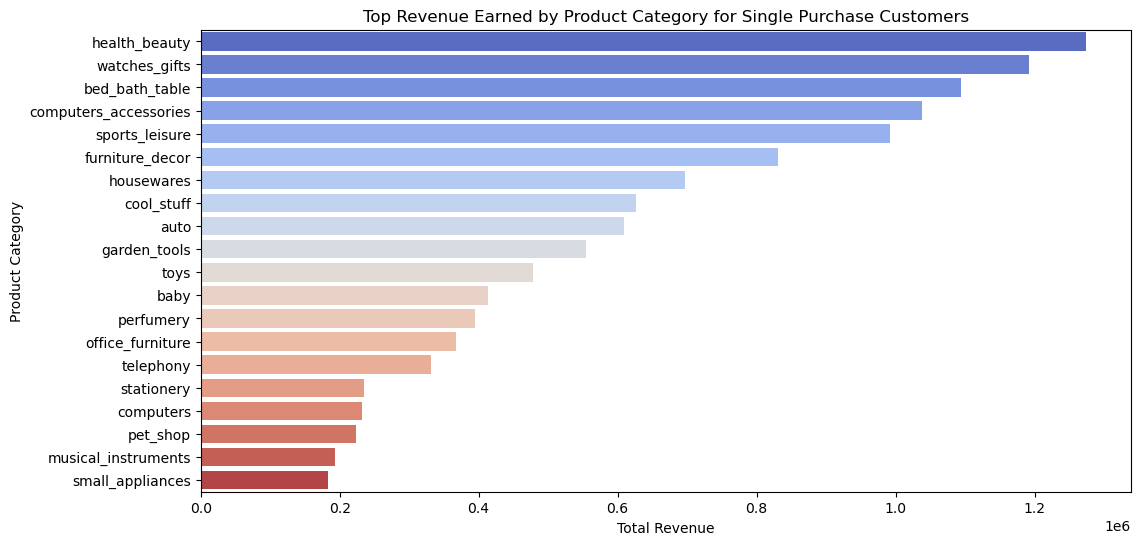

In [506]:
# Creating a revenue column
single_purchase_customers_reviews_orderItems_products['revenue'] = single_purchase_customers_reviews_orderItems_products['order_item_id'] * single_purchase_customers_reviews_orderItems_products['price']
# Find the total revenue per category (top)
revenue_per_category_single_customers_top = single_purchase_customers_reviews_orderItems_products.groupby("product_category_name_english")["revenue"].sum().sort_values(ascending=False).head(20)

# Plotting the top revenue earned by each category
plt.figure(figsize=(12, 6))
sns.barplot(
    x=revenue_per_category_single_customers_top.values,
    y=revenue_per_category_single_customers_top.index,
    palette="coolwarm",
)
plt.title("Top Revenue Earned by Product Category for Single Purchase Customers")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

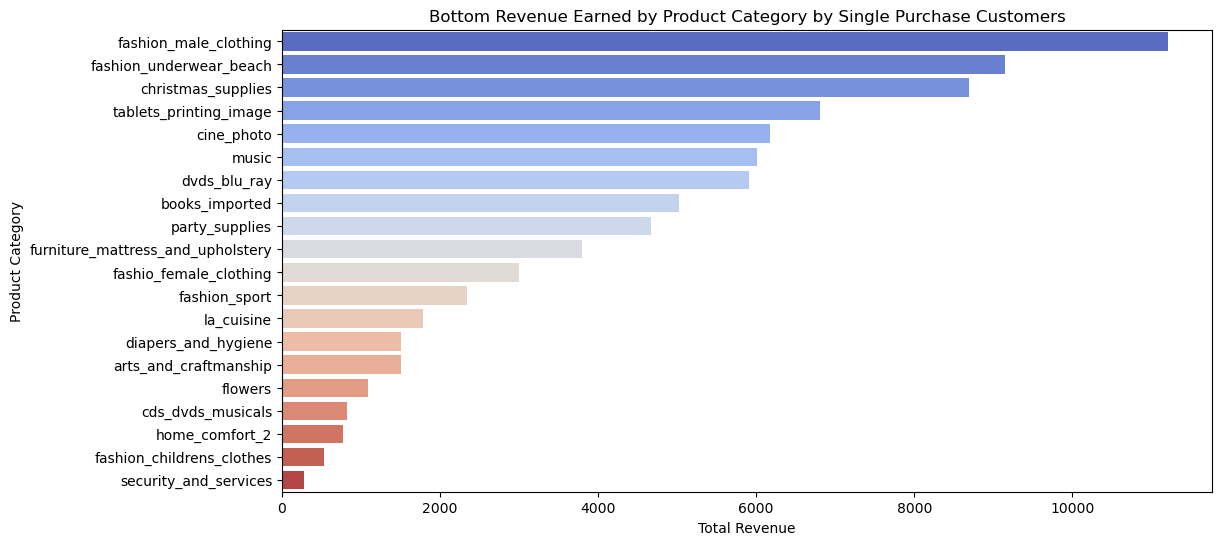

In [507]:
# Find the total revenue per category (bottom)
revenue_per_category_single_customers_bottom = single_purchase_customers_reviews_orderItems_products.groupby("product_category_name_english")["revenue"].sum().sort_values(ascending=False).tail(20)

# Plotting the bottom revenue earned by each category
plt.figure(figsize=(12, 6))
sns.barplot(
    x=revenue_per_category_single_customers_bottom.values,
    y=revenue_per_category_single_customers_bottom.index,
    palette="coolwarm",
)
plt.title("Bottom Revenue Earned by Product Category by Single Purchase Customers")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

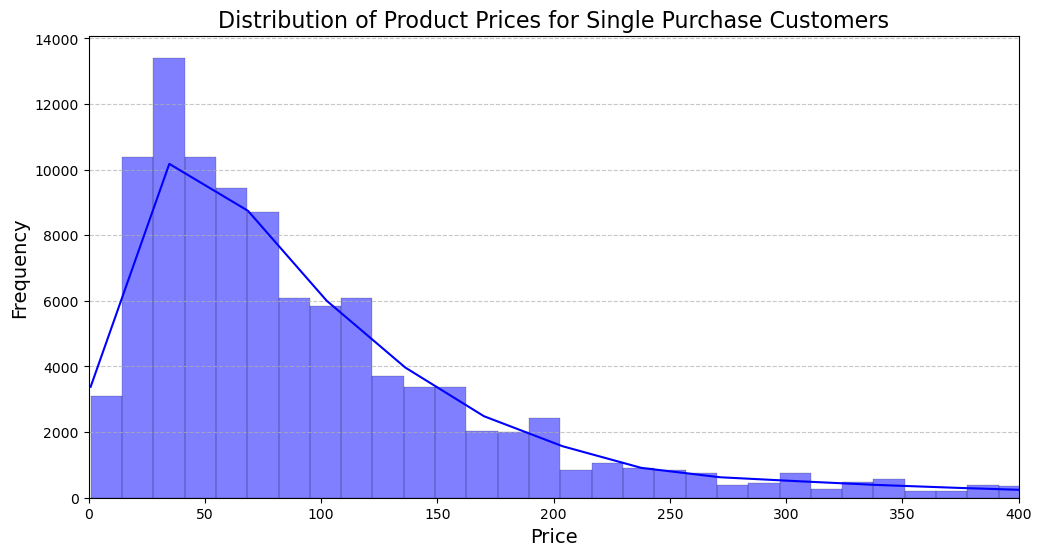

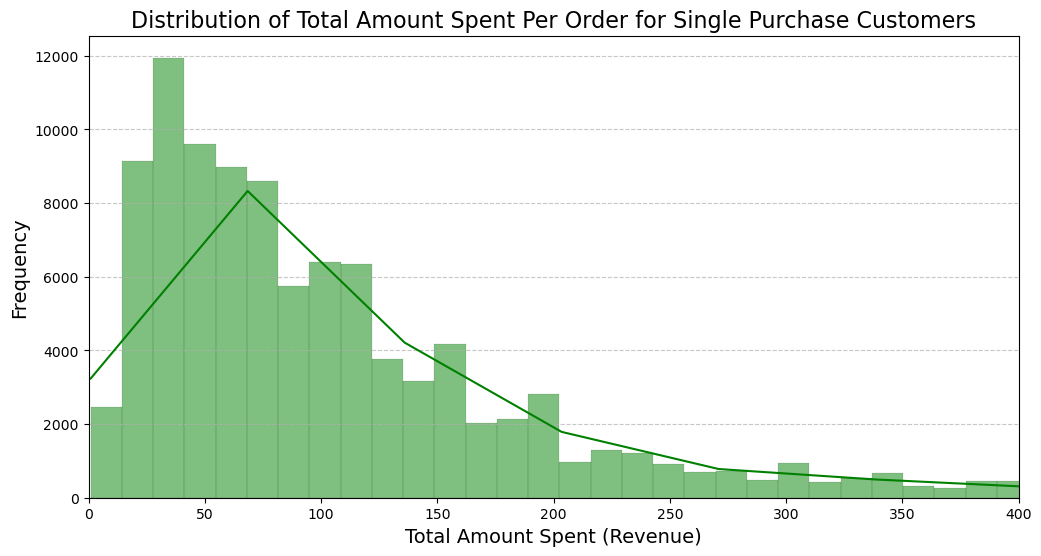

In [508]:
# Limiting the x axis to 400
# Plotting the distribution of the price of products bought by single purchase customers
plt.figure(figsize=(12, 6))
sns.histplot(single_purchase_customers_reviews_orderItems_products['price'], kde=True, bins=500, color='blue')
plt.title('Distribution of Product Prices for Single Purchase Customers', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

# Plotting the distribution of the total amount spent per order
plt.figure(figsize=(12, 6))
sns.histplot(single_purchase_customers_reviews_orderItems_products['revenue'], kde=True, bins=1000, color='green')
plt.title('Distribution of Total Amount Spent Per Order for Single Purchase Customers', fontsize=16)
plt.xlabel('Total Amount Spent (Revenue)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

### Analysing delivery times of single purchase customers

In [509]:
# We see that some courier dates are missing. I will be using courier dates to calculate delivery times as sometimes the customers may not report that they have received the item.
# Removing rows where courier dates are null
single_purchase_customers_reviews_no_missing_carrier_dates = single_purchase_customers_reviews.dropna(subset=['order_delivered_carrier_date'])
# Converting order delivered date and time placed to datetime format
single_purchase_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
    single_purchase_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date']
)
single_purchase_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp'] = pd.to_datetime(
    single_purchase_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp']
)

# Calculating the delivery time
single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'] = (
    single_purchase_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] -
    single_purchase_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp']
).abs()

# Convert the result to days
single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'] = (
    single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'].dt.total_seconds() / 86400
) # 60 * 60 * 24

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\2938713721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_purchase_customers_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\2938713721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_purchase_customers_reviews_no_missing_carrier_dates['order_purchase_timestamp'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\2938713721.py:13: Setting

count    90889.000000
mean         3.224111
std          3.595652
min          0.000278
25%          1.124444
50%          2.196285
75%          4.059097
max        171.212419
Name: delivery_time, dtype: float64


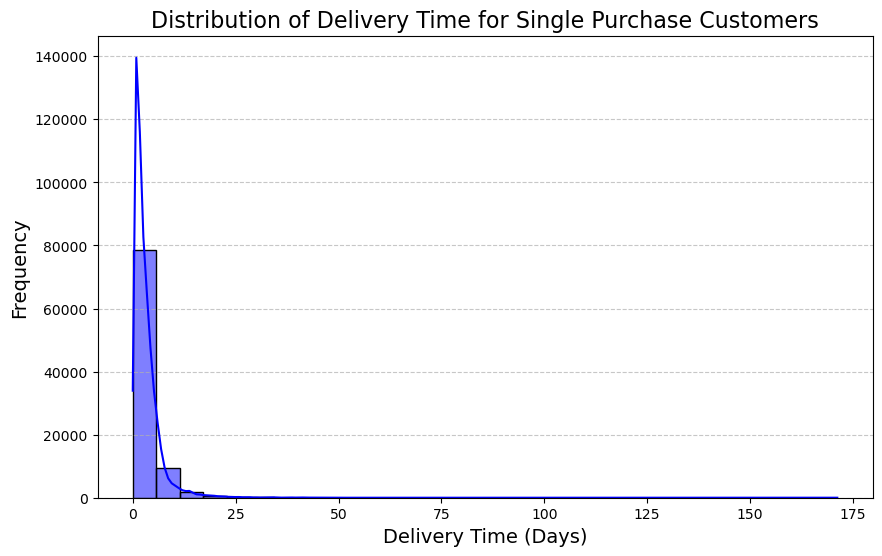

In [510]:
# Calculating the statistics of delivery_time
print(single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'].describe())

# Plot a histogram for delivery_time
plt.figure(figsize=(10, 6))
sns.histplot(single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'], 
             bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time for Single Purchase Customers', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

count    86021.000000
mean         2.603553
std          1.860277
min          0.000278
25%          1.092049
50%          2.089525
75%          3.751655
max          8.459178
Name: delivery_time, dtype: float64


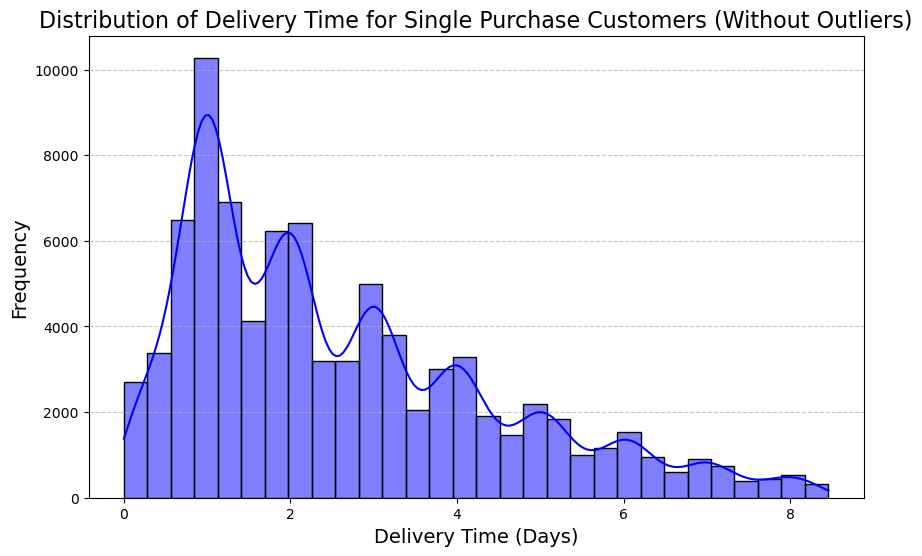

In [511]:
# Find Q1 and Q3
Q1_single_customers = single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'].quantile(0.25)
Q3_single_customers = single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'].quantile(0.75)

# Find the Interquartile Range
IQR_single_customers = Q3_single_customers - Q1_single_customers

# Define bounds for outliers
lower_bound_single_customers = Q1_single_customers - 1.5 * IQR_single_customers
upper_bound_single_customers = Q3_single_customers + 1.5 * IQR_single_customers

# Filter the data to remove outliers
filtered_df_single_customers = single_purchase_customers_reviews_no_missing_carrier_dates[
    (single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'] >= lower_bound_single_customers) &
    (single_purchase_customers_reviews_no_missing_carrier_dates['delivery_time'] <= upper_bound_single_customers)
]
# Calculating the statistics of delivery_time
print(filtered_df_single_customers['delivery_time'].describe())

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_single_customers['delivery_time'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time for Single Purchase Customers (Without Outliers)', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Merging customers_orders_orderItems and order_payments

In [512]:
customers_orders_orderItems_orderPayments= customers_orders_orderItems.merge(order_payments,  how='inner', on='order_id')
customers_orders_orderItems_orderPayments.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00              1   
1           2018-01-29 12:41:19           2018-02-06 00:00:00              1   
2           2018-06-14 17:58:51           2018-06-13 00:00:00              1   
3           2018-03-28 16:04:25           2018-04-10 00:00:00              1   
4           2018-08-09 20:55:48           2018-08-15 00:00:00              1   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-05-22 15:22:12  124.99          21.88                   1   
1  2018-01-18 20:58:32  289.00          46.48                   1   
2  2018-06-05 16:19:10  139.94          17.79                   1   
3  2018-03-27 16:31:16  149.94          23.36                   1   
4  2018-07-31 10:10:09  230.00          22.25                   1   

  payment_type  payment_installments  payment_value  
0  credit_card                     2         146.87  
1  credit_card                     8         335.48  
2  credit_card                     7         157.73  
3  credit_card                     1         173.30  
4  credit_card                     8         252.25

## Obtaining the day of the week the order is placed

In [513]:
# Adding a revenue column
customers_orders_orderItems_orderPayments['revenue'] = customers_orders_orderItems_orderPayments['price'] * customers_orders_orderItems_orderPayments['order_item_id']
customers_orders_orderItems_orderPayments['order_purchase_timestamp']= pd.to_datetime(customers_orders_orderItems_orderPayments['order_purchase_timestamp'])

# Add a new column storing the day of the week
customers_orders_orderItems_orderPayments['day_of_week'] = customers_orders_orderItems_orderPayments['order_purchase_timestamp'].dt.day_name()
customers_orders_orderItems_orderPayments.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  order_item_id  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00              1   
1           2018-01-29 12:41:19           2018-02-06 00:00:00              1   
2           2018-06-14 17:58:51           2018-06-13 00:00:00              1   
3           2018-03-28 16:04:25           2018-04-10 00:00:00              1   
4           2018-08-09 20:55:48           2018-08-15 00:00:00              1   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884   

   shipping_limit_date   price  freight_value  payment_sequential  \
0  2017-05-22 15:22:12  124.99          21.88                   1   
1  2018-01-18 20:58:32  289.00          46.48                   1   
2  2018-06-05 16:19:10  139.94          17.79                   1   
3  2018-03-27 16:31:16  149.94          23.36                   1   
4  2018-07-31 10:10:09  230.00          22.25                   1   

  payment_type  payment_installments  payment_value  revenue day_of_week  
0  credit_card                     2         146.87   124.99     Tuesday  
1  credit_card                     8         335.48   289.00      Friday  
2  credit_card                     7         157.73   139.94    Saturday  
3  credit_card                     1         173.30   149.94     Tuesday  
4  credit_card                     8         252.25   230.00      Sunday

## Finding the distribution of revenue across the days of the week

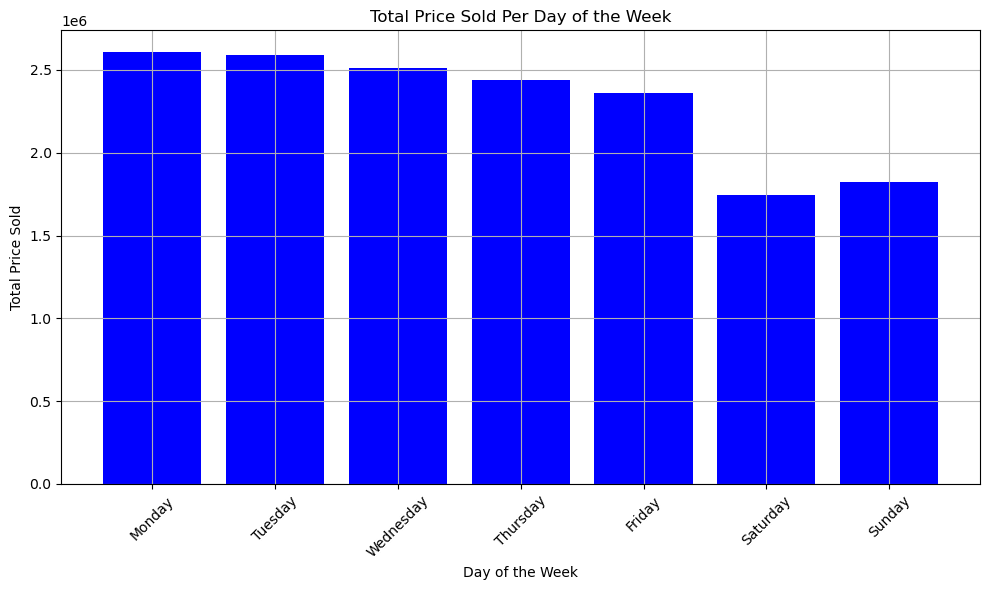

In [514]:
# Ordering the days of the week (otherwise the plot will be confusing because the days do not come out in order)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the day of the week column to a categorical column with a specific order
customers_orders_orderItems_orderPayments['day_of_week'] = pd.Categorical(customers_orders_orderItems_orderPayments['day_of_week'], categories=day_order, ordered=True)

# Groupby day of the week and sum the revenue
total_sales_per_day = customers_orders_orderItems_orderPayments.groupby('day_of_week')['revenue'].sum().reset_index()

# Sort the dataframe
total_sales_per_day = total_sales_per_day.sort_values('day_of_week')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_day['day_of_week'], total_sales_per_day['revenue'], color='b')
plt.title('Total Price Sold Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Price Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

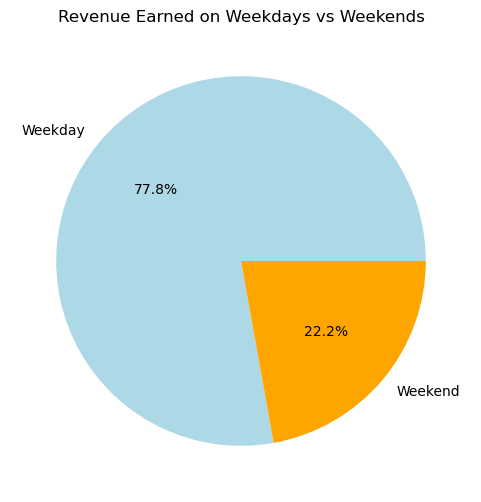

In [515]:
# Create a new column to classify weekend vs weekday
customers_orders_orderItems_orderPayments['weekend_or_weekday'] = customers_orders_orderItems_orderPayments['day_of_week'].apply(lambda x: 'Weekend' if x in ["Saturday", 'Sunday'] else 'Weekday')

# Group by weekend or weekday and sum the revenue
revenue_by_day_type = customers_orders_orderItems_orderPayments.groupby('weekend_or_weekday')['revenue'].sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_by_day_type, labels=revenue_by_day_type.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Revenue Earned on Weekdays vs Weekends')
plt.show()

## Plotting the revenue over time

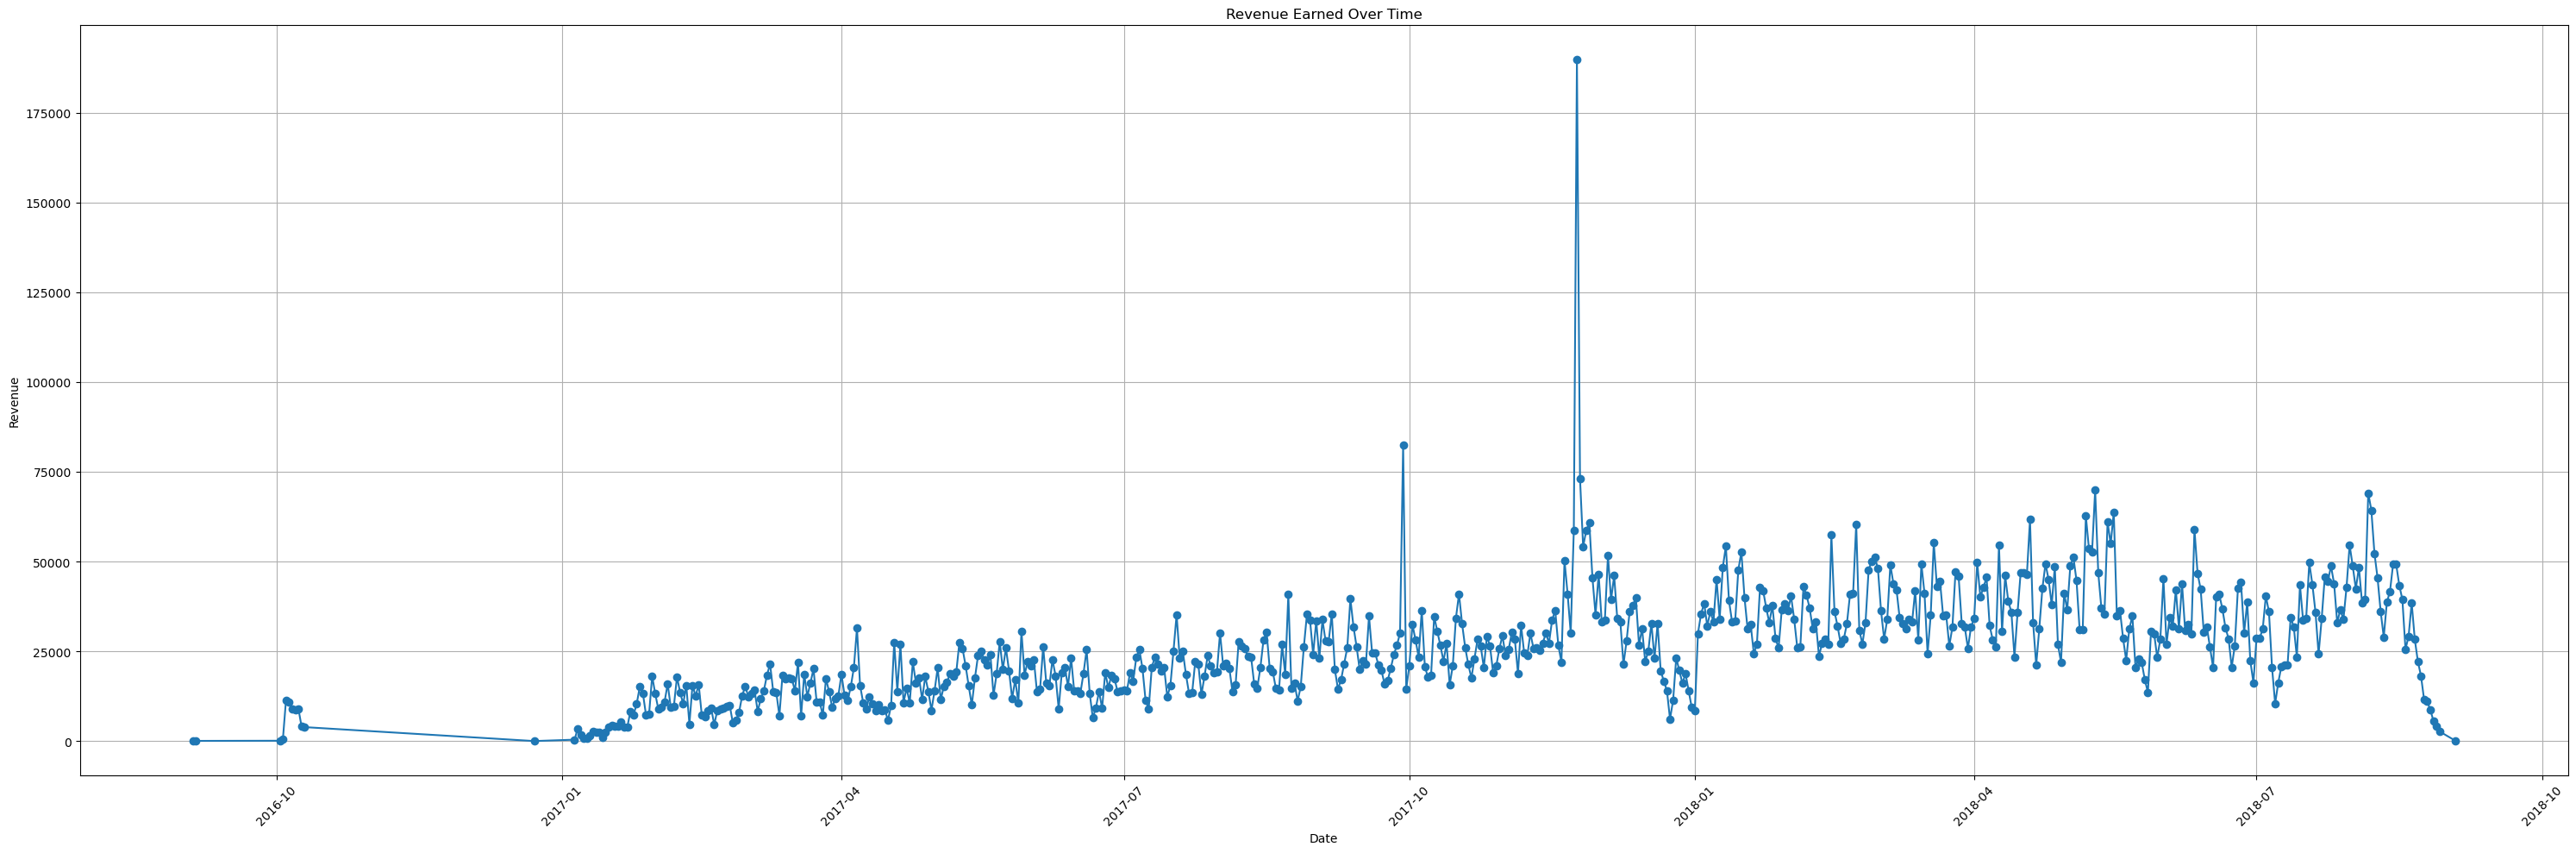

In [516]:
# Extract the date part from order purchase timestamp
customers_orders_orderItems_orderPayments['order_date'] = customers_orders_orderItems_orderPayments['order_purchase_timestamp'].dt.date

# Group by the order_date and sum the revenue for each day
daily_revenue = customers_orders_orderItems_orderPayments.groupby('order_date')['revenue'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(30,10))
plt.plot(daily_revenue['order_date'], daily_revenue['revenue'], marker='o')
plt.title('Revenue Earned Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Finding inactive customers

In [517]:
# Find the latest order purchase timestamp
latest_order = customers_orders_orderItems_orderPayments['order_purchase_timestamp'].max()

print(f"Latest order_purchase_timestamp: {latest_order}")

Latest order_purchase_timestamp: 2018-09-03 09:06:57


The dataset is until 2018. I will classify inactive users as those who never bought anything in the past 6 months or more 

In [518]:
customers_orders['order_purchase_timestamp'] = pd.to_datetime(customers_orders['order_purchase_timestamp'])

# Get the latest order for each customer
latest_orders_per_customer = customers_orders.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()

# 6 months inactivity period
inactivity_period = pd.Timedelta(days=6*30)  # 6 months = 180 days

# Find the cutoff date for inactivity
cutoff_date = pd.to_datetime('2018-09-03 09:06:57') - inactivity_period

# Classify customers as inactive if their latest order is older than the cutoff date
inactive_customers = latest_orders_per_customer[latest_orders_per_customer['order_purchase_timestamp'] < cutoff_date]

# Display the inactive customers
display(inactive_customers)

customer_unique_id order_purchase_timestamp
2      0000f46a3911fa3c0805444483337064      2017-03-10 21:05:03
3      0000f6ccb0745a6a4b88665a16c9f078      2017-10-12 20:29:41
4      0004aac84e0df4da2b147fca70cf8255      2017-11-14 19:45:42
7      00053a61a98854899e70ed204dd4bafe      2018-02-28 11:15:41
8      0005e1862207bf6ccc02e4228effd9a0      2017-03-04 23:32:12
...                                 ...                      ...
96089  fffbf87b7a1a6fa8b03f081c5f51a201      2017-12-27 22:36:41
96091  fffcf5a5ff07b0908bd4e2dbc735a684      2017-06-08 21:00:36
96092  fffea47cd6d3cc0a88bd621562a9d061      2017-12-10 20:07:56
96093  ffff371b4d645b6ecea244b27531430a      2017-02-07 15:49:16
96095  ffffd2657e2aad2907e67c3e9daecbeb      2017-05-02 20:18:45

[58316 rows x 2 columns]

# Finding why the customers became inactive

In [519]:
inactive_customers_df= inactive_customers.drop('order_purchase_timestamp', axis=1).merge(customers_orders,  how='inner', on='customer_unique_id')
inactive_customers_df

customer_unique_id                       customer_id  \
0      0000f46a3911fa3c0805444483337064  9b3932a6253894a02c1df9d19004239f   
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
2      0004aac84e0df4da2b147fca70cf8255  47227568b10f5f58a524a75507e6992c   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
4      0005e1862207bf6ccc02e4228effd9a0  3b37fb626fdf46cd99d37ec62afa88ff   
...                                 ...                               ...   
60177  fffbf87b7a1a6fa8b03f081c5f51a201  ed421f2bf6c0ea955e4ac8a5fe646b94   
60178  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   
60179  fffea47cd6d3cc0a88bd621562a9d061  0ecf8e0a08148af0bf313184f167670a   
60180  ffff371b4d645b6ecea244b27531430a  27f584b0f1dc4e610065c240f68b6be0   
60181  ffffd2657e2aad2907e67c3e9daecbeb  70bc4d9cf2bbeea3f7b09798370f5884   

       customer_zip_code_prefix     customer_city customer_state  \
0                         88115          sao jose             SC   
1                         66812             belem             PA   
2                         18040          sorocaba             SP   
3                         80410          curitiba             PR   
4                         25966       teresopolis             RJ   
...                         ...               ...            ...   
60177                     60055         fortaleza             CE   
60178                     55250           sanharo             PE   
60179                     44054  feira de santana             BA   
60180                     78552             sinop             MT   
60181                     83608       campo largo             PR   

                               order_id order_status order_purchase_timestamp  \
0      b33ec3b699337181488304f362a6b734    delivered      2017-03-10 21:05:03   
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
2      d957021f1127559cd947b62533f484f7    delivered      2017-11-14 19:45:42   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
4      ae76bef74b97bcb0b3e355e60d9a6f9c    delivered      2017-03-04 23:32:12   
...                                 ...          ...                      ...   
60177  64397307c6954ae1ad2ad8e791ad8a31    delivered      2017-12-27 22:36:41   
60178  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   
60179  c71b9252fd7b3b263aaa4cb09319a323    delivered      2017-12-10 20:07:56   
60180  fdc45e6c7555e6cb3cc0daca2557dbe1    delivered      2017-02-07 15:49:16   
60181  f79a35da168301ae56922475da21117b    delivered      2017-05-02 20:18:45   

         order_approved_at order_delivered_carrier_date  \
0      2017-03-10 21:05:03          2017-03-13 12:58:30   
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
2      2017-11-14 20:06:52          2017-11-16 19:52:10   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
4      2017-03-04 23:43:26          2017-03-06 05:14:07   
...                    ...                          ...   
60177  2017-12-27 22:47:44          2018-01-05 00:44:26   
60178  2017-06-08 21:15:16          2017-06-23 13:03:27   
60179  2017-12-10 20:16:20          2017-12-21 16:27:01   
60180  2017-02-07 16:02:44          2017-02-08 10:04:37   
60181  2017-05-03 15:15:13          2017-05-04 12:05:22   

      order_delivered_customer_date order_estimated_delivery_date  
0               2017-04-05 14:38:47           2017-04-07 00:00:00  
1               2017-11-01 21:23:05           2017-11-13 00:00:00  
2               2017-11-27 23:08:56           2017-12-05 00:00:00  
3               2018-03-16 19:02:51           2018-03-26 00:00:00  
4               2017-03-09 08:33:08           2017-04-06 00:00:00  
...                             ...                           ...  
60177           2018-01-15 19:39:13           2018-01-29 00:00:00  
60178           2017-07-06 09:22:00           2017-08

## Plotting inactive customers over time

In [520]:
# Changing to date time format
inactive_customers_df['order_purchase_timestamp'] = pd.to_datetime(inactive_customers_df['order_purchase_timestamp'])

# Add 6 months to the order purchase timestamp to calculate date considered inactive
inactive_customers_df['date_considered_inactive'] = inactive_customers_df['order_purchase_timestamp'] + pd.DateOffset(months=6)

# Showing the updated columns
print(inactive_customers_df[['order_purchase_timestamp', 'date_considered_inactive']].head())

  order_purchase_timestamp date_considered_inactive
0      2017-03-10 21:05:03      2017-09-10 21:05:03
1      2017-10-12 20:29:41      2018-04-12 20:29:41
2      2017-11-14 19:45:42      2018-05-14 19:45:42
3      2018-02-28 11:15:41      2018-08-28 11:15:41
4      2017-03-04 23:32:12      2017-09-04 23:32:12


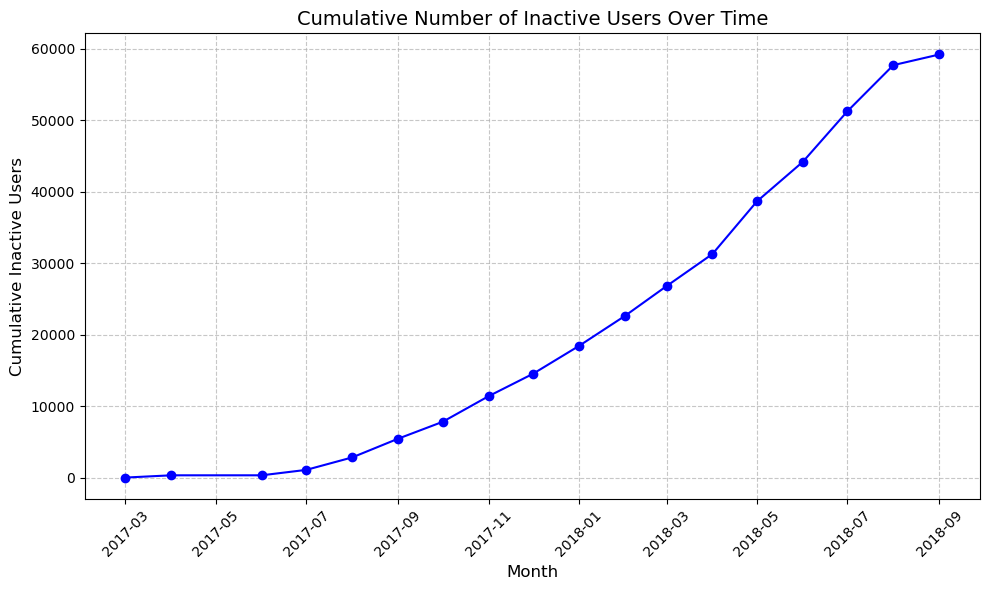

In [521]:
# Extract year and month from the date considered inactive column
inactive_customers_df['inactive_year_month'] = inactive_customers_df['date_considered_inactive'].dt.to_period('M')

# Count unique customer IDs per inactive month
inactive_users = inactive_customers_df.groupby('inactive_year_month')['customer_unique_id'].nunique().cumsum()

# Convert the period index to a regular datetime for plotting
inactive_users.index = inactive_users.index.to_timestamp()

# Plot the increase in number of inactive users over time
plt.figure(figsize=(10, 6))
plt.plot(inactive_users.index, inactive_users.values, marker='o', linestyle='-', color='blue')
plt.title('Cumulative Number of Inactive Users Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Inactive Users', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

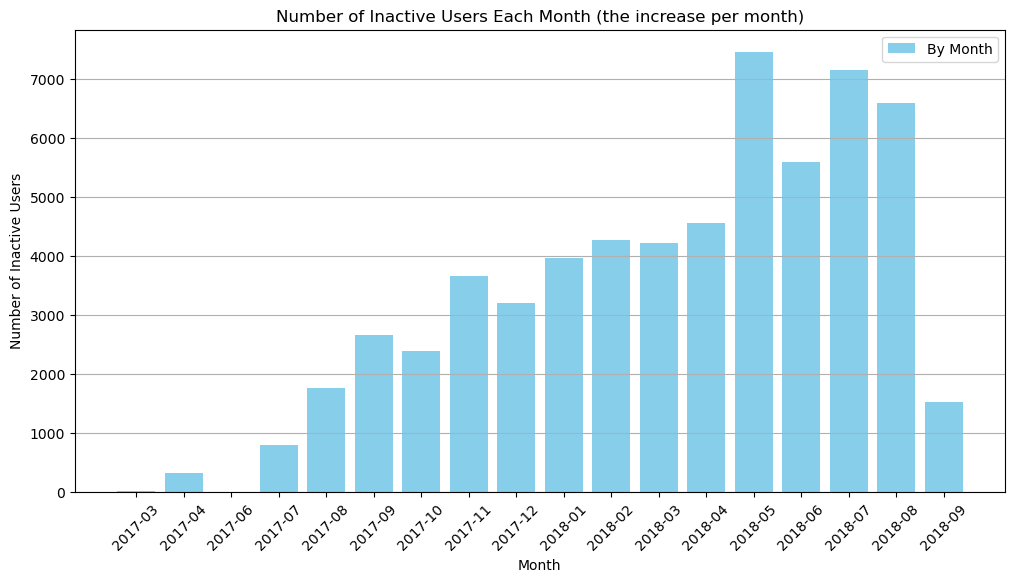

In [522]:
# Extract the day and month for analysis
inactive_customers_df['inactive_month'] = inactive_customers_df['date_considered_inactive'].dt.to_period('M')

# Count the number of inactive users by month
inactive_users_by_month = inactive_customers_df.groupby('inactive_month').size()

# Plot the number of inactive users by month
plt.figure(figsize=(12, 6))
plt.bar(inactive_users_by_month.index.astype(str), inactive_users_by_month.values, color='skyblue', label='By Month')
plt.xlabel('Month')
plt.ylabel('Number of Inactive Users')
plt.title('Number of Inactive Users Each Month (the increase per month)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

## Analysing their reviews

In [523]:
inactive_customers_df_reviews = inactive_customers_df.merge(order_reviews,  how='inner', on='order_id')
inactive_customers_df_reviews

customer_unique_id                       customer_id  \
0      0000f46a3911fa3c0805444483337064  9b3932a6253894a02c1df9d19004239f   
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
2      0004aac84e0df4da2b147fca70cf8255  47227568b10f5f58a524a75507e6992c   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
4      0005e1862207bf6ccc02e4228effd9a0  3b37fb626fdf46cd99d37ec62afa88ff   
...                                 ...                               ...   
60112  fffbf87b7a1a6fa8b03f081c5f51a201  ed421f2bf6c0ea955e4ac8a5fe646b94   
60113  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   
60114  fffea47cd6d3cc0a88bd621562a9d061  0ecf8e0a08148af0bf313184f167670a   
60115  ffff371b4d645b6ecea244b27531430a  27f584b0f1dc4e610065c240f68b6be0   
60116  ffffd2657e2aad2907e67c3e9daecbeb  70bc4d9cf2bbeea3f7b09798370f5884   

       customer_zip_code_prefix     customer_city customer_state  \
0                         88115          sao jose             SC   
1                         66812             belem             PA   
2                         18040          sorocaba             SP   
3                         80410          curitiba             PR   
4                         25966       teresopolis             RJ   
...                         ...               ...            ...   
60112                     60055         fortaleza             CE   
60113                     55250           sanharo             PE   
60114                     44054  feira de santana             BA   
60115                     78552             sinop             MT   
60116                     83608       campo largo             PR   

                               order_id order_status order_purchase_timestamp  \
0      b33ec3b699337181488304f362a6b734    delivered      2017-03-10 21:05:03   
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
2      d957021f1127559cd947b62533f484f7    delivered      2017-11-14 19:45:42   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
4      ae76bef74b97bcb0b3e355e60d9a6f9c    delivered      2017-03-04 23:32:12   
...                                 ...          ...                      ...   
60112  64397307c6954ae1ad2ad8e791ad8a31    delivered      2017-12-27 22:36:41   
60113  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   
60114  c71b9252fd7b3b263aaa4cb09319a323    delivered      2017-12-10 20:07:56   
60115  fdc45e6c7555e6cb3cc0daca2557dbe1    delivered      2017-02-07 15:49:16   
60116  f79a35da168301ae56922475da21117b    delivered      2017-05-02 20:18:45   

         order_approved_at order_delivered_carrier_date  \
0      2017-03-10 21:05:03          2017-03-13 12:58:30   
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
2      2017-11-14 20:06:52          2017-11-16 19:52:10   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
4      2017-03-04 23:43:26          2017-03-06 05:14:07   
...                    ...                          ...   
60112  2017-12-27 22:47:44          2018-01-05 00:44:26   
60113  2017-06-08 21:15:16          2017-06-23 13:03:27   
60114  2017-12-10 20:16:20          2017-12-21 16:27:01   
60115  2017-02-07 16:02:44          2017-02-08 10:04:37   
60116  2017-05-03 15:15:13          2017-05-04 12:05:22   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-04-05 14:38:47           2017-04-07 00:00:00   
1               2017-11-01 21:23:05           2017-11-13 00:00:00   
2               2017-11-27 23:08:56           2017-12-05 00:00:00   
3               2018-03-16 19:02:51           2018-03-26 00:00:00   
4               2017-03-09 08:33:08           2017-04-06 00:00:00   
...                             ...                           ...   
60112           2018-01-15 19:39:13           2018-01-29 00:00:00   
60113           2017-07-06 09:22:00          

In [524]:
# Checking null values
displaying_null_values(inactive_customers_df_reviews)

Total Rows: 60117, Total Columns: 21
                               Null Count  Null Percentage (%)
customer_unique_id                      0             0.000000
customer_id                             0             0.000000
customer_zip_code_prefix                0             0.000000
customer_city                           0             0.000000
customer_state                          0             0.000000
order_id                                0             0.000000
order_status                            0             0.000000
order_purchase_timestamp                0             0.000000
order_approved_at                      82             0.136401
order_delivered_carrier_date         1350             2.245621
order_delivered_customer_date        2061             3.428315
order_estimated_delivery_date           0             0.000000
date_considered_inactive                0             0.000000
inactive_year_month                     0             0.000000
inactive_month    

In [525]:
# Check for duplicate rows
duplicates = inactive_customers_df_reviews[inactive_customers_df_reviews.duplicated()]
print(duplicates)

# Count the total number of duplicate rows
print(f"Total duplicate rows: {duplicates.shape[0]}")

Empty DataFrame
Columns: [customer_unique_id, customer_id, customer_zip_code_prefix, customer_city, customer_state, order_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, date_considered_inactive, inactive_year_month, inactive_month, review_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp]
Index: []
Total duplicate rows: 0


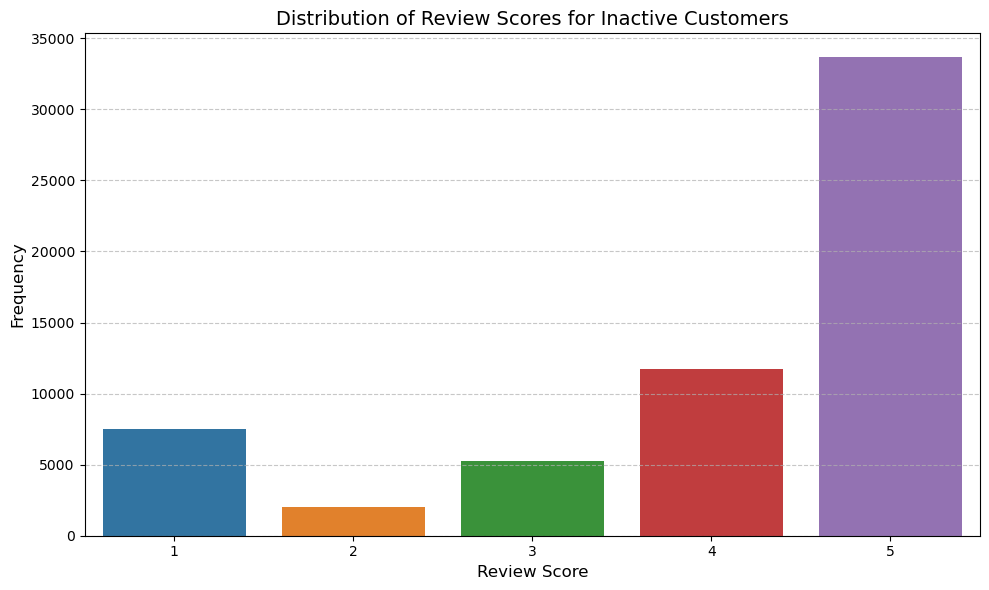

In [526]:
# Plot the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(data=inactive_customers_df_reviews, x='review_score', order=sorted(inactive_customers_df_reviews['review_score'].unique()))
plt.title('Distribution of Review Scores for Inactive Customers', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that most of the reviews are positive (4 or 5). Hence the reason for leaving may not be due to the review of the product

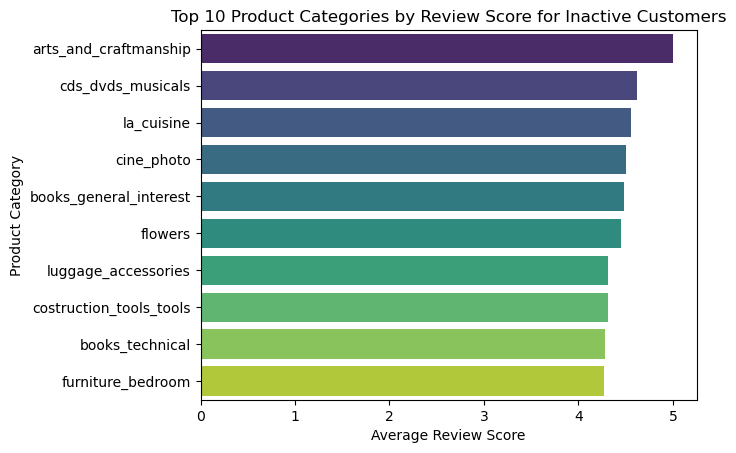

In [527]:
inactive_customers_df_reviews_orderItems = inactive_customers_df_reviews.merge(order_items,  how='inner', on='order_id')
inactive_customers_df_reviews_orderItems_products= inactive_customers_df_reviews_orderItems.merge(products_translated,  how='inner', on='product_id')

# Finding the product category with the highest review score
# Group by product category name and calculate the average review score for each product category
average_reviews_per_category_inactive_customers = (
    inactive_customers_df_reviews_orderItems_products.groupby('product_category_name_english')['review_score']
    .mean()
    .sort_values(ascending=False)
)

# Convert the result to a DataFrame
average_reviews_per_category_df_inactive_customers = average_reviews_per_category_inactive_customers.reset_index()
average_reviews_per_category_df_inactive_customers.columns = ['product_category_name_english', 'average_review_score']

# Getting the top categories with the highest reviews
top_categories_by_reviews_inactive_customers_top = average_reviews_per_category_df_inactive_customers.head(10)

# Plot
sns.barplot(x='average_review_score', y='product_category_name_english', data=top_categories_by_reviews_inactive_customers_top, palette='viridis')
plt.title('Top 10 Product Categories by Review Score for Inactive Customers')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

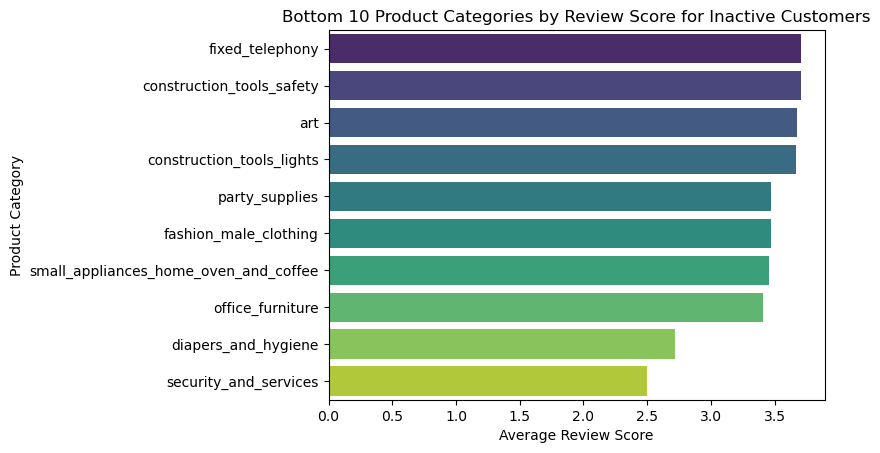

In [528]:
# Getting the top categories with the highest reviews
bottom_categories_by_reviews_inactive_customers = average_reviews_per_category_df_inactive_customers.tail(10)

# Plot
sns.barplot(x='average_review_score', y='product_category_name_english', data=bottom_categories_by_reviews_inactive_customers, palette='viridis')
plt.title('Bottom 10 Product Categories by Review Score for Inactive Customers')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

### Review sentiment analysis

In [529]:
inactive_customers_df_reviews_no_missing_review_content = inactive_customers_df_reviews.dropna(subset=['review_comment_message'])
inactive_customers_df_reviews_no_missing_review_content

customer_unique_id                       customer_id  \
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
5      0006fdc98a402fceb4eb0ee528f6a8d4  2f29573c8cac5a7be11c5b649078f944   
9      000bfa1d2f1a41876493be685390d6d3  e36917a47d5bf39bd3f38bcafb3d438f   
10     000c8bdb58a29e7115cfc257230fb21b  0e114b02a45c9876080f3a9a19f51c16   
...                                 ...                               ...   
60103  ffeefd086fc667aaf6595c8fe3d22d54  df72728563c0a348eed0e450e9e8c2b7   
60104  ffef0ffa736c7b3d9af741611089729b  a90468e2c3a73422673411b52aaa8426   
60105  fff1afc79f6b5db1e235a4a6c30ceda7  188cdfdd194fa16a5da42a7fac3fcd55   
60106  fff1bdd5c5e37ca79dd74deeb91aa5b6  ed369d5d0e1850f096e478def9027961   
60108  fff699c184bcc967d62fa2c6171765f7  5e3e1f4586f475c893bb9b464e0f198d   

       customer_zip_code_prefix   customer_city customer_state  \
1                         66812           belem             PA   
3                         80410        curitiba             PR   
5                         29400   mimoso do sul             ES   
9                         11095          santos             SP   
10                        31555  belo horizonte             MG   
...                         ...             ...            ...   
60103                     26445          japeri             RJ   
60104                     29830    nova venecia             ES   
60105                     99700         erechim             RS   
60106                     77824       araguaina             TO   
60108                     11020          santos             SP   

                               order_id order_status order_purchase_timestamp  \
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
5      6681163e3dab91c549952b2845b20281    delivered      2017-07-18 09:23:10   
9      fd61441ba2a7b57e6342862e779b10b0    delivered      2017-09-29 14:46:58   
10     34801c59d6ec5c5e89bfefb6ebef314d    delivered      2017-12-12 22:53:35   
...                                 ...          ...                      ...   
60103  f9a6aec1708cd20b564a6b2a29ed2290    delivered      2017-09-27 07:26:22   
60104  c8126206d94637a4e63af00f4181a14d    delivered      2017-05-29 22:07:05   
60105  b718c913ccd27c35fdeb6c29770e0ea5    delivered      2017-08-30 23:38:43   
60106  f5691c2b1ca263490374d13d020bd950    delivered      2018-02-24 17:38:14   
60108  82919647c77d6bdf1f3edba9eab8e1fe    delivered      2017-09-01 17:06:54   

         order_approved_at order_delivered_carrier_date  \
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
5      2017-07-18 09:30:22          2017-07-21 16:13:08   
9      2017-09-29 15:04:28          2017-09-29 20:33:31   
10     2017-12-12 23:42:29          2017-12-15 14:04:54   
...                    ...                          ...   
60103  2017-09-27 07:49:07          2017-10-04 17:38:26   
60104  2017-05-29 22:22:33          2017-05-31 12:04:00   
60105  2017-08-30 23:55:11          2017-09-01 15:15:47   
60106  2018-02-24 17:50:26          2018-02-27 17:52:31   
60108  2017-09-05 04:30:47          2017-09-06 19:54:56   

      order_delivered_customer_date order_estimated_delivery_date  \
1               2017-11-01 21:23:05           2017-11-13 00:00:00   
3               2018-03-16 19:02:51           2018-03-26 00:00:00   
5               2017-08-03 18:42:49           2017-08-15 00:00:00   
9               2017-10-13 13:50:07           2017-10-26 00:00:00   
10              2017-12-27 01:37:12           2018-01-05 00:00:00   
...                             ...                           ...   
60103           2017-10-09 18:52:57           2017-10-17 00:00:00   
60104           2017-06-07 14:41:37           2017-06-29 00:00:00   


In [530]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment
def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment["compound"], sentiment["pos"], sentiment["neu"], sentiment["neg"]

# Apply the function and store results
inactive_customers_df_reviews_no_missing_review_content[["sentiment_score", "positive", "neutral", "negative"]] = inactive_customers_df_reviews_no_missing_review_content["review_comment_message"].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

inactive_customers_df_reviews_no_missing_review_content["sentiment_category"] = inactive_customers_df_reviews_no_missing_review_content["sentiment_score"].apply(classify_sentiment)
inactive_customers_df_reviews_no_missing_review_content

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\3328285568.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_customers_df_reviews_no_missing_review_content[["sentiment_score", "positive", "neutral", "negative"]] = inactive_customers_df_reviews_no_missing_review_content["review_comment_message"].apply(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\3328285568.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

customer_unique_id                       customer_id  \
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
5      0006fdc98a402fceb4eb0ee528f6a8d4  2f29573c8cac5a7be11c5b649078f944   
9      000bfa1d2f1a41876493be685390d6d3  e36917a47d5bf39bd3f38bcafb3d438f   
10     000c8bdb58a29e7115cfc257230fb21b  0e114b02a45c9876080f3a9a19f51c16   
...                                 ...                               ...   
60103  ffeefd086fc667aaf6595c8fe3d22d54  df72728563c0a348eed0e450e9e8c2b7   
60104  ffef0ffa736c7b3d9af741611089729b  a90468e2c3a73422673411b52aaa8426   
60105  fff1afc79f6b5db1e235a4a6c30ceda7  188cdfdd194fa16a5da42a7fac3fcd55   
60106  fff1bdd5c5e37ca79dd74deeb91aa5b6  ed369d5d0e1850f096e478def9027961   
60108  fff699c184bcc967d62fa2c6171765f7  5e3e1f4586f475c893bb9b464e0f198d   

       customer_zip_code_prefix   customer_city customer_state  \
1                         66812           belem             PA   
3                         80410        curitiba             PR   
5                         29400   mimoso do sul             ES   
9                         11095          santos             SP   
10                        31555  belo horizonte             MG   
...                         ...             ...            ...   
60103                     26445          japeri             RJ   
60104                     29830    nova venecia             ES   
60105                     99700         erechim             RS   
60106                     77824       araguaina             TO   
60108                     11020          santos             SP   

                               order_id order_status order_purchase_timestamp  \
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
5      6681163e3dab91c549952b2845b20281    delivered      2017-07-18 09:23:10   
9      fd61441ba2a7b57e6342862e779b10b0    delivered      2017-09-29 14:46:58   
10     34801c59d6ec5c5e89bfefb6ebef314d    delivered      2017-12-12 22:53:35   
...                                 ...          ...                      ...   
60103  f9a6aec1708cd20b564a6b2a29ed2290    delivered      2017-09-27 07:26:22   
60104  c8126206d94637a4e63af00f4181a14d    delivered      2017-05-29 22:07:05   
60105  b718c913ccd27c35fdeb6c29770e0ea5    delivered      2017-08-30 23:38:43   
60106  f5691c2b1ca263490374d13d020bd950    delivered      2018-02-24 17:38:14   
60108  82919647c77d6bdf1f3edba9eab8e1fe    delivered      2017-09-01 17:06:54   

         order_approved_at order_delivered_carrier_date  \
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
5      2017-07-18 09:30:22          2017-07-21 16:13:08   
9      2017-09-29 15:04:28          2017-09-29 20:33:31   
10     2017-12-12 23:42:29          2017-12-15 14:04:54   
...                    ...                          ...   
60103  2017-09-27 07:49:07          2017-10-04 17:38:26   
60104  2017-05-29 22:22:33          2017-05-31 12:04:00   
60105  2017-08-30 23:55:11          2017-09-01 15:15:47   
60106  2018-02-24 17:50:26          2018-02-27 17:52:31   
60108  2017-09-05 04:30:47          2017-09-06 19:54:56   

      order_delivered_customer_date order_estimated_delivery_date  \
1               2017-11-01 21:23:05           2017-11-13 00:00:00   
3               2018-03-16 19:02:51           2018-03-26 00:00:00   
5               2017-08-03 18:42:49           2017-08-15 00:00:00   
9               2017-10-13 13:50:07           2017-10-26 00:00:00   
10              2017-12-27 01:37:12           2018-01-05 00:00:00   
...                             ...                           ...   
60103           2017-10-09 18:52:57           2017-10-17 00:00:00   
60104           2017-06-07 14:41:37           2017-06-29 00:00:00   


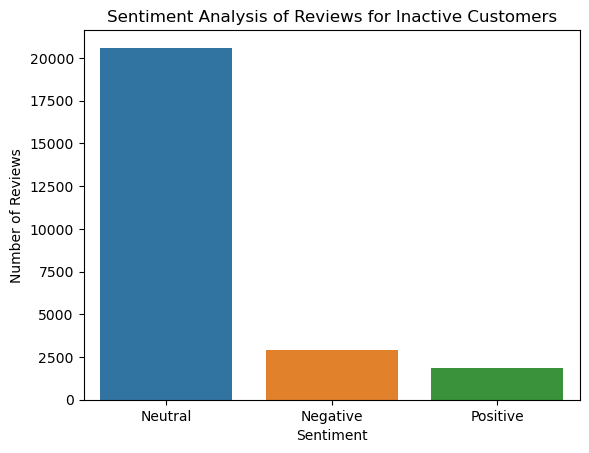

In [531]:
# Count of each sentiment category
sentiment_counts_inactive_customers = inactive_customers_df_reviews_no_missing_review_content["sentiment_category"].value_counts()

# Plot
sns.barplot(x=sentiment_counts_inactive_customers.index, y=sentiment_counts_inactive_customers.values)
plt.title("Sentiment Analysis of Reviews for Inactive Customers")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

There are more negative comments than positive comments. This shows that if customers are unsatisfied, they are more likely to write in the review. This however, does not mean that most of the reviews are negative, as from the previous observation, most reviews score 4 or 5

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


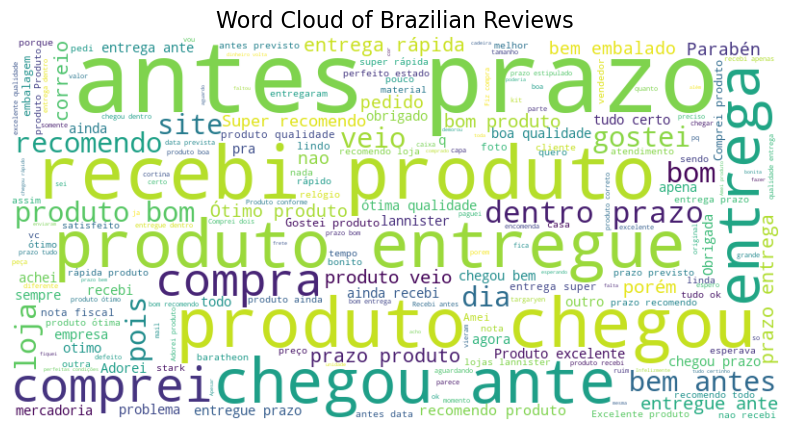

In [532]:
# Download Portuguese stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("portuguese"))

# Combining all the reviews together
all_reviews_inactive_customers = " ".join(inactive_customers_df_reviews_no_missing_review_content["review_comment_message"])

# Removing stopwords
filtered_words_inactive_customers = " ".join([word for word in all_reviews_inactive_customers.split() if word.lower() not in stop_words])

# Word cloud
wordcloud_inactive_customers = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    colormap="viridis", 
    stopwords=stop_words
).generate(filtered_words_inactive_customers)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inactive_customers, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Brazilian Reviews", fontsize=16)
plt.show()


## Analysing delivery times

In [533]:
# Removing rows where courier dates are null
inactive_customers_df_reviews_no_missing_carrier_dates = inactive_customers_df_reviews.dropna(subset=['order_delivered_carrier_date'])
inactive_customers_df_reviews_no_missing_carrier_dates

customer_unique_id                       customer_id  \
0      0000f46a3911fa3c0805444483337064  9b3932a6253894a02c1df9d19004239f   
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
2      0004aac84e0df4da2b147fca70cf8255  47227568b10f5f58a524a75507e6992c   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
4      0005e1862207bf6ccc02e4228effd9a0  3b37fb626fdf46cd99d37ec62afa88ff   
...                                 ...                               ...   
60112  fffbf87b7a1a6fa8b03f081c5f51a201  ed421f2bf6c0ea955e4ac8a5fe646b94   
60113  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   
60114  fffea47cd6d3cc0a88bd621562a9d061  0ecf8e0a08148af0bf313184f167670a   
60115  ffff371b4d645b6ecea244b27531430a  27f584b0f1dc4e610065c240f68b6be0   
60116  ffffd2657e2aad2907e67c3e9daecbeb  70bc4d9cf2bbeea3f7b09798370f5884   

       customer_zip_code_prefix     customer_city customer_state  \
0                         88115          sao jose             SC   
1                         66812             belem             PA   
2                         18040          sorocaba             SP   
3                         80410          curitiba             PR   
4                         25966       teresopolis             RJ   
...                         ...               ...            ...   
60112                     60055         fortaleza             CE   
60113                     55250           sanharo             PE   
60114                     44054  feira de santana             BA   
60115                     78552             sinop             MT   
60116                     83608       campo largo             PR   

                               order_id order_status order_purchase_timestamp  \
0      b33ec3b699337181488304f362a6b734    delivered      2017-03-10 21:05:03   
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
2      d957021f1127559cd947b62533f484f7    delivered      2017-11-14 19:45:42   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
4      ae76bef74b97bcb0b3e355e60d9a6f9c    delivered      2017-03-04 23:32:12   
...                                 ...          ...                      ...   
60112  64397307c6954ae1ad2ad8e791ad8a31    delivered      2017-12-27 22:36:41   
60113  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   
60114  c71b9252fd7b3b263aaa4cb09319a323    delivered      2017-12-10 20:07:56   
60115  fdc45e6c7555e6cb3cc0daca2557dbe1    delivered      2017-02-07 15:49:16   
60116  f79a35da168301ae56922475da21117b    delivered      2017-05-02 20:18:45   

         order_approved_at order_delivered_carrier_date  \
0      2017-03-10 21:05:03          2017-03-13 12:58:30   
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
2      2017-11-14 20:06:52          2017-11-16 19:52:10   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
4      2017-03-04 23:43:26          2017-03-06 05:14:07   
...                    ...                          ...   
60112  2017-12-27 22:47:44          2018-01-05 00:44:26   
60113  2017-06-08 21:15:16          2017-06-23 13:03:27   
60114  2017-12-10 20:16:20          2017-12-21 16:27:01   
60115  2017-02-07 16:02:44          2017-02-08 10:04:37   
60116  2017-05-03 15:15:13          2017-05-04 12:05:22   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-04-05 14:38:47           2017-04-07 00:00:00   
1               2017-11-01 21:23:05           2017-11-13 00:00:00   
2               2017-11-27 23:08:56           2017-12-05 00:00:00   
3               2018-03-16 19:02:51           2018-03-26 00:00:00   
4               2017-03-09 08:33:08           2017-04-06 00:00:00   
...                             ...                           ...   
60112           2018-01-15 19:39:13           2018-01-29 00:00:00   
60113           2017-07-06 09:22:00          

In [534]:
# Converting order delivered date to datetime format
inactive_customers_df_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
    inactive_customers_df_reviews_no_missing_carrier_dates['order_delivered_carrier_date']
)

# Calculating the delivery time
inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'] = (
    inactive_customers_df_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] -
    inactive_customers_df_reviews_no_missing_carrier_dates['order_purchase_timestamp']
).abs()

# Convert the result to days
inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'] = (
    inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'].dt.total_seconds() / 86400
)

inactive_customers_df_reviews_no_missing_carrier_dates

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\1820628750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_customers_df_reviews_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\1820628750.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'] = (
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\1820628750.py:13: SettingWithCopyWarning: 
A value is tryi

customer_unique_id                       customer_id  \
0      0000f46a3911fa3c0805444483337064  9b3932a6253894a02c1df9d19004239f   
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
2      0004aac84e0df4da2b147fca70cf8255  47227568b10f5f58a524a75507e6992c   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
4      0005e1862207bf6ccc02e4228effd9a0  3b37fb626fdf46cd99d37ec62afa88ff   
...                                 ...                               ...   
60112  fffbf87b7a1a6fa8b03f081c5f51a201  ed421f2bf6c0ea955e4ac8a5fe646b94   
60113  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   
60114  fffea47cd6d3cc0a88bd621562a9d061  0ecf8e0a08148af0bf313184f167670a   
60115  ffff371b4d645b6ecea244b27531430a  27f584b0f1dc4e610065c240f68b6be0   
60116  ffffd2657e2aad2907e67c3e9daecbeb  70bc4d9cf2bbeea3f7b09798370f5884   

       customer_zip_code_prefix     customer_city customer_state  \
0                         88115          sao jose             SC   
1                         66812             belem             PA   
2                         18040          sorocaba             SP   
3                         80410          curitiba             PR   
4                         25966       teresopolis             RJ   
...                         ...               ...            ...   
60112                     60055         fortaleza             CE   
60113                     55250           sanharo             PE   
60114                     44054  feira de santana             BA   
60115                     78552             sinop             MT   
60116                     83608       campo largo             PR   

                               order_id order_status order_purchase_timestamp  \
0      b33ec3b699337181488304f362a6b734    delivered      2017-03-10 21:05:03   
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
2      d957021f1127559cd947b62533f484f7    delivered      2017-11-14 19:45:42   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
4      ae76bef74b97bcb0b3e355e60d9a6f9c    delivered      2017-03-04 23:32:12   
...                                 ...          ...                      ...   
60112  64397307c6954ae1ad2ad8e791ad8a31    delivered      2017-12-27 22:36:41   
60113  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   
60114  c71b9252fd7b3b263aaa4cb09319a323    delivered      2017-12-10 20:07:56   
60115  fdc45e6c7555e6cb3cc0daca2557dbe1    delivered      2017-02-07 15:49:16   
60116  f79a35da168301ae56922475da21117b    delivered      2017-05-02 20:18:45   

         order_approved_at order_delivered_carrier_date  \
0      2017-03-10 21:05:03          2017-03-13 12:58:30   
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
2      2017-11-14 20:06:52          2017-11-16 19:52:10   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
4      2017-03-04 23:43:26          2017-03-06 05:14:07   
...                    ...                          ...   
60112  2017-12-27 22:47:44          2018-01-05 00:44:26   
60113  2017-06-08 21:15:16          2017-06-23 13:03:27   
60114  2017-12-10 20:16:20          2017-12-21 16:27:01   
60115  2017-02-07 16:02:44          2017-02-08 10:04:37   
60116  2017-05-03 15:15:13          2017-05-04 12:05:22   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-04-05 14:38:47           2017-04-07 00:00:00   
1               2017-11-01 21:23:05           2017-11-13 00:00:00   
2               2017-11-27 23:08:56           2017-12-05 00:00:00   
3               2018-03-16 19:02:51           2018-03-26 00:00:00   
4               2017-03-09 08:33:08           2017-04-06 00:00:00   
...                             ...                           ...   
60112           2018-01-15 19:39:13           2018-01-29 00:00:00   
60113           2017-07-06 09:22:00          

count    58767.000000
mean         3.523622
std          3.811586
min          0.010799
25%          1.267946
50%          2.533056
75%          4.379358
max        125.775521
Name: delivery_time, dtype: float64


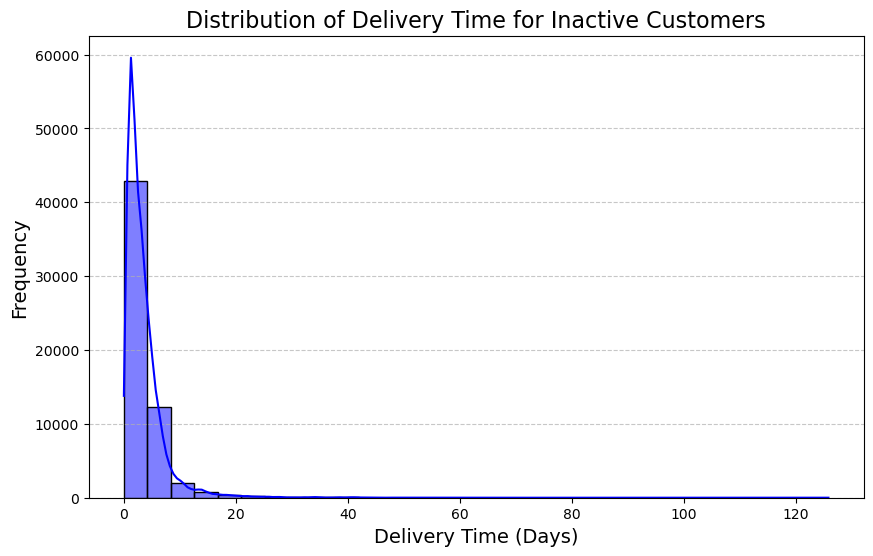

In [535]:
# Calculating the statistics for delivery time
print(inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'].describe())

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'], 
             bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time for Inactive Customers', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The max value is 125. This caused the histogram to look very right skewed. I will now remove the outliers and plot again

count    55607.000000
mean         2.865096
std          1.962515
min          0.010799
25%          1.224711
50%          2.319722
75%          4.062616
max          9.045671
Name: delivery_time, dtype: float64


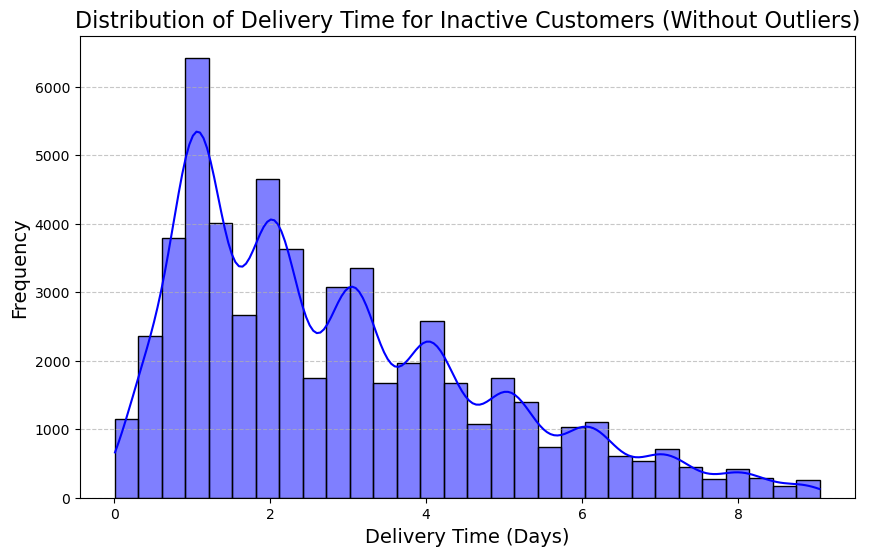

In [536]:
# Find Q1 and Q3
Q1_inactive_customers = inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'].quantile(0.25)
Q3_inactive_customers = inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'].quantile(0.75)

# Find the Interquartile Range
IQR_inactive_customers = Q3_inactive_customers - Q1_inactive_customers

# Define bounds for outliers
lower_bound_inactive_customers = Q1_inactive_customers - 1.5 * IQR_inactive_customers
upper_bound_inactive_customers = Q3_inactive_customers + 1.5 * IQR_inactive_customers

# Filter the data to remove outliers
filtered_df_inactive_customers = inactive_customers_df_reviews_no_missing_carrier_dates[
    (inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'] >= lower_bound_inactive_customers) &
    (inactive_customers_df_reviews_no_missing_carrier_dates['delivery_time'] <= upper_bound_inactive_customers)
]
# Calculating the statistics of delivery_time
print(filtered_df_inactive_customers['delivery_time'].describe())

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df_inactive_customers['delivery_time'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time for Inactive Customers (Without Outliers)', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The delivery time is quite decent. Most of the deliveries are within 4 days time, with some reaching around 9 days.

## Finding the location of where the inactive customers are and what type of products they purchase

In [537]:
inactive_customers_df_orderItems = inactive_customers_df.merge(order_items,  how='inner', on='order_id')
inactive_customers_df_orderItems

customer_unique_id                       customer_id  \
0      0000f46a3911fa3c0805444483337064  9b3932a6253894a02c1df9d19004239f   
1      0000f6ccb0745a6a4b88665a16c9f078  914991f0c02ef0843c0e7010c819d642   
2      0004aac84e0df4da2b147fca70cf8255  47227568b10f5f58a524a75507e6992c   
3      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
4      00053a61a98854899e70ed204dd4bafe  a81ebb9b32f102298c0c89635b4b3154   
...                                 ...                               ...   
67881  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   
67882  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   
67883  fffea47cd6d3cc0a88bd621562a9d061  0ecf8e0a08148af0bf313184f167670a   
67884  ffff371b4d645b6ecea244b27531430a  27f584b0f1dc4e610065c240f68b6be0   
67885  ffffd2657e2aad2907e67c3e9daecbeb  70bc4d9cf2bbeea3f7b09798370f5884   

       customer_zip_code_prefix     customer_city customer_state  \
0                         88115          sao jose             SC   
1                         66812             belem             PA   
2                         18040          sorocaba             SP   
3                         80410          curitiba             PR   
4                         80410          curitiba             PR   
...                         ...               ...            ...   
67881                     55250           sanharo             PE   
67882                     55250           sanharo             PE   
67883                     44054  feira de santana             BA   
67884                     78552             sinop             MT   
67885                     83608       campo largo             PR   

                               order_id order_status order_purchase_timestamp  \
0      b33ec3b699337181488304f362a6b734    delivered      2017-03-10 21:05:03   
1      41272756ecddd9a9ed0180413cc22fb6    delivered      2017-10-12 20:29:41   
2      d957021f1127559cd947b62533f484f7    delivered      2017-11-14 19:45:42   
3      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
4      44e608f2db00c74a1fe329de44416a4e    delivered      2018-02-28 11:15:41   
...                                 ...          ...                      ...   
67881  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   
67882  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   
67883  c71b9252fd7b3b263aaa4cb09319a323    delivered      2017-12-10 20:07:56   
67884  fdc45e6c7555e6cb3cc0daca2557dbe1    delivered      2017-02-07 15:49:16   
67885  f79a35da168301ae56922475da21117b    delivered      2017-05-02 20:18:45   

         order_approved_at order_delivered_carrier_date  \
0      2017-03-10 21:05:03          2017-03-13 12:58:30   
1      2017-10-12 20:49:17          2017-10-13 20:08:19   
2      2017-11-14 20:06:52          2017-11-16 19:52:10   
3      2018-02-28 11:32:42          2018-03-01 20:09:30   
4      2018-02-28 11:32:42          2018-03-01 20:09:30   
...                    ...                          ...   
67881  2017-06-08 21:15:16          2017-06-23 13:03:27   
67882  2017-06-08 21:15:16          2017-06-23 13:03:27   
67883  2017-12-10 20:16:20          2017-12-21 16:27:01   
67884  2017-02-07 16:02:44          2017-02-08 10:04:37   
67885  2017-05-03 15:15:13          2017-05-04 12:05:22   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-04-05 14:38:47           2017-04-07 00:00:00   
1               2017-11-01 21:23:05           2017-11-13 00:00:00   
2               2017-11-27 23:08:56           2017-12-05 00:00:00   
3               2018-03-16 19:02:51           2018-03-26 00:00:00   
4               2018-03-16 19:02:51           2018-03-26 00:00:00   
...                             ...                           ...   
67881           2017-07-06 09:22:00           2017-08-02 00:00:00   
67882           2017-07-06 09:22:00          

In [538]:
inactive_customers_df_orderItems_product = inactive_customers_df_orderItems.merge(products_translated,  how='inner', on='product_id')
inactive_customers_df_orderItems_product

customer_unique_id                       customer_id  \
0      0000f46a3911fa3c0805444483337064  9b3932a6253894a02c1df9d19004239f   
1      6f61e3b11233a0589a1b7cc29b656ec2  0402d1ea1d67936c440f9ab05e45cd24   
2      7b0b8bef25b474b2789e54e75698e158  5529306c8d488c130a5262f4ec3eaa22   
3      b020952fb8ae9684fa222563349510ba  129fb8a7f98b75e41806ae98cae89c1b   
4      d52435d25378ad8cda428a37202e7df8  127b82d6bde5446b1193941efd6d1200   
...                                 ...                               ...   
66620  ffe3e199b9d0b7fb7d2d29a5b9498447  e85ff8cc3cc2c09bdb9204dd7930c0fb   
66621  ffe9102bb78a76921ba0ff3c4659616a  9f007da472be12e0c1b223a9320805f9   
66622  ffedff0547d809c90c05c2691c51f9b7  9f9233b73bc4030c589a0429b3423766   
66623  fff1bdd5c5e37ca79dd74deeb91aa5b6  ed369d5d0e1850f096e478def9027961   
66624  fffcf5a5ff07b0908bd4e2dbc735a684  74be082247cd677a147d83ee670e9d53   

       customer_zip_code_prefix   customer_city customer_state  \
0                         88115        sao jose             SC   
1                          4616       sao paulo             SP   
2                          4911       sao paulo             SP   
3                         22460  rio de janeiro             RJ   
4                         14620        orlandia             SP   
...                         ...             ...            ...   
66620                     38411      uberlandia             MG   
66621                     22260  rio de janeiro             RJ   
66622                     14091  ribeirao preto             SP   
66623                     77824       araguaina             TO   
66624                     55250         sanharo             PE   

                               order_id order_status order_purchase_timestamp  \
0      b33ec3b699337181488304f362a6b734    delivered      2017-03-10 21:05:03   
1      4813d21f5c35dfe0956b75160f9d0e79    delivered      2017-11-03 12:53:40   
2      c614e300e4fa56844ccf198d05fc3da8    delivered      2017-10-24 13:27:33   
3      fb80ffaa3b13d7c09f9e91f5d8337d26    delivered      2017-05-26 09:32:38   
4      f9d9fcf57feb770b0ea568f6a92bb2f2    delivered      2017-10-20 06:55:49   
...                                 ...          ...                      ...   
66620  ffea406a848c8afe4dec22bf6290ba00    delivered      2017-03-15 17:16:36   
66621  b497a58303bca7160ad663bd22cea268    delivered      2017-06-09 13:25:52   
66622  fafb40d4bbf282fe7b9bbafcc2eef58a    delivered      2017-03-30 14:50:26   
66623  f5691c2b1ca263490374d13d020bd950    delivered      2018-02-24 17:38:14   
66624  725cf8e9c24e679a8a5a32cb92c9ce1e    delivered      2017-06-08 21:00:36   

         order_approved_at order_delivered_carrier_date  \
0      2017-03-10 21:05:03          2017-03-13 12:58:30   
1      2017-11-03 13:07:01          2017-11-07 18:11:52   
2      2017-10-24 13:35:21          2017-10-24 19:53:54   
3      2017-05-26 09:45:18          2017-05-26 11:59:47   
4      2017-10-20 07:07:16          2017-10-20 17:03:44   
...                    ...                          ...   
66620  2017-03-15 17:16:36          2017-03-16 12:54:46   
66621  2017-06-09 14:30:16          2017-06-12 13:08:20   
66622  2017-03-30 15:05:18          2017-04-04 15:13:32   
66623  2018-02-24 17:50:26          2018-02-27 17:52:31   
66624  2017-06-08 21:15:16          2017-06-23 13:03:27   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-04-05 14:38:47           2017-04-07 00:00:00   
1               2017-11-13 15:46:46           2017-11-23 00:00:00   
2               2017-10-27 19:53:34           2017-11-10 00:00:00   
3               2017-05-31 15:48:46           2017-06-20 00:00:00   
4               2017-10-25 21:15:05           2017-11-09 00:00:00   
...                             ...                           ...   
66620           2017-04-05 18:48:06           2017-04-05 00:00:00   
66621           2017-06-19 19:41:47           2017-07-10 00:00:00   


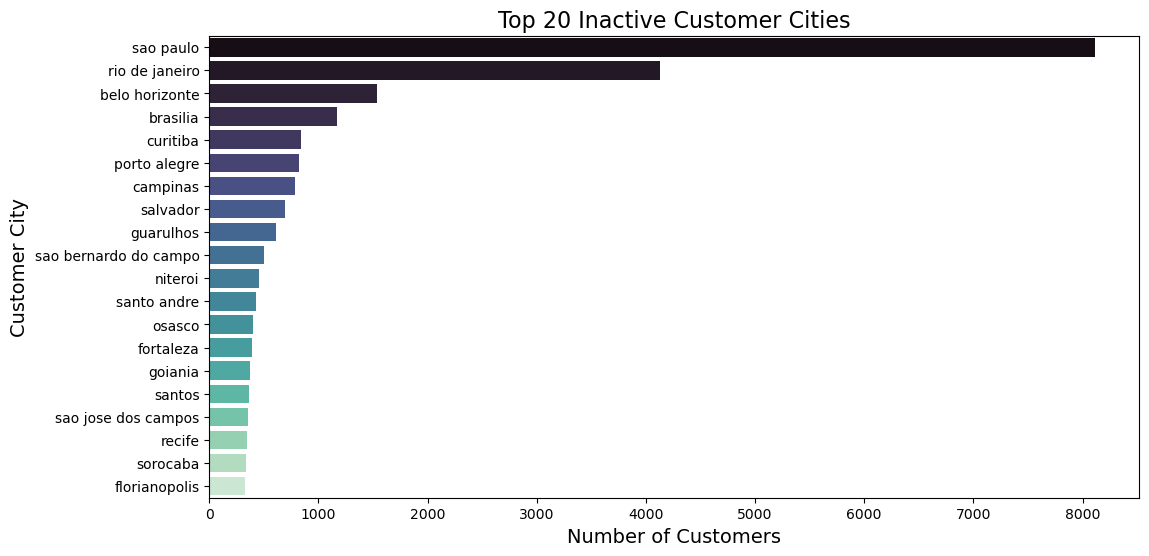

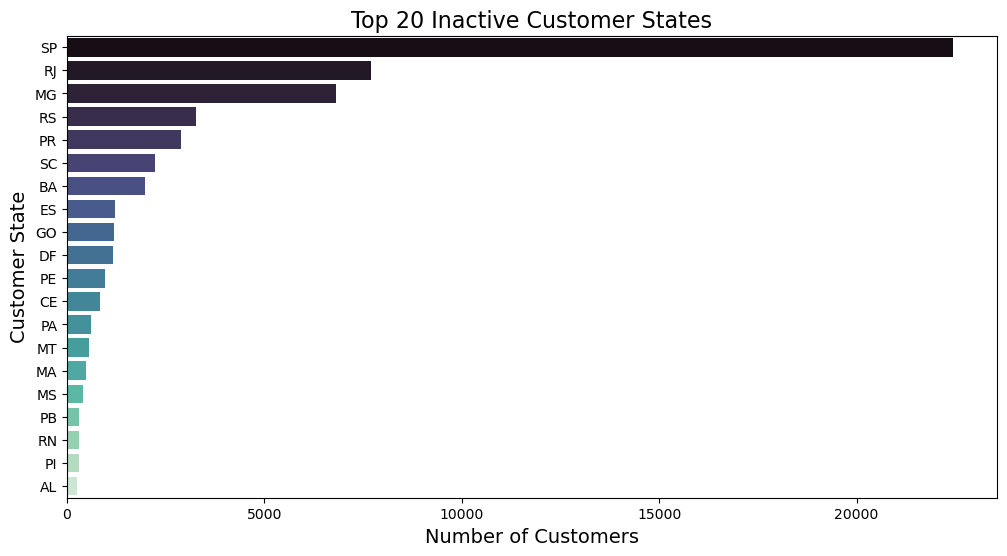

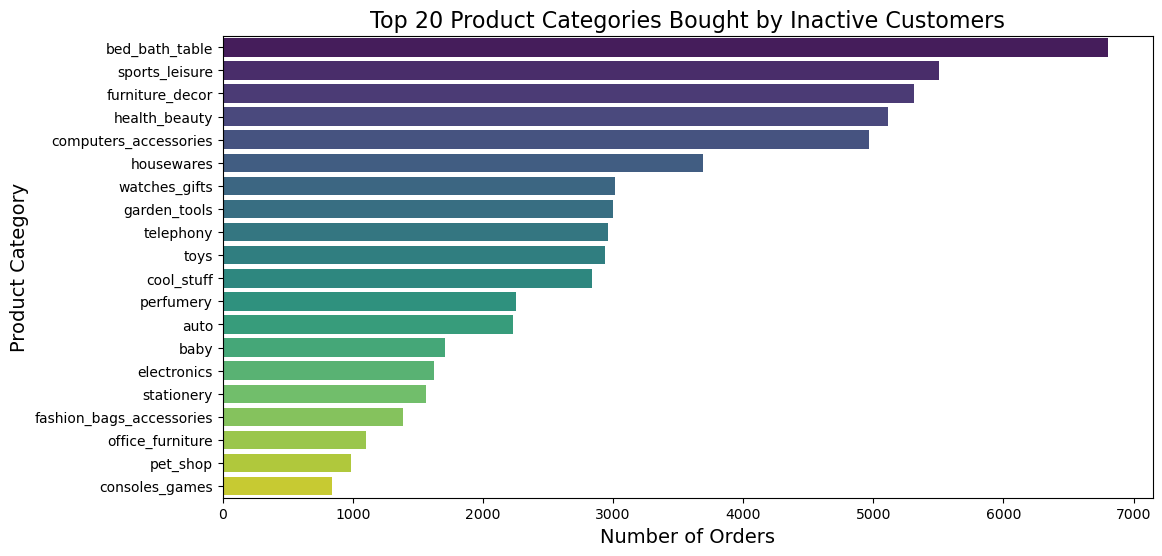

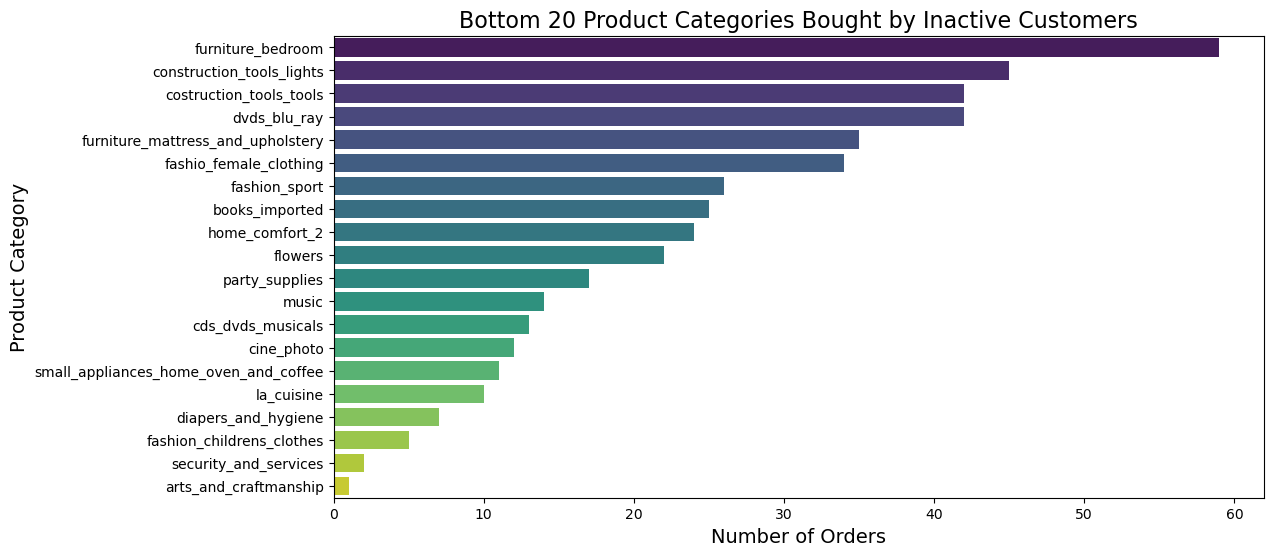

In [539]:
# Distribution of customer cities
unique_customers_inactive_customers = inactive_customers_df_orderItems_product.groupby("customer_unique_id").first()
customer_city_counts_inactive_customers = unique_customers_inactive_customers["customer_city"].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_city_counts_inactive_customers.values, y=customer_city_counts_inactive_customers.index, palette="mako")
plt.title('Top 20 Inactive Customer Cities', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Customer City', fontsize=14)
plt.show()

# Distribution of customer state
customer_state_counts_inactive_customers = unique_customers_inactive_customers["customer_state"].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_state_counts_inactive_customers.values, y=customer_state_counts_inactive_customers.index, palette="mako")
plt.title('Top 20 Inactive Customer States', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Customer State', fontsize=14)
plt.show()

# Distribution of top product categories
plt.figure(figsize=(12, 6))
product_category_counts_inactive_customers_top = inactive_customers_df_orderItems_product['product_category_name_english'].value_counts().head(20) # Showing the top 20 product categories 
sns.barplot(x=product_category_counts_inactive_customers_top.values, y=product_category_counts_inactive_customers_top.index, palette="viridis")
plt.title('Top 20 Product Categories Bought by Inactive Customers', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

# Distribution of bottom product categories
plt.figure(figsize=(12, 6))
product_category_counts_inactive_customers_bottom = inactive_customers_df_orderItems_product['product_category_name_english'].value_counts().tail(20) # Showing the bottom 20 product categories 
sns.barplot(x=product_category_counts_inactive_customers_bottom.values, y=product_category_counts_inactive_customers_bottom.index, palette="viridis")
plt.title('Bottom 20 Product Categories Bought by Inactive Customers', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

The distribution of cities can tell the shop where to focus their resources on. The distribution of product categories can tell the shop which products are more enticing to the inactive customers, which may have a higher chance of getting them back

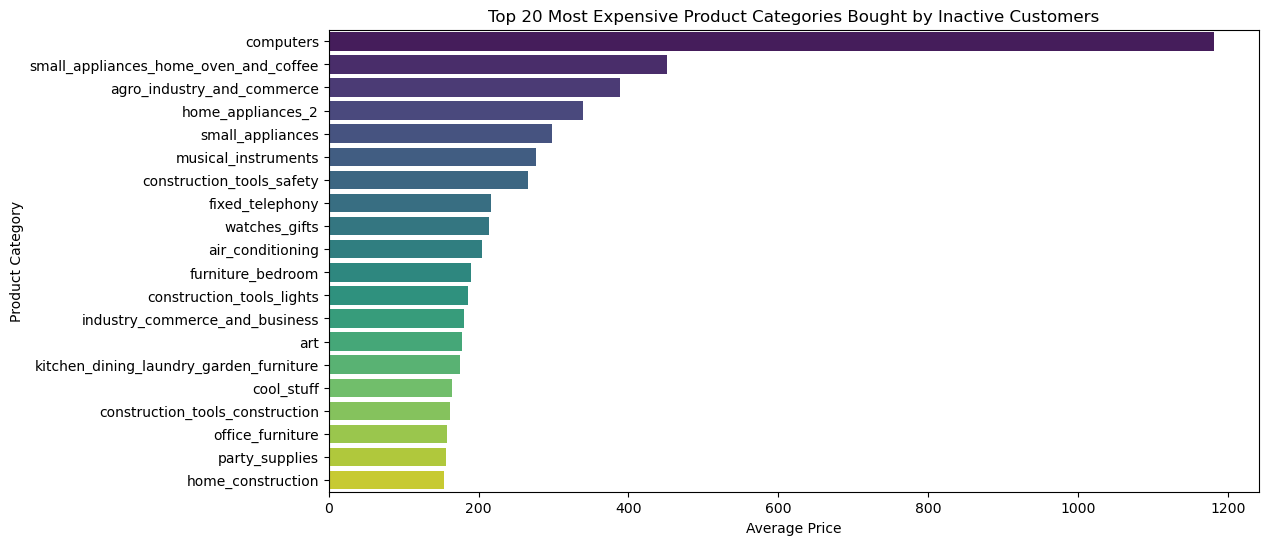

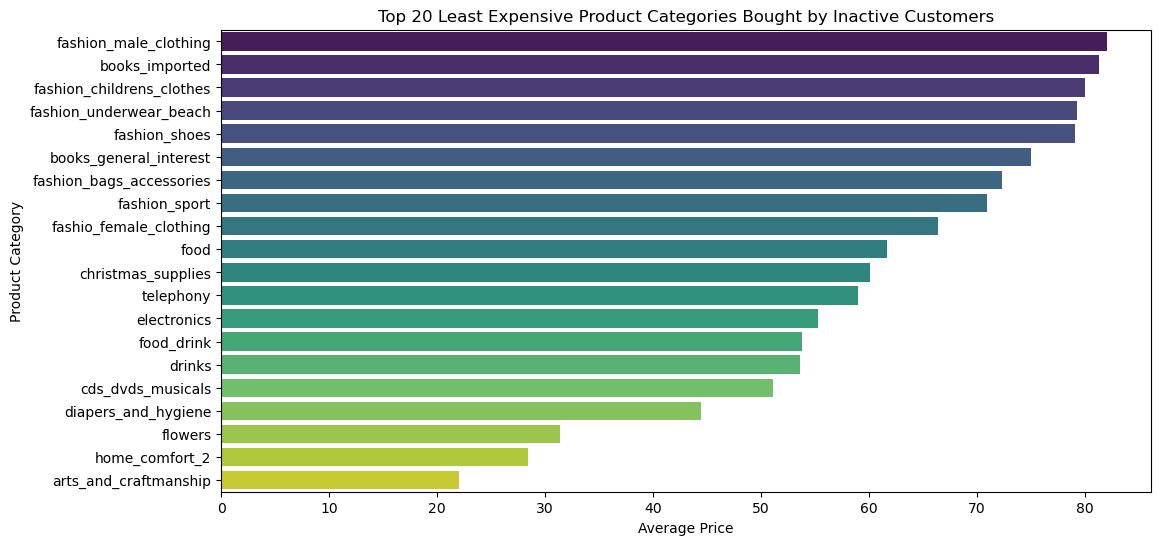

In [540]:
# Finding the average price per category
avg_price_per_category_inactive_customers_top = (
    inactive_customers_df_orderItems_product.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

# Plot the top 20 most expensive categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_per_category_inactive_customers_top.values,
    y=avg_price_per_category_inactive_customers_top.index,
    palette="viridis",
)
plt.title("Top 20 Most Expensive Product Categories Bought by Inactive Customers")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()

# Finding the average price per category (bottom)
avg_price_per_category_inactive_customers_bottom = (
    inactive_customers_df_orderItems_product.groupby("product_category_name_english")["price"]
    .mean()
    .sort_values(ascending=False)
    .tail(20)
)

# Plot the top 20 least expensive categories
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_price_per_category_inactive_customers_bottom.values,
    y=avg_price_per_category_inactive_customers_bottom.index,
    palette="viridis",
)
plt.title("Top 20 Least Expensive Product Categories Bought by Inactive Customers")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()

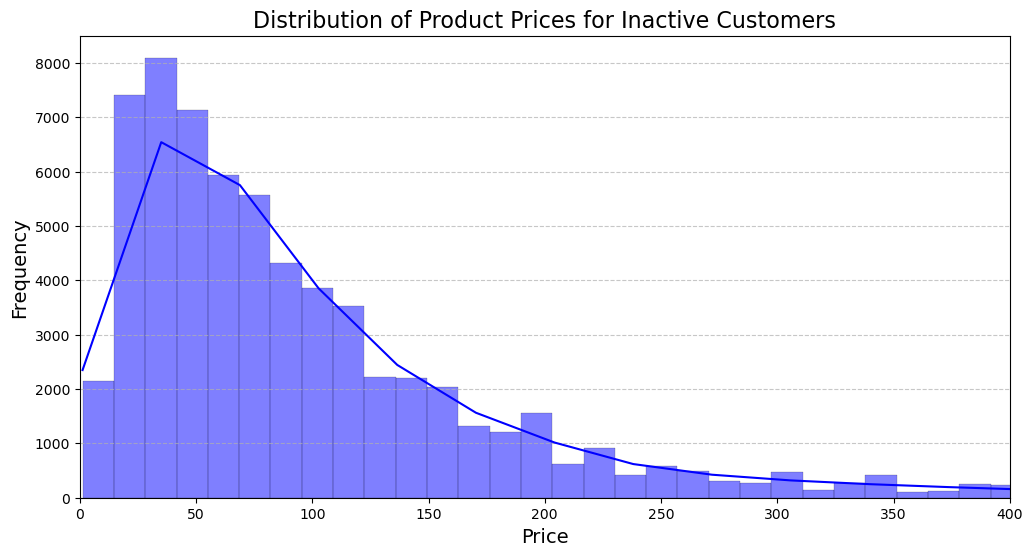

In [541]:
# Limiting the x axis to 400
# Plotting the distribution of the price of products bought by inactive customers
plt.figure(figsize=(12, 6))
sns.histplot(inactive_customers_df_orderItems_product['price'], kde=True, bins=500, color='blue')
plt.title('Distribution of Product Prices for Inactive Customers', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

### Analysing the distribution of payment types for inactive customers

In [542]:
inactive_customers_df_payments = inactive_customers_df.merge(order_payments, how='inner', on='order_id')

In [543]:
print(inactive_customers_df_payments.isna().sum())

customer_unique_id                  0
customer_id                         0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  91
order_delivered_carrier_date     1460
order_delivered_customer_date    2264
order_estimated_delivery_date       0
date_considered_inactive            0
inactive_year_month                 0
inactive_month                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64


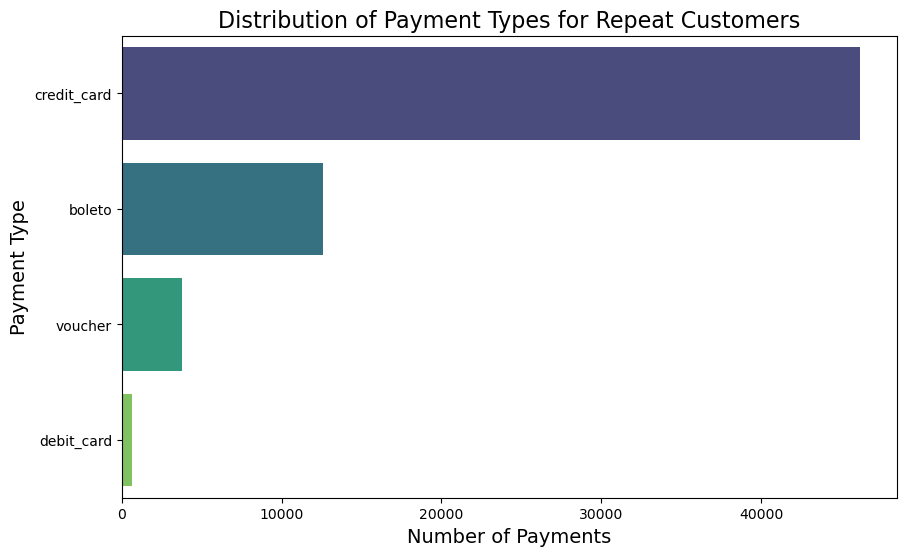

In [544]:
# Finding the number of times each payment type appears
payment_type_counts_inactive_customers = inactive_customers_df_payments["payment_type"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts_inactive_customers.values, y=payment_type_counts_inactive_customers.index, palette="viridis")
plt.title('Distribution of Payment Types for Repeat Customers', fontsize=16)
plt.xlabel('Number of Payments', fontsize=14)
plt.ylabel('Payment Type', fontsize=14)
plt.show()

# Market Analysis

## Finding the most sold product category

In [545]:
customers_orders_orderItems_products= customers_orders_orderItems.merge(products_translated,  how='inner', on='product_id')
customers_orders_orderItems_products

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
111018  f6c6d3e1e20969a5eed982163f959719  fb354969e06f2093c0083cbfbb91864e   
111019  da37711b17efd5f2539e8196ab215f04  5f2971f9805e3ccb030226e30c8e8390   
111020  184e0c2cfc746789643521df0e9ff904  c64ede6d0ae8901b1b6fb03528c1b7e6   
111021  821a7275a08f32975caceff2e08ea262  046470763123d3d6364f89095b4e47ab   
111022  1ed0c832c2dd99570a59260e71768bdf  82d46759af0369aad49084bacf85a6c3   

        customer_zip_code_prefix        customer_city customer_state  \
0                          14409               franca             SP   
1                          68030             santarem             PA   
2                          68030             santarem             PA   
3                          92480      nova santa rita             RS   
4                          25931                 mage             RJ   
...                          ...                  ...            ...   
111018                      1521            sao paulo             SP   
111019                      4313            sao paulo             SP   
111020                     68660  sao miguel do guama             PA   
111021                      5734            sao paulo             SP   
111022                     37610          bom repouso             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
111018  b2f58affcc178fea2daaf834f1acff5e    delivered   
111019  c8203bb57639618630affac9e8e923dd    delivered   
111020  45b3000bcd10464ac178f32cd783fc83    delivered   
111021  49645a8902c1ba980836b7bff991d69f    delivered   
111022  51c6d2f460589fa7b65f2da51e860206    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2017-11-09 00:50:13  2017-11-10 00:47:48   
2           2017-11-09 00:50:13  2017-11-10 00:47:48   
3           2017-05-07 20:11:26  2017-05-08 22:22:56   
4           2018-02-03 19:45:40  2018-02-04 22:29:19   
...                         ...                  ...   
111018      2018-07-14 14:08:11  2018-07-17 04:31:33   
111019      2017-03-27 23:04:18  2017-03-27 23:23:38   
111020      2017-12-07 23:55:46  2017-12-09 23:50:32   
111021      2018-04-04 17:50:52  2018-04-04 18:08:41   
111022      2017-11-14 12:04:09  2017-11-14 12:15:25   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2017-11-22 01:43:37           2017-11-28 00:09:50   
2               2017-11-22 01:43:37           2017-11-28 00:09:50   
3               2017-05-19 20:16:31           2017-05-26 09:54:04   
4               2018-02-19 18:21:47           2018-02-28 21:09:00   
...                             ...                           ...   
111018          2018-07-25 11:18:00           2018-07-26 19:18:32   
111019          2017-03-28 14:18:59           2017-03-30 17:06:19   
111020          2017-12-11 20:29:02           2018-01-05 17:59:38   
111021          2018-04-05 16:36:49           2018-04-06 23:32:21   
111022          2017-11-27 20:44:47           2017-12-19 19:37:33   

       order_estimated_delivery_date  or

In [546]:
customers_orders_orderItems_products['revenue']= customers_orders_orderItems_products['order_item_id'] * customers_orders_orderItems_products['price']
customers_orders_orderItems_products

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
111018  f6c6d3e1e20969a5eed982163f959719  fb354969e06f2093c0083cbfbb91864e   
111019  da37711b17efd5f2539e8196ab215f04  5f2971f9805e3ccb030226e30c8e8390   
111020  184e0c2cfc746789643521df0e9ff904  c64ede6d0ae8901b1b6fb03528c1b7e6   
111021  821a7275a08f32975caceff2e08ea262  046470763123d3d6364f89095b4e47ab   
111022  1ed0c832c2dd99570a59260e71768bdf  82d46759af0369aad49084bacf85a6c3   

        customer_zip_code_prefix        customer_city customer_state  \
0                          14409               franca             SP   
1                          68030             santarem             PA   
2                          68030             santarem             PA   
3                          92480      nova santa rita             RS   
4                          25931                 mage             RJ   
...                          ...                  ...            ...   
111018                      1521            sao paulo             SP   
111019                      4313            sao paulo             SP   
111020                     68660  sao miguel do guama             PA   
111021                      5734            sao paulo             SP   
111022                     37610          bom repouso             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
111018  b2f58affcc178fea2daaf834f1acff5e    delivered   
111019  c8203bb57639618630affac9e8e923dd    delivered   
111020  45b3000bcd10464ac178f32cd783fc83    delivered   
111021  49645a8902c1ba980836b7bff991d69f    delivered   
111022  51c6d2f460589fa7b65f2da51e860206    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2017-11-09 00:50:13  2017-11-10 00:47:48   
2           2017-11-09 00:50:13  2017-11-10 00:47:48   
3           2017-05-07 20:11:26  2017-05-08 22:22:56   
4           2018-02-03 19:45:40  2018-02-04 22:29:19   
...                         ...                  ...   
111018      2018-07-14 14:08:11  2018-07-17 04:31:33   
111019      2017-03-27 23:04:18  2017-03-27 23:23:38   
111020      2017-12-07 23:55:46  2017-12-09 23:50:32   
111021      2018-04-04 17:50:52  2018-04-04 18:08:41   
111022      2017-11-14 12:04:09  2017-11-14 12:15:25   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2017-11-22 01:43:37           2017-11-28 00:09:50   
2               2017-11-22 01:43:37           2017-11-28 00:09:50   
3               2017-05-19 20:16:31           2017-05-26 09:54:04   
4               2018-02-19 18:21:47           2018-02-28 21:09:00   
...                             ...                           ...   
111018          2018-07-25 11:18:00           2018-07-26 19:18:32   
111019          2017-03-28 14:18:59           2017-03-30 17:06:19   
111020          2017-12-11 20:29:02           2018-01-05 17:59:38   
111021          2018-04-05 16:36:49           2018-04-06 23:32:21   
111022          2017-11-27 20:44:47           2017-12-19 19:37:33   

       order_estimated_delivery_date  or

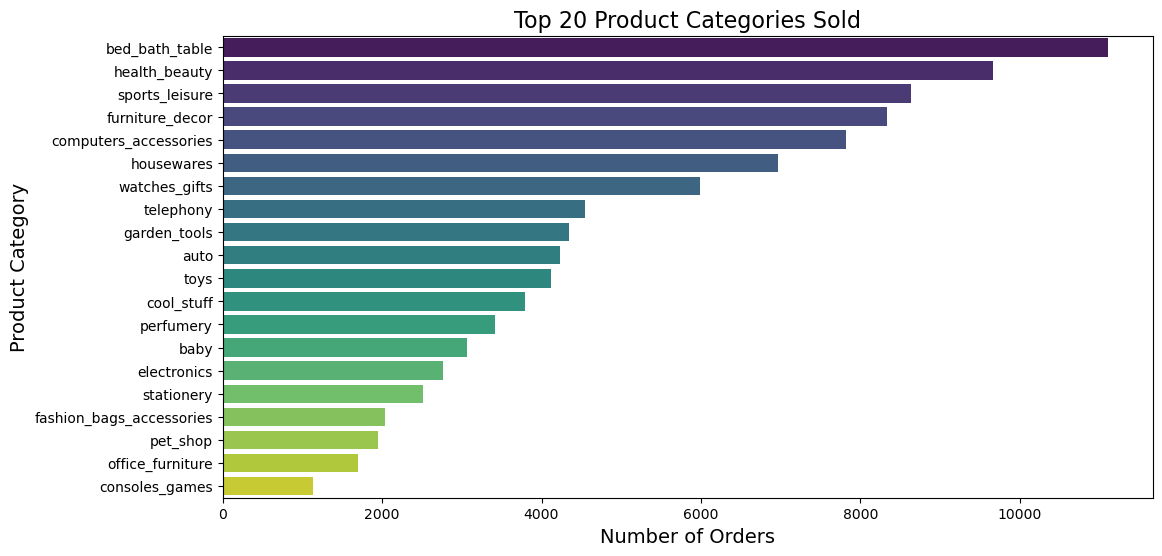

The most sold product category is 'bed_bath_table' with 11115 products sold.


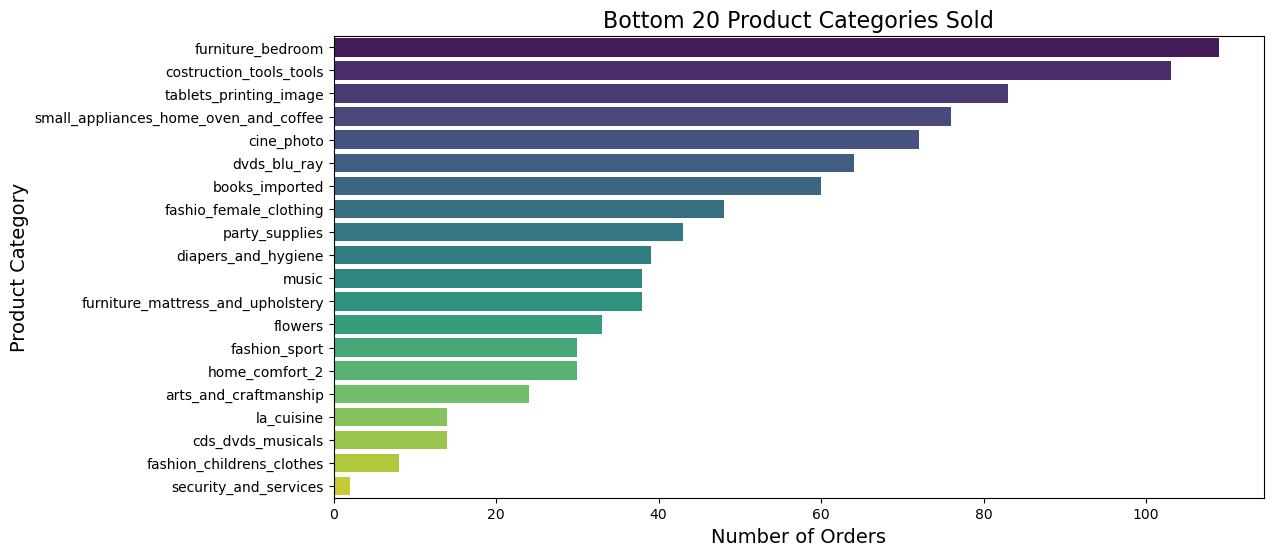

The least sold product category is 'security_and_services' with 2 products sold.


In [547]:
# Distribution of product categories
plt.figure(figsize=(12, 6))
product_category_counts = customers_orders_orderItems_products['product_category_name_english'].value_counts().head(20) # Showing the top 20 product categories 
sns.barplot(x=product_category_counts.values, y=product_category_counts.index, palette="viridis")
plt.title('Top 20 Product Categories Sold', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

# Find the most sold product category
most_sold_category = product_category_counts.idxmax()
most_sold_count = product_category_counts.max()

print(f"The most sold product category is '{most_sold_category}' with {most_sold_count} products sold.")

# Distribution of product categories (bottom)
plt.figure(figsize=(12, 6))
product_category_counts_bottom = customers_orders_orderItems_products['product_category_name_english'].value_counts().tail(20) # Showing the bottom 20 product categories 
sns.barplot(x=product_category_counts_bottom.values, y=product_category_counts_bottom.index, palette="viridis")
plt.title('Bottom 20 Product Categories Sold', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

# Find the most sold product category
least_sold_category = product_category_counts_bottom.idxmin()
least_sold_count = product_category_counts_bottom.min()

print(f"The least sold product category is '{least_sold_category}' with {least_sold_count} products sold.")

## Finding the revenue earned by product category

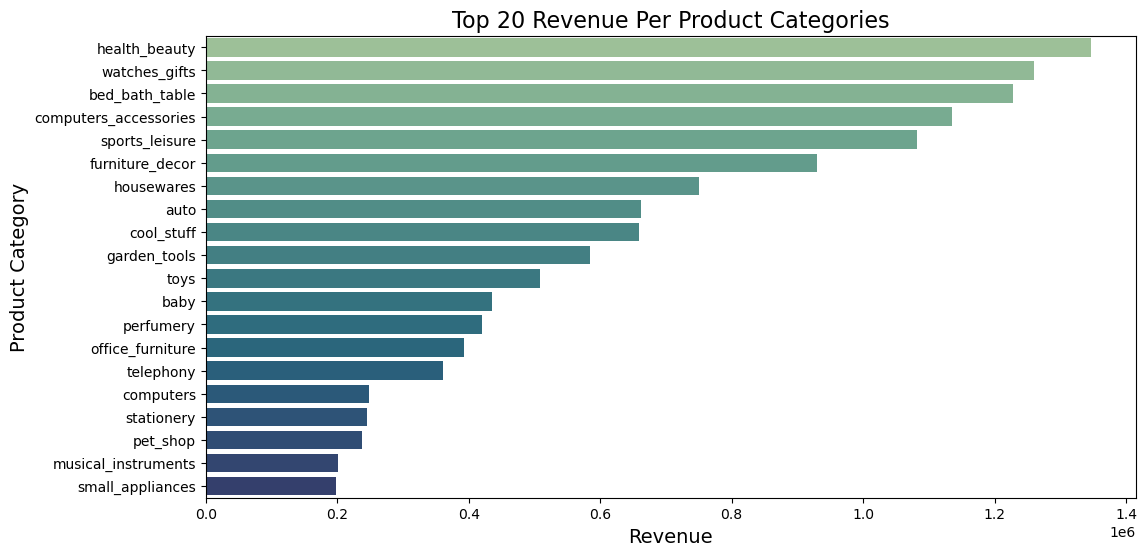

In [548]:
# Group by product category then sum the revenue to get revenue per product category
revenue_by_category = customers_orders_orderItems_products.groupby('product_category_name_english')['revenue'].sum()

# Sort in descending order
revenue_by_category = revenue_by_category.sort_values(ascending=False)

# Plot the top revenues
plt.figure(figsize=(12, 6))
revenue_category_counts = revenue_by_category.head(20)
sns.barplot(x=revenue_category_counts.values, y=revenue_category_counts.index, palette="crest")
plt.title('Top 20 Revenue Per Product Categories', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

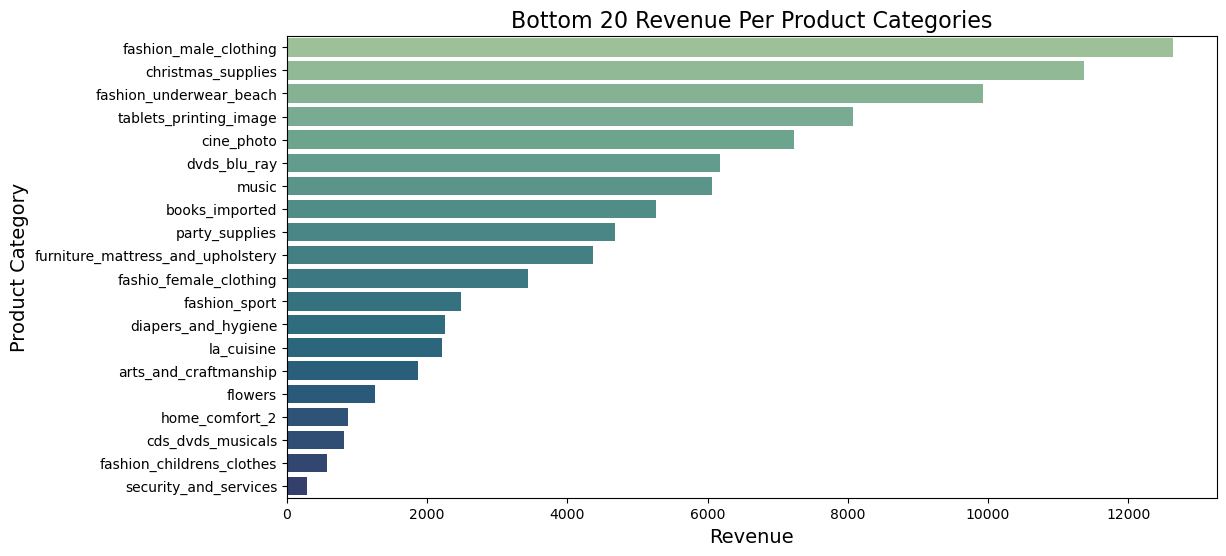

In [549]:
# Plot the bottom revenues
plt.figure(figsize=(12, 6))
revenue_category_counts_bottom = revenue_by_category.tail(20)
sns.barplot(x=revenue_category_counts_bottom.values, y=revenue_category_counts_bottom.index, palette="crest")
plt.title('Bottom 20 Revenue Per Product Categories', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.show()

### Finding the revenue per product category for the past year

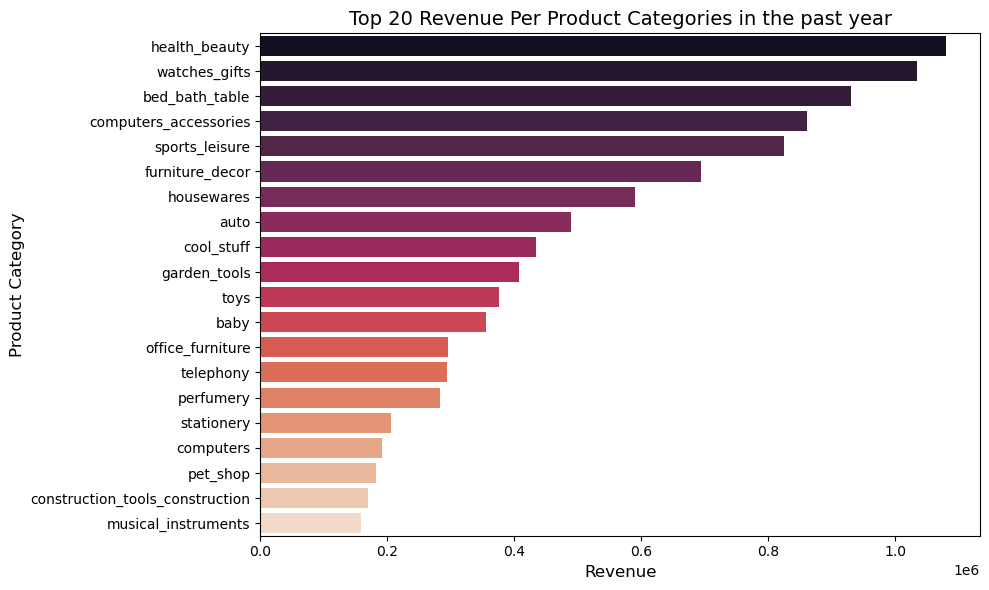

In [550]:
# Finding the latest date
customers_orders_orderItems_products['order_purchase_timestamp'] = pd.to_datetime(customers_orders_orderItems_products['order_purchase_timestamp'])
latest_date = customers_orders_orderItems_products['order_purchase_timestamp'].max()

# Finding the date to indicate the start of the past year
one_year_before = latest_date - pd.Timedelta(days=365)

# Filter data for the past year
past_year_data = customers_orders_orderItems_products[
    customers_orders_orderItems_products['order_purchase_timestamp'] >= one_year_before
]

# Calculate revenue for each product category
revenue_by_category_past_year = past_year_data.groupby('product_category_name_english')['revenue'].sum().sort_values(ascending=False).head(20)

# Plot the revenue for the past year
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category_past_year.values, y=revenue_by_category_past_year.index, palette="rocket")
plt.title("Top 20 Revenue Per Product Categories in the past year", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()
plt.show()

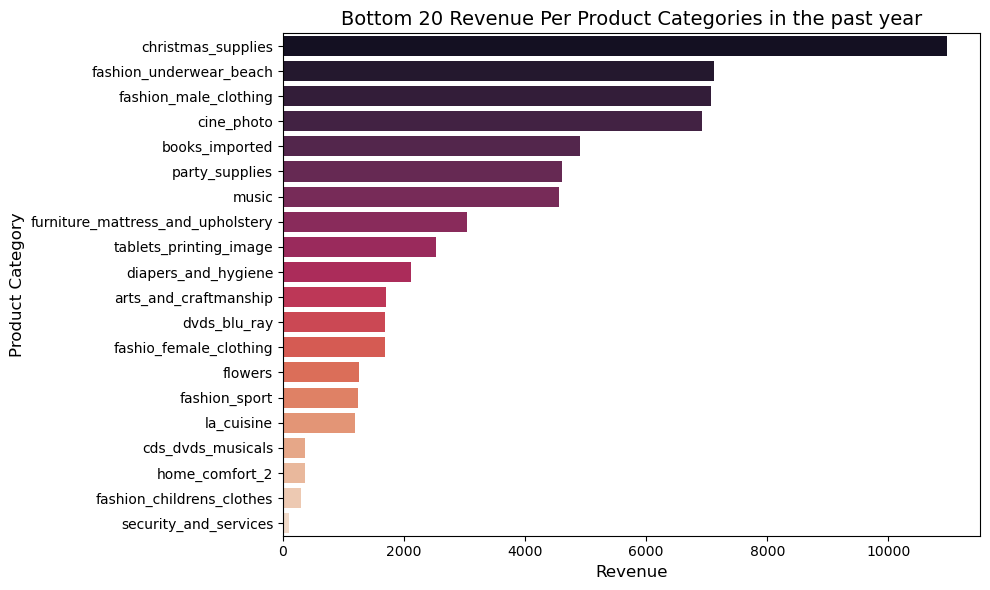

In [551]:
# Calculate revenue for each product category
revenue_by_category_past_year_bottom = past_year_data.groupby('product_category_name_english')['revenue'].sum().sort_values(ascending=False).tail(20)

# Plot the revenue for the past year
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category_past_year_bottom.values, y=revenue_by_category_past_year_bottom.index, palette="rocket")
plt.title("Bottom 20 Revenue Per Product Categories in the past year", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.tight_layout()
plt.show()

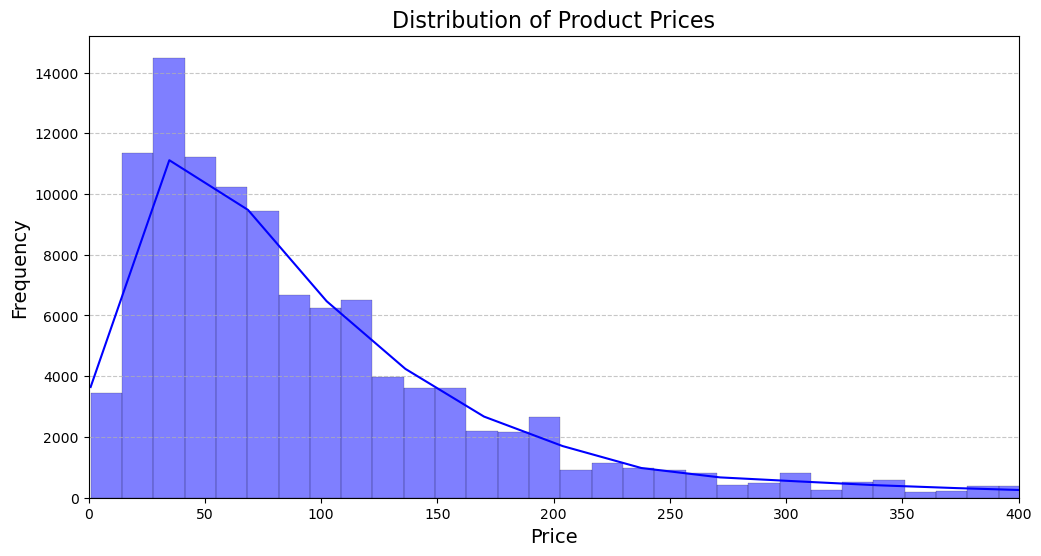

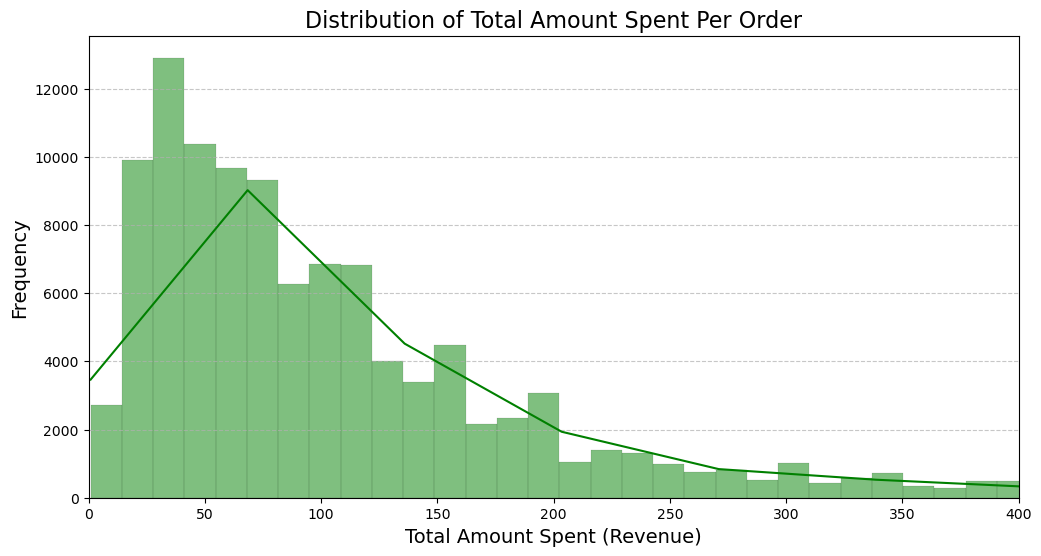

In [552]:
# Limiting the x axis to 400
# Plotting the distribution of the price of products bought by customers
plt.figure(figsize=(12, 6))
sns.histplot(customers_orders_orderItems_products['price'], kde=True, bins=500, color='blue')
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

# Plotting the distribution of the total amount spent per order
plt.figure(figsize=(12, 6))
sns.histplot(customers_orders_orderItems_products['revenue'], kde=True, bins=1000, color='green')
plt.title('Distribution of Total Amount Spent Per Order', fontsize=16)
plt.xlabel('Total Amount Spent (Revenue)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 400)  # Set x axis limits
plt.show()

## Location of where most of the customers stay

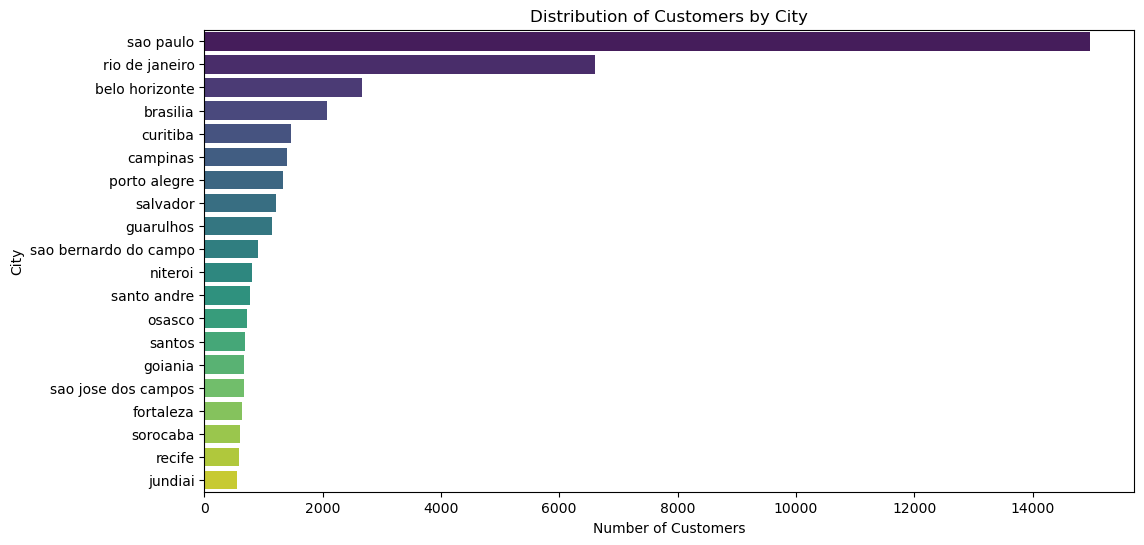

In [553]:
# Group by custome unique id to get unique customers
unique_customers = customers.groupby("customer_unique_id").first()

# Count the number of unique customers in each city
city_customer_counts = unique_customers["customer_city"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=city_customer_counts.values[:20],  # Top 20 cities
    y=city_customer_counts.index[:20],
    palette="viridis"
)
plt.title("Distribution of Customers by City")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()

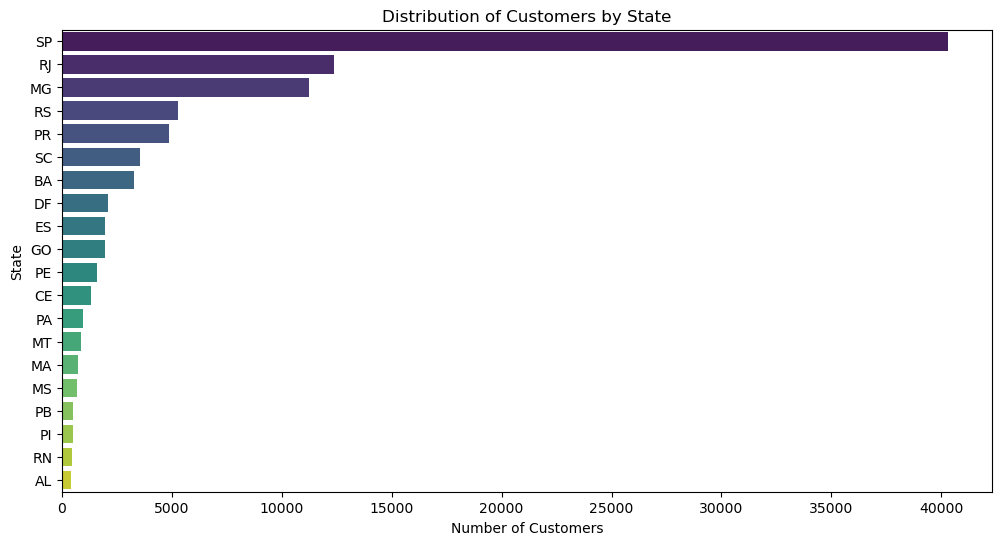

In [554]:
# Count the number of unique customers in each state
state_customer_counts = unique_customers["customer_state"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=state_customer_counts.values[:20],  # Top 20 States
    y=state_customer_counts.index[:20],
    palette="viridis"
)
plt.title("Distribution of Customers by State")
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.show()

## Finding the revenue earned by location

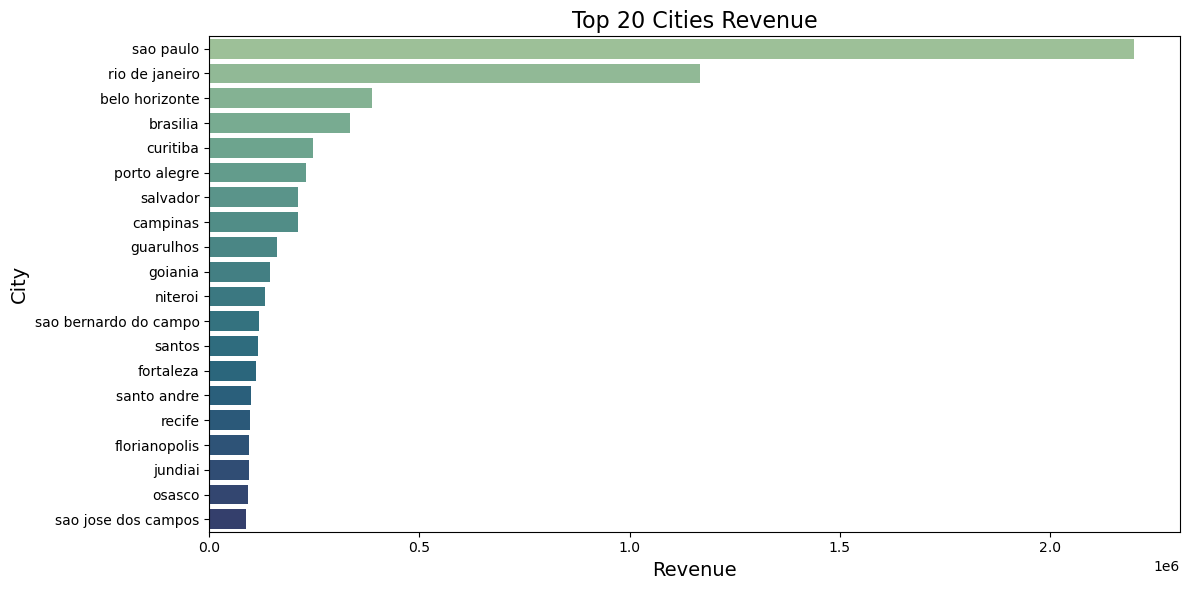

In [555]:
customers_orders_orderItems['revenue'] = customers_orders_orderItems['order_item_id'] * customers_orders_orderItems['price']
# Group by customer city and calculate total revenue
revenue_by_city = customers_orders_orderItems.groupby('customer_city')['revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_city.values[:20], y=revenue_by_city.index[:20], palette="crest")
plt.title("Top 20 Cities Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.tight_layout()
plt.show()

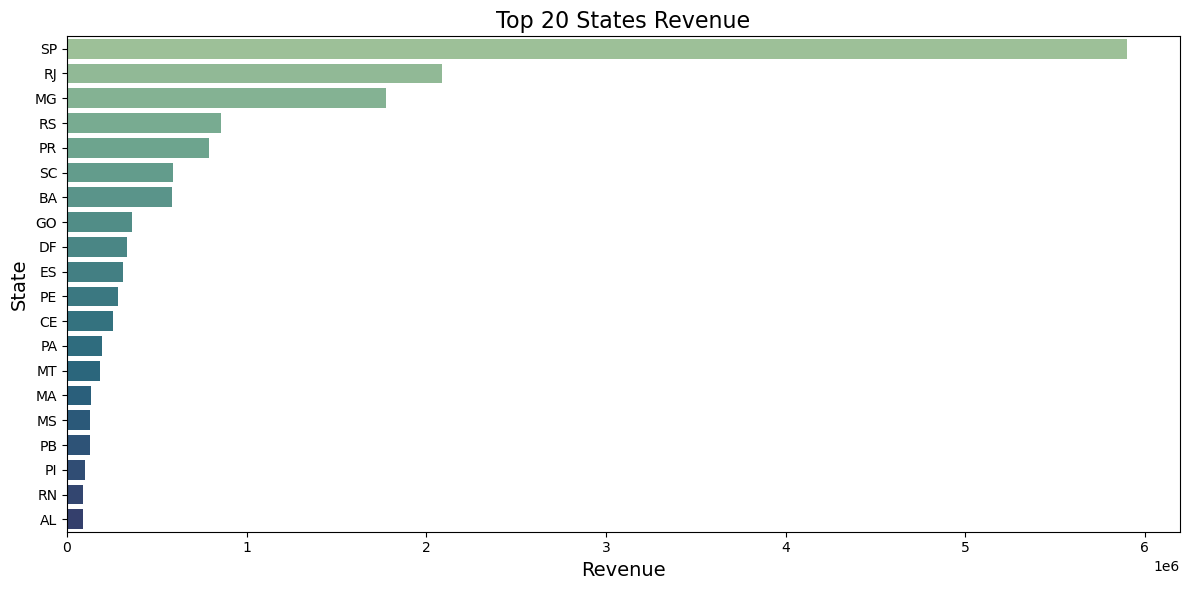

In [556]:
# Group by customer state and calculate total revenue
revenue_by_state = customers_orders_orderItems.groupby('customer_state')['revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_state.values[:20], y=revenue_by_state.index[:20], palette="crest")
plt.title("Top 20 States Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.tight_layout()
plt.show()

## Finding the revenue earned by location over the last year

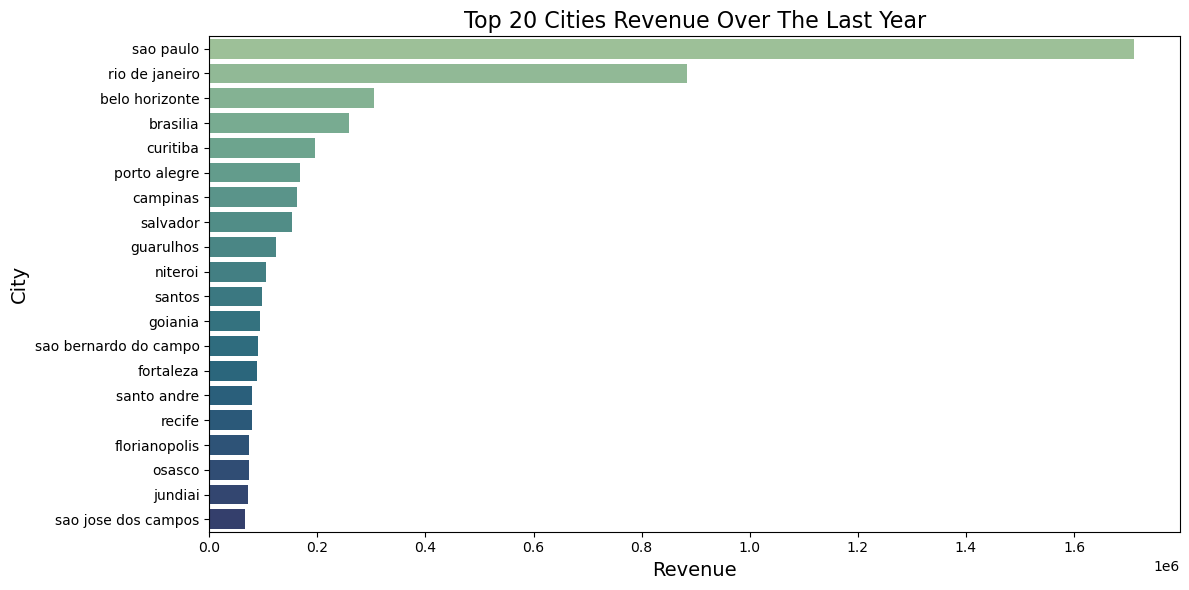

In [557]:
# Group by customer city and calculate total revenue
revenue_by_city_past_year = past_year_data.groupby('customer_city')['revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_city_past_year.values[:20], y=revenue_by_city_past_year.index[:20], palette="crest")
plt.title("Top 20 Cities Revenue Over The Last Year", fontsize=16)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("City", fontsize=14)
plt.tight_layout()
plt.show()

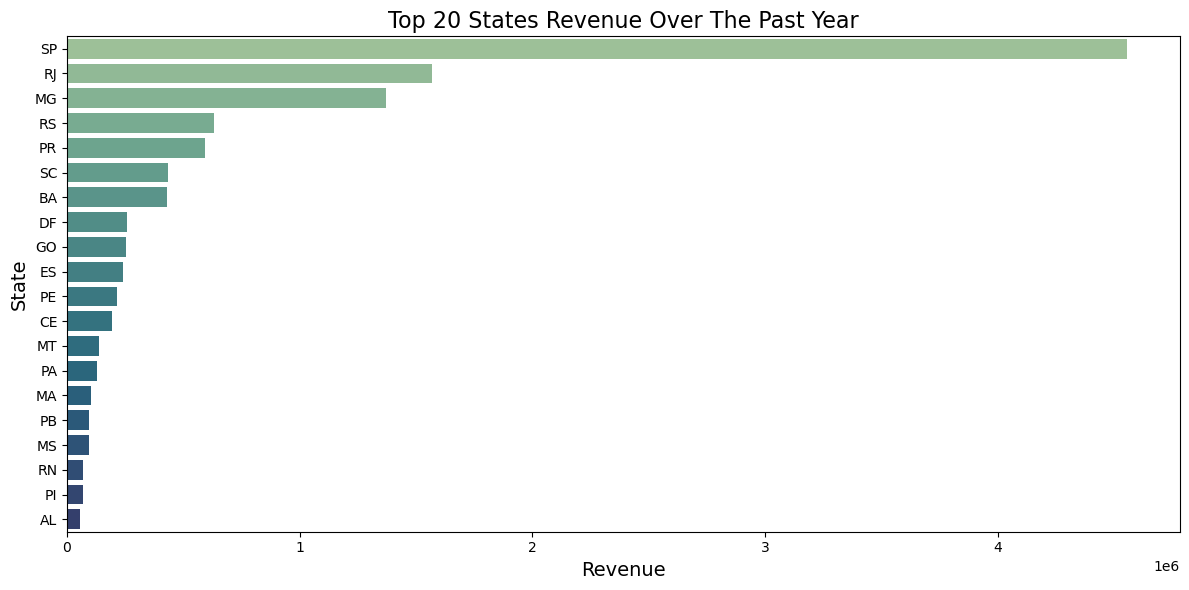

In [558]:
# Group by customer state and calculate total revenue
revenue_by_state_past_year = past_year_data.groupby('customer_state')['revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_state_past_year.values[:20], y=revenue_by_state_past_year.index[:20], palette="crest")
plt.title("Top 20 States Revenue Over The Past Year", fontsize=16)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.tight_layout()
plt.show()

## Analysing the payment types

In [559]:
customers_orders_payments= customers_orders.merge(order_payments, how='inner', on='order_id')

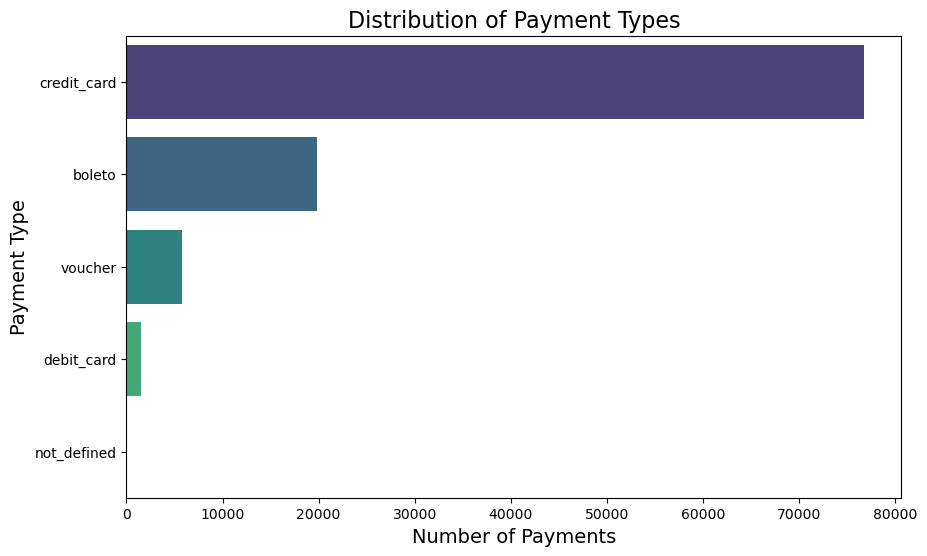

In [560]:
# Count the occurrences of each payment type
payment_type_counts = customers_orders_payments["payment_type"].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.values, y=payment_type_counts.index, palette="viridis")
plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Number of Payments', fontsize=14)
plt.ylabel('Payment Type', fontsize=14)
plt.show()


## Analysing Delivery Times

In [561]:
# Removing rows where courier dates are null
customers_orders_no_missing_carrier_dates = customers_orders.dropna(subset=['order_delivered_carrier_date'])
# Converting order delivered date and time placed to datetime format
customers_orders_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
    customers_orders_no_missing_carrier_dates['order_delivered_carrier_date']
)
customers_orders_no_missing_carrier_dates['order_purchase_timestamp'] = pd.to_datetime(
    customers_orders_no_missing_carrier_dates['order_purchase_timestamp']
)

# Calculating the delivery time
customers_orders_no_missing_carrier_dates['delivery_time'] = (
    customers_orders_no_missing_carrier_dates['order_delivered_carrier_date'] -
    customers_orders_no_missing_carrier_dates['order_purchase_timestamp']
).abs()

# Convert the result to days
customers_orders_no_missing_carrier_dates['delivery_time'] = (
    customers_orders_no_missing_carrier_dates['delivery_time'].dt.total_seconds() / 86400
) # 60 * 60 * 24

C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\3553526150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_no_missing_carrier_dates['order_delivered_carrier_date'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\3553526150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_no_missing_carrier_dates['order_purchase_timestamp'] = pd.to_datetime(
C:\Users\Asus\AppData\Local\Temp\ipykernel_19240\3553526150.py:12: SettingWithCopyWarning: 
A value is tryin

count    97658.000000
mean         3.237739
std          3.608690
min          0.000278
25%          1.129094
50%          2.204757
75%          4.071832
max        171.212419
Name: delivery_time, dtype: float64


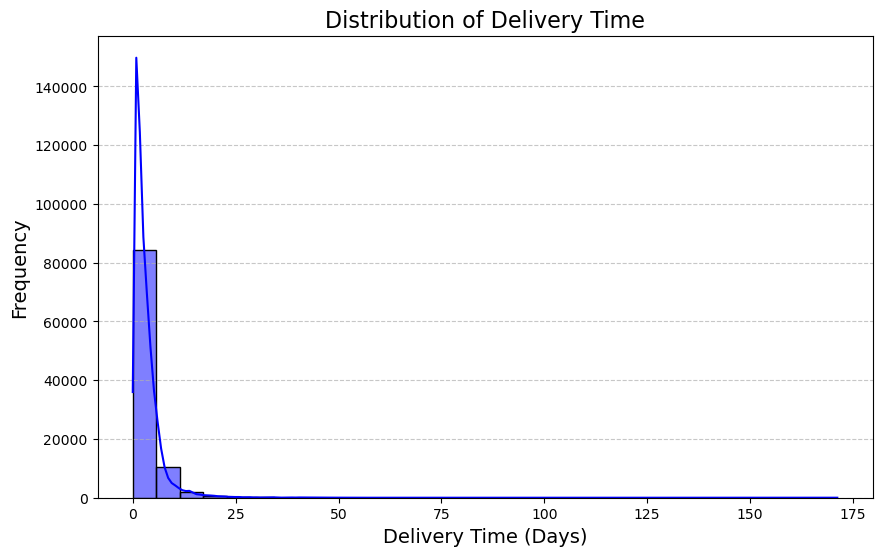

In [562]:
# Calculating the statistics of delivery_time
print(customers_orders_no_missing_carrier_dates['delivery_time'].describe())

# Plot a histogram for delivery_time
plt.figure(figsize=(10, 6))
sns.histplot(customers_orders_no_missing_carrier_dates['delivery_time'], 
             bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

count    92377.000000
mean         2.611355
std          1.864104
min          0.000278
25%          1.095856
50%          2.094271
75%          3.762037
max          8.485440
Name: delivery_time, dtype: float64


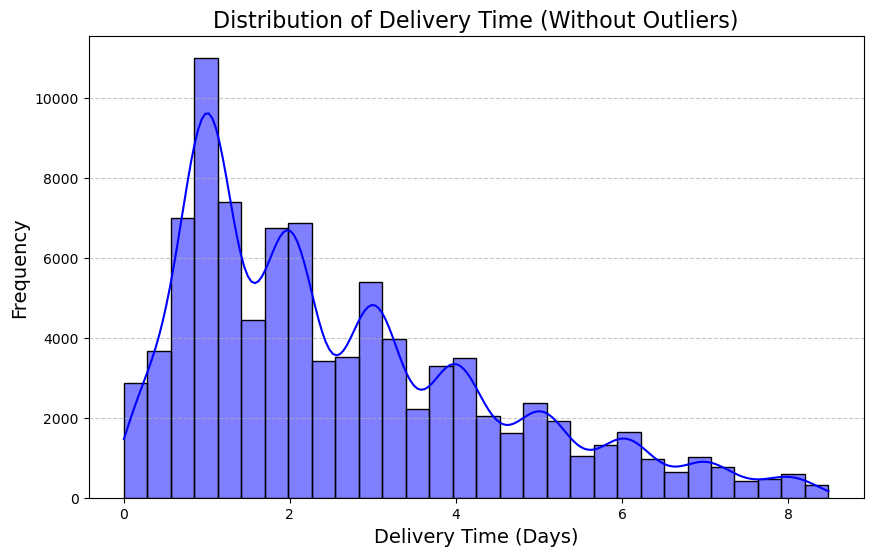

In [563]:
# Find Q1 and Q3
Q1 = customers_orders_no_missing_carrier_dates['delivery_time'].quantile(0.25)
Q3 = customers_orders_no_missing_carrier_dates['delivery_time'].quantile(0.75)

# Find the Interquartile Range
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_df = customers_orders_no_missing_carrier_dates[
    (customers_orders_no_missing_carrier_dates['delivery_time'] >= lower_bound) &
    (customers_orders_no_missing_carrier_dates['delivery_time'] <= upper_bound)
]
# Calculating the statistics of delivery_time
print(filtered_df['delivery_time'].describe())

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['delivery_time'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Delivery Time (Without Outliers)', fontsize=16)
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analysing Reviews

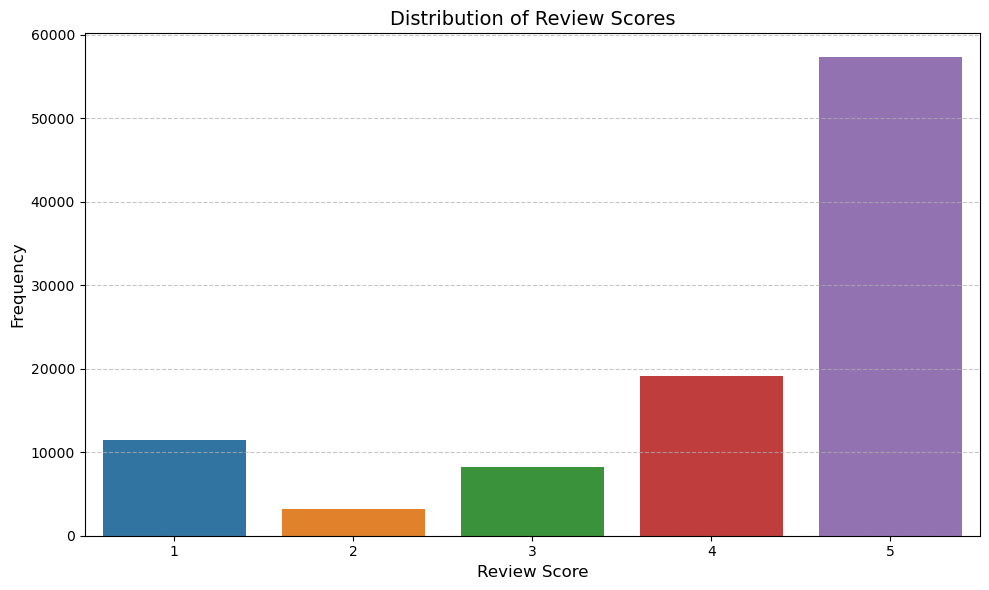

In [564]:
customers_orders_reviews= customers_orders.merge(order_reviews, how='inner', on='order_id')
# Plot the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_orders_reviews, x='review_score', order=sorted(customers_orders_reviews['review_score'].unique()))
plt.title('Distribution of Review Scores', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Top and bottom product categories by review score

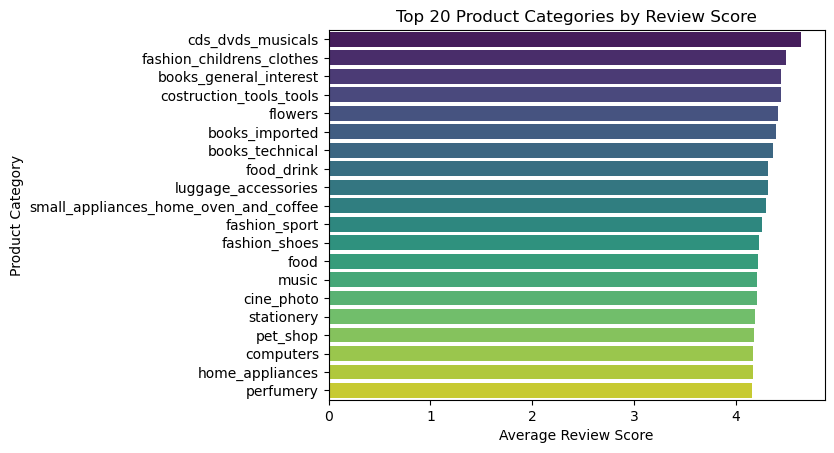

In [565]:
customers_orders_reviews_orderItems = customers_orders_reviews.merge(order_items,  how='inner', on='order_id')
customers_orders_reviews_orderItems_products= customers_orders_reviews_orderItems.merge(products_translated,  how='inner', on='product_id')

# Finding the product category with the highest review score
# Group by product category name and calculate the average review score for each product category
average_reviews_per_category = (
    customers_orders_reviews_orderItems_products.groupby('product_category_name_english')['review_score']
    .mean()
    .sort_values(ascending=False)
)

# Convert the result to a DataFrame
average_reviews_per_category_df = average_reviews_per_category.reset_index()
average_reviews_per_category_df.columns = ['product_category_name_english', 'average_review_score']

# Getting the top categories with the highest reviews
top_categories_by_reviews = average_reviews_per_category_df.head(20)

# Plot
sns.barplot(x='average_review_score', y='product_category_name_english', data=top_categories_by_reviews, palette='viridis')
plt.title('Top 20 Product Categories by Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

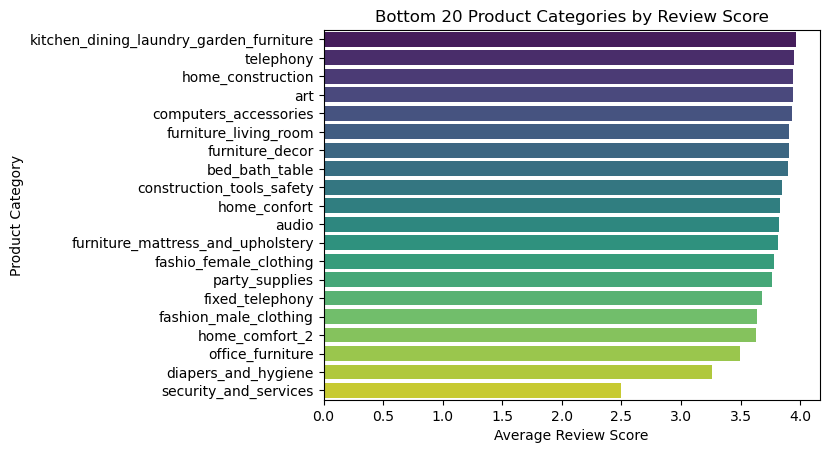

In [566]:
# Getting the bottom categories with the highest reviews
bottom_categories_by_reviews = average_reviews_per_category_df.tail(20)

# Plot
sns.barplot(x='average_review_score', y='product_category_name_english', data=bottom_categories_by_reviews, palette='viridis')
plt.title('Bottom 20 Product Categories by Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()